In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting pandas to display maximum 150 rows and column in a cell

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

### DATA DESCRIPTION

#### CURRENT APPLICATION DATA

In [4]:
# Reading Client's applicant data
cl_curr_data = pd.read_csv("../Data Files/application_data.csv")

# printing out first 5 rows of the application data to check if the data was read correctly
print("Shape of application_data : {}".format(cl_curr_data.shape))
cl_curr_data.head()

Shape of application_data : (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
print("Total Numeric Columns : {}".format(cl_curr_data.select_dtypes("number").columns.shape[0]))
print("Total Columns with null values : {}".format(cl_curr_data.isnull().sum()[cl_curr_data.isnull().sum()>0].shape[0]))

Total Numeric Columns : 106
Total Columns with null values : 67


In [6]:
# displaying information about shape, data types and non-missing values of the application_data

print(cl_curr_data.iloc[:,:30].info())
print(cl_curr_data.iloc[:,30:60].info())
print(cl_curr_data.iloc[:,60:90].info())
print(cl_curr_data.iloc[:,90:122].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [7]:
# displaying description or metrics about the numeric features present in the application_data

cl_curr_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

It is clearly observable that a <b>lot of features have missing values</b> by looking at the info output.<br>
In the next let's try to find the number of missing values and what percentage do they hold among all the data.

#### PREVIOUS APPLICATION DATA

In [8]:
# Reading Client's applicant data
cl_prev_data = pd.read_csv("../Data Files/previous_application.csv")
print("Shape of previous_application_data : {}".format(cl_prev_data.shape))

# printing out first 5 rows of the application data to check if the data was processed correctly
cl_prev_data.head()

Shape of previous_application_data : (1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [9]:
print("Total Numeric Columns : {}".format(cl_prev_data.select_dtypes("number").columns.shape[0]))
print("Total Columns with null values : {}".format(cl_prev_data.isnull().sum()[cl_prev_data.isnull().sum()>0].shape[0]))

Total Numeric Columns : 21
Total Columns with null values : 16


In [10]:
# displaying information about shape, data types and non-missing values of the application_data
cl_prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
# displaying description or metrics about the numeric features present in the application_data

cl_prev_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### DATA MANIPULATION

In [12]:
# Custom Plotting Functions

def create_bar_chart(x, y, title=None, figsize=(12,6), color=None):
    '''
    Function to plot bar charts
    x : values to plot on axis
    y : label for axis
    title : title of the chart
    '''
    plt.figure(figsize=figsize)
    sns.barplot(x, y, color=color)
    plt.title(title)
    plt.show()

def create_boxplot_and_histplot(column, data=cl_curr_data, figsize=(12, 4)):
    '''
    Function to create boxplot and histogram for continous numerical features
    column : column name
    data : dataframe
    '''
    fig_cv, (ax1_cv, ax2_cv) = plt.subplots(1, 2, figsize=figsize)
    sns.boxplot(y=data[column], ax=ax1_cv)
    data[column].plot.hist(ax=ax2_cv)
 

#### CURRENT APPLICATION DATA

In [13]:
def create_null_df_metrics(df):
    null_info_df = pd.DataFrame(df.isnull().sum(), columns=["Null Counts"])
    null_info_df["Null Counts %"] = round((null_info_df["Null Counts"]/df.shape[0])*100,4)
    null_info_df = null_info_df.sort_values("Null Counts %", ascending=False)
    return null_info_df

In [14]:
# displaying number of missing values in each column

null_curr_info_df = create_null_df_metrics(cl_curr_data)
null_curr_info_df

Null Counts  Null Counts %
COMMONAREA_MEDI                    214865        69.8723
COMMONAREA_AVG                     214865        69.8723
COMMONAREA_MODE                    214865        69.8723
NONLIVINGAPARTMENTS_MODE           213514        69.4330
NONLIVINGAPARTMENTS_AVG            213514        69.4330
NONLIVINGAPARTMENTS_MEDI           213514        69.4330
FONDKAPREMONT_MODE                 210295        68.3862
LIVINGAPARTMENTS_MODE              210199        68.3550
LIVINGAPARTMENTS_AVG               210199        68.3550
LIVINGAPARTMENTS_MEDI              210199        68.3550
FLOORSMIN_AVG                      208642        67.8486
FLOORSMIN_MODE                     208642        67.8486
FLOORSMIN_MEDI                     208642        67.8486
YEARS_BUILD_MEDI                   204488        66.4978
YEARS_BUILD_MODE                   204488        66.4978
YEARS_BUILD_AVG                    204488        66.4978
OWN_CAR_AGE                        202929        65.9908
LANDAREA_MEDI                      182590        59.3767
LANDAREA_MODE                      182590        59.3767
LANDAREA_AVG                       182590        59.3767
BASEMENTAREA_MEDI                  179943        58.5160
BASEMENTAREA_AVG                   179943        58.5160
BASEMENTAREA_MODE                  179943        58.5160
EXT_SOURCE_1                       173378        56.3811
NONLIVINGAREA_MODE                 169682        55.1792
NONLIVINGAREA_AVG                  169682        55.1792
NONLIVINGAREA_MEDI                 169682        55.1792
ELEVATORS_MEDI                     163891        53.2960
ELEVATORS_AVG                      163891        53.2960
ELEVATORS_MODE                     163891        53.2960
WALLSMATERIAL_MODE                 156341        50.8408
APARTMENTS_MEDI                    156061        50.7497
APARTMENTS_AVG                     156061        50.7497
APARTMENTS_MODE                    156061        50.7497
ENTRANCES_MEDI                     154828        50.3488
ENTRANCES_AVG                      154828        50.3488
ENTRANCES_MODE                     154828        50.3488
LIVINGAREA_AVG                     154350        50.1933
LIVINGAREA_MODE                    154350        50.1933
LIVINGAREA_MEDI                    154350        50.1933
HOUSETYPE_MODE                     154297        50.1761
FLOORSMAX_MODE                     153020        49.7608
FLOORSMAX_MEDI                     153020        49.7608
FLOORSMAX_AVG                      153020        49.7608
YEARS_BEGINEXPLUATATION_MODE       150007        48.7810
YEARS_BEGINEXPLUATATION_MEDI       150007        48.7810
YEARS_BEGINEXPLUATATION_AVG        150007        48.7810
TOTALAREA_MODE                     148431        48.2685
EMERGENCYSTATE_MODE                145755        47.3983
OCCUPATION_TYPE                     96391        31.3455
EXT_SOURCE_3                        60965        19.8253
AMT_REQ_CREDIT_BUREAU_HOUR          41519        13.5016
AMT_REQ_CREDIT_BUREAU_DAY           41519        13.5016
AMT_REQ_CREDIT_BUREAU_WEEK          41519        13.5016
AMT_REQ_CREDIT_BUREAU_MON           41519        13.5016
AMT_REQ_CREDIT_BUREAU_QRT           41519        13.5016
AMT_REQ_CREDIT_BUREAU_YEAR          41519        13.5016
NAME_TYPE_SUITE                      1292         0.4201
OBS_30_CNT_SOCIAL_CIRCLE             1021         0.3320
DEF_30_CNT_SOCIAL_CIRCLE             1021         0.3320
OBS_60_CNT_SOCIAL_CIRCLE             1021         0.3320
DEF_60_CNT_SOCIAL_CIRCLE             1021         0.3320
EXT_SOURCE_2                          660         0.2146
AMT_GOODS_PRICE                       278         0.0904
AMT_ANNUITY                            12         0.0039
CNT_FAM_MEMBERS                         2         0.0007
DAYS_LAST_PHONE_CHANGE                  1         0.0003
CNT_CHILDREN                            0         0.0000
FLAG_DOCUMENT_8                         0         0.0000
NAME_CONTRACT_TYPE                      

After careful consideration of each column let's put a <b>threshold of 40%</b> for null values

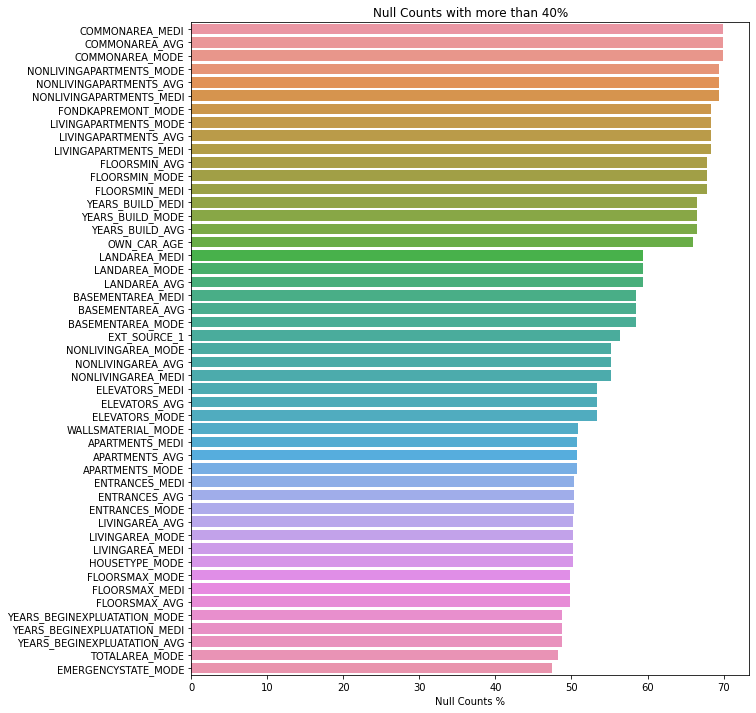

Number of columns with more than 40% of null values : 49


In [15]:
# columns having null values more than 40%

null_curr_mt_40 = null_curr_info_df[null_curr_info_df["Null Counts %"]>40][["Null Counts %"]]
create_bar_chart(null_curr_mt_40["Null Counts %"], null_curr_mt_40.index, "Null Counts with more than 40%", (10,12))

print("Number of columns with more than 40% of null values : {}".format(null_curr_mt_40.shape[0]))

There are <b>49 columns</b> which have <b>more than 40%</b> of their values as null, so we can drop these columns<br>
But before dropping them let's see if these columns have impact on our target variable.

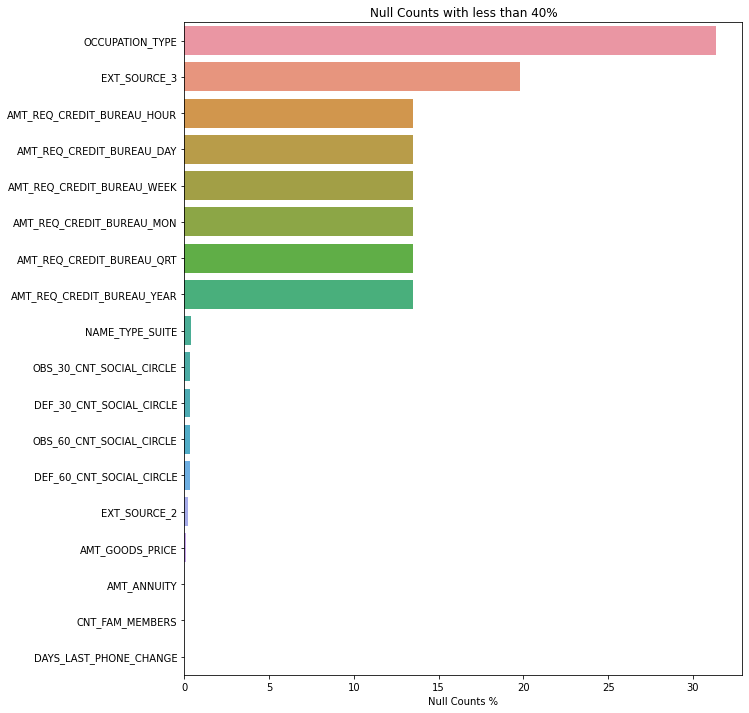

Number of columns with less than 40% of null values : 18


In [16]:
null_curr_lt_40 = null_curr_info_df[(null_curr_info_df["Null Counts %"]<40)&
                                    (null_curr_info_df["Null Counts %"]>0)][["Null Counts %"]]
create_bar_chart(null_curr_lt_40["Null Counts %"], null_curr_lt_40.index, "Null Counts with less than 40%", (10,12))

print("Number of columns with less than 40% of null values : {}".format(null_curr_lt_40.shape[0]))

In [17]:
# Grouping these columns with more than 40% of null values against the TARGET variable

cl_curr_data[["TARGET"]+list(null_curr_mt_40.index)].groupby("TARGET").count()

COMMONAREA_MEDI  COMMONAREA_AVG  COMMONAREA_MODE  \
TARGET                                                     
0                 86244           86244            86244   
1                  6402            6402             6402   

        NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_AVG  \
TARGET                                                      
0                          87499                    87499   
1                           6498                     6498   

        NONLIVINGAPARTMENTS_MEDI  FONDKAPREMONT_MODE  LIVINGAPARTMENTS_MODE  \
TARGET                                                                        
0                          87499               90516                  90609   
1                           6498                6700                   6703   

        LIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MEDI  FLOORSMIN_AVG  \
TARGET                                                               
0                      90609                  90609          92052   
1                       6703                   6703           6817   

        FLOORSMIN_MODE  FLOORSMIN_MEDI  YEARS_BUILD_MEDI  YEARS_BUILD_MODE  \
TARGET                                                                       
0                92052           92052             95949             95949   
1                 6817            6817              7074              7074   

        YEARS_BUILD_AVG  OWN_CAR_AGE  LANDAREA_MEDI  LANDAREA_MODE  \
TARGET                                                               
0                 95949        97006         116200         116200   
1                  7074         7576           8721           8721   

        LANDAREA_AVG  BASEMENTAREA_MEDI  BASEMENTAREA_AVG  BASEMENTAREA_MODE  \
TARGET                                                                         
0             116200             118781            118781             118781   
1               8721               8787              8787               8787   

        EXT_SOURCE_1  NONLIVINGAREA_MODE  NONLIVINGAREA_AVG  \
TARGET                                                        
0             124079              128334             128334   
1              10054                9495               9495   

        NONLIVINGAREA_MEDI  ELEVATORS_MEDI  ELEVATORS_AVG  ELEVATORS_MODE  \
TARGET                                                                      
0                   128334          133710         133710          133710   
1                     9495            9910           9910            9910   

        WALLSMATERIAL_MODE  APARTMENTS_MEDI  APARTMENTS_AVG  APARTMENTS_MODE  \
TARGET                                                                         
0                   140616           140910          140910           140910   
1                    10554            10540           10540            10540   

        ENTRANCES_MEDI  ENTRANCES_AVG  ENTRANCES_MODE  LIVINGAREA_AVG  \
TARGET                                                                  
0               142069         142069          142069          142447   
1                10614          10614           10614           10714   

        LIVINGAREA_MODE  LIVINGAREA_MEDI  HOUSETYPE_MODE  FLOORSMAX_MODE  \
TARGET                                                                     
0                142447           142447          142509          143730   
1                 10714            10714           10705           10761   

        FLOORSMAX_MEDI  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  \
TARGET                                                                
0               143730         143730                        146487   
1                10761          10761                         11017   

        YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG  \
TARGET                                                              
0                             146487                       146487   
1                              11017

Since, from the above table we can see that these columns have <b>very less contribution to our target varible</b><br>
Hence we can <b>drop these columns</b> for the sake of analysis.

In [18]:
def clustered_metric_for_group(new_df, df, groups, grouped_feature):
    for group in groups:
        new_df[str(group)+" #"] = df[df[grouped_feature]==group].count()
        new_df[str(group)+" %"] = round(100*new_df[str(group)+" #"]/df.shape[0],2)
    return new_df
    

def dataset_feature_analysis(df, grouped_feature):
    new_df = pd.DataFrame()
    new_df["Unique Counts"] = df.nunique()
    new_df["Null #"] = df.isnull().sum()
    new_df["Null %"] = round(100*new_df["Null #"]/df.shape[0],2)
    new_df = clustered_metric_for_group(new_df, df, df[grouped_feature].unique(), grouped_feature)
    return new_df

dataset_feature_analysis(cl_curr_data, "TARGET").sort_values("1 %", ascending=False)

Unique Counts  Null #  Null %    1 #   1 %  \
SK_ID_CURR                           307511       0    0.00  24825  8.07   
FLAG_DOCUMENT_14                          2       0    0.00  24825  8.07   
REG_REGION_NOT_LIVE_REGION                2       0    0.00  24825  8.07   
LIVE_REGION_NOT_WORK_REGION               2       0    0.00  24825  8.07   
REG_CITY_NOT_LIVE_CITY                    2       0    0.00  24825  8.07   
REG_CITY_NOT_WORK_CITY                    2       0    0.00  24825  8.07   
LIVE_CITY_NOT_WORK_CITY                   2       0    0.00  24825  8.07   
ORGANIZATION_TYPE                        58       0    0.00  24825  8.07   
FLAG_DOCUMENT_21                          2       0    0.00  24825  8.07   
FLAG_DOCUMENT_20                          2       0    0.00  24825  8.07   
FLAG_DOCUMENT_19                          2       0    0.00  24825  8.07   
FLAG_DOCUMENT_18                          2       0    0.00  24825  8.07   
FLAG_DOCUMENT_17                          2       0    0.00  24825  8.07   
FLAG_DOCUMENT_16                          2       0    0.00  24825  8.07   
FLAG_DOCUMENT_15                          2       0    0.00  24825  8.07   
FLAG_DOCUMENT_13                          2       0    0.00  24825  8.07   
WEEKDAY_APPR_PROCESS_START                7       0    0.00  24825  8.07   
FLAG_DOCUMENT_12                          2       0    0.00  24825  8.07   
FLAG_DOCUMENT_11                          2       0    0.00  24825  8.07   
FLAG_DOCUMENT_10                          2       0    0.00  24825  8.07   
FLAG_DOCUMENT_9                           2       0    0.00  24825  8.07   
FLAG_DOCUMENT_8                           2       0    0.00  24825  8.07   
FLAG_DOCUMENT_7                           2       0    0.00  24825  8.07   
FLAG_DOCUMENT_6                           2       0    0.00  24825  8.07   
TARGET                                    2       0    0.00  24825  8.07   
FLAG_DOCUMENT_5                           2       0    0.00  24825  8.07   
FLAG_DOCUMENT_4                           2       0    0.00  24825  8.07   
FLAG_DOCUMENT_3                           2       0    0.00  24825  8.07   
FLAG_DOCUMENT_2                           2       0    0.00  24825  8.07   
DAYS_LAST_PHONE_CHANGE                 3773       1    0.00  24825  8.07   
HOUR_APPR_PROCESS_START                  24       0    0.00  24825  8.07   
REG_REGION_NOT_WORK_REGION                2       0    0.00  24825  8.07   
REGION_RATING_CLIENT_W_CITY               3       0    0.00  24825  8.07   
AMT_ANNUITY                           13672      12    0.00  24825  8.07   
REGION_POPULATION_RELATIVE               81       0    0.00  24825  8.07   
NAME_HOUSING_TYPE                         6       0    0.00  24825  8.07   
NAME_FAMILY_STATUS                        6       0    0.00  24825  8.07   
NAME_EDUCATION_TYPE                       5       0    0.00  24825  8.07   
NAME_INCOME_TYPE                          8       0    0.00  24825  8.07   
AMT_GOODS_PRICE                        1002     278    0.09  24804  8.07   
AMT_CREDIT                             5603       0    0.00  24825  8.07   
DAYS_EMPLOYED                         12574       0    0.00  24825  8.07   
AMT_INCOME_TOTAL                       2548       0    0.00  24825  8.07   
CNT_CHILDREN                             15       0    0.00  24825  8.07   
FLAG_OWN_REALTY                           2       0    0.00  24825  8.07   
FLAG_OWN_CAR                              2       0    0.00  24825  8.07   
CODE_GENDER                               3       0    0.00  24825  8.07   
NAME_CONTRACT_TYPE                        2       0    0.00  24825  8.07   
REGION_RATING_CLIENT                      3       0    0.00  24825  8.07   
DAYS_BIRTH                            17460       0    0.00  24825  8.07   
DAYS_REGISTRATION                     15688       0    0.00  24825  8.07   
DAYS_ID_PUBLISH                        6168       0    0.00  24825  8.07   
CN

After careful consideration of the above table which includes the numbers and ratio of null values and further segmented in our target variables (which in this case it's 0 and 1), we decided to drop some columns on certain factors and also the casuation of that variable.<br>
By certain factors, it is the percentage distribution of our target variable, the null values percentage that column has and by causation, it is the column descrition provided and how that features impacts our target variable.<br>
The assumptions are purely based on the metric table and the column description provided and are made only for the sake of data analysis only.
- SK_ID_CURR was removed since it's just an ID and doesn't hold any relevance to the data except for the uniqueness.
- From all the FLAG columns, "FLAG_OWN_CAR", "FLAG_OWN_REALTY" are found to be relevant.<br>
- From all the DAYS columns, "DAYS_BIRTH", "DAYS_EMPLOYED" are found to be relevant.<br>
- From all the REGION columns, "REGION_RATING_CLIENT", "REGION_POPULATION_RELATIVE" are found to be relevant.<br>
- From all the SOURCE columns, "EXT_SOURCE_2" is found to be relevany.<br>
- Excluded all the PROCESS, CITY and SOCIAL CIRCLE columns and other than that every column is considered for the analysis.<br>

In [19]:
print("Shape before dropping these columns : {}".format(cl_curr_data.shape))

# dropping SK_ID_CURR
cl_curr_data = cl_curr_data.drop(columns=["SK_ID_CURR"])

# dropping null values with more than 40% of null values
cl_curr_data = cl_curr_data[[x for x in cl_curr_data.columns if x not in null_curr_mt_40.index]]

# filtering data on FLAG columns
exc_flag_cols = ["FLAG_OWN_CAR","FLAG_OWN_REALTY"]
rem_flag_cols = [x for x in cl_curr_data.columns if "FLAG" in x and x not in exc_flag_cols]
cl_curr_data = cl_curr_data[[x for x in cl_curr_data.columns if x not in rem_flag_cols]]

# filtering data on DAYS columns
exc_days_cols = ["DAYS_BIRTH","DAYS_EMPLOYED"]
rem_days_cols = [x for x in cl_curr_data.columns if "DAYS" in x and x not in exc_days_cols]
cl_curr_data = cl_curr_data[[x for x in cl_curr_data.columns if x not in rem_days_cols]]

# filtering data on REGION or REG(Registration) columns
exc_regi_cols = ["REGION_RATING_CLIENT","REGION_POPULATION_RELATIVE"]
rem_regi_cols = [x for x in cl_curr_data.columns if ("REGION" in x or "REG" in x) and x not in exc_regi_cols]
cl_curr_data = cl_curr_data[[x for x in cl_curr_data.columns if x not in rem_regi_cols]]

# filtering data related to application PROCESS columns
exc_proc_cols = []
rem_proc_cols = [x for x in cl_curr_data.columns if ("PROCESS" in x or "BUREAU" in x) and x not in exc_proc_cols]
cl_curr_data = cl_curr_data[[x for x in cl_curr_data.columns if x not in rem_proc_cols]]

# filtering data on CITY columns
exc_city_cols = []
rem_city_cols = [x for x in cl_curr_data.columns if "CITY" in x  and x not in exc_city_cols]
cl_curr_data = cl_curr_data[[x for x in cl_curr_data.columns if x not in rem_city_cols]]

# filtering data related to SOCIAL CIRCLE columns
exc_soci_cols = []
rem_soci_cols = [x for x in cl_curr_data.columns if "SOCIAL_CIRCLE" in x  and x not in exc_soci_cols]
cl_curr_data = cl_curr_data[[x for x in cl_curr_data.columns if x not in rem_soci_cols]]

# filtering data related to SOURCE(Normalised Score) columns
exc_sour_cols = ["EXT_SOURCE_2"]
rem_sour_cols = [x for x in cl_curr_data.columns if "SOURCE" in x  and x not in exc_sour_cols]
cl_curr_data = cl_curr_data[[x for x in cl_curr_data.columns if x not in rem_sour_cols]]

print("Shape after dropping these columns  : {}".format(cl_curr_data.shape))

Shape before dropping these columns : (307511, 122)
Shape after dropping these columns  : (307511, 23)


Now we are left with only 23 columns from 121 intial features while the data entries remains the same since we didn't drop any rows.<br>
Also it was found that the DAYS columns consists values in days and negative, so let's convert them to years for easy analysis.<br>
i.e.,<br>
- DAYS_BIRTH : can be converted to Age.
- DAYS_EMPLOYED : can be converted to work Tenure.

In [20]:
# Converting days into years

# Conversion for DAYS_BIRTH
cl_curr_data["DAYS_BIRTH"] = round(abs(cl_curr_data["DAYS_BIRTH"])/365,2)

# Conversion for DAYS_EMPLOYED
cl_curr_data["DAYS_EMPLOYED"] = round(abs(cl_curr_data["DAYS_EMPLOYED"])/365,2)

# Rename these columns to appropriate names
cl_curr_data = cl_curr_data.rename(columns={"DAYS_BIRTH":"AGE", "DAYS_EMPLOYED":"TENURE"})

Also some of the features show numeric datatype but they actually show the categorical features attributes, so let's convert them for analysis purpose.

In [21]:
# Changing Data types of cnt variables to object for analysis.

cl_curr_data["CNT_CHILDREN"] = cl_curr_data["CNT_CHILDREN"].astype("str")
cl_curr_data["REGION_RATING_CLIENT"] = cl_curr_data["REGION_RATING_CLIENT"].astype("str")
cl_curr_data["CNT_FAM_MEMBERS"] = cl_curr_data["CNT_FAM_MEMBERS"].astype("str")

In [22]:
# This is how the final data for application_data looks like and will be used for further analysis

cl_curr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   NAME_CONTRACT_TYPE          307511 non-null  object 
 2   CODE_GENDER                 307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   CNT_CHILDREN                307511 non-null  object 
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307499 non-null  float64
 9   AMT_GOODS_PRICE             307233 non-null  float64
 10  NAME_TYPE_SUITE             306219 non-null  object 
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

#### PREVIOUS APPLICATION DATA

Since we are done processing our Clien't application data, now process Client's histprical data in the similar manner.

In [23]:
# displaying number of missing values in each column

null_prev_info_df = create_null_df_metrics(cl_prev_data)
null_prev_info_df

Null Counts  Null Counts %
RATE_INTEREST_PRIVILEGED         1664263        99.6437
RATE_INTEREST_PRIMARY            1664263        99.6437
AMT_DOWN_PAYMENT                  895844        53.6365
RATE_DOWN_PAYMENT                 895844        53.6365
NAME_TYPE_SUITE                   820405        49.1198
NFLAG_INSURED_ON_APPROVAL         673065        40.2981
DAYS_TERMINATION                  673065        40.2981
DAYS_LAST_DUE                     673065        40.2981
DAYS_LAST_DUE_1ST_VERSION         673065        40.2981
DAYS_FIRST_DUE                    673065        40.2981
DAYS_FIRST_DRAWING                673065        40.2981
AMT_GOODS_PRICE                   385515        23.0818
AMT_ANNUITY                       372235        22.2867
CNT_PAYMENT                       372230        22.2864
PRODUCT_COMBINATION                  346         0.0207
AMT_CREDIT                             1         0.0001
NAME_YIELD_GROUP                       0         0.0000
NAME_PORTFOLIO                         0         0.0000
NAME_SELLER_INDUSTRY                   0         0.0000
SELLERPLACE_AREA                       0         0.0000
CHANNEL_TYPE                           0         0.0000
NAME_PRODUCT_TYPE                      0         0.0000
SK_ID_PREV                             0         0.0000
NAME_GOODS_CATEGORY                    0         0.0000
NAME_CLIENT_TYPE                       0         0.0000
CODE_REJECT_REASON                     0         0.0000
SK_ID_CURR                             0         0.0000
DAYS_DECISION                          0         0.0000
NAME_CONTRACT_STATUS                   0         0.0000
NAME_CASH_LOAN_PURPOSE                 0         0.0000
NFLAG_LAST_APPL_IN_DAY                 0         0.0000
FLAG_LAST_APPL_PER_CONTRACT            0         0.0000
HOUR_APPR_PROCESS_START                0         0.0000
WEEKDAY_APPR_PROCESS_START             0         0.0000
AMT_APPLICATION                        0         0.0000
NAME_CONTRACT_TYPE                     0         0.0000
NAME_PAYMENT_TYPE                      0         0.0000

Since we have null values in this dataset to let's plot them for better understanding of the data.

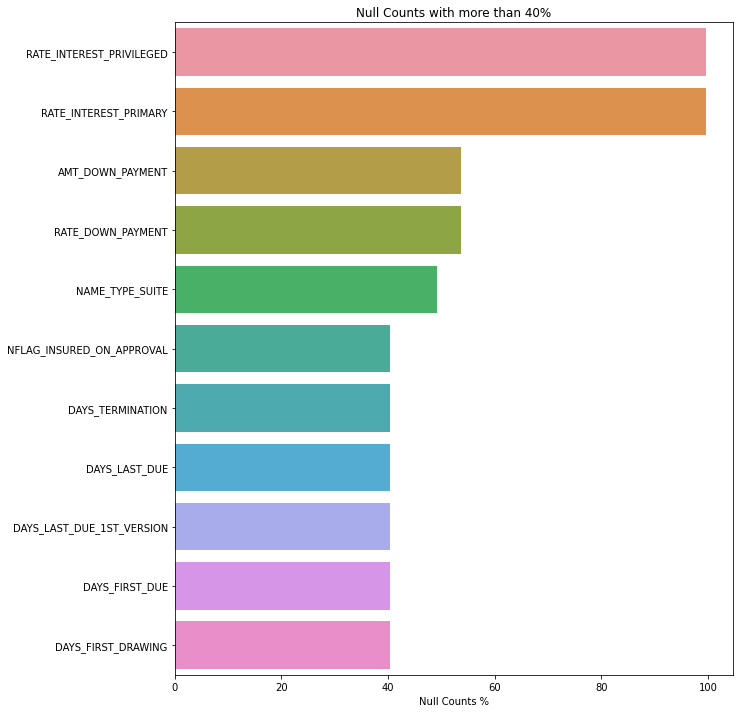

Number of columns with more than 40% of null values : 11


In [24]:
# columns having null values more than 40%

null_prev_mt_40 = null_prev_info_df[null_prev_info_df["Null Counts %"]>40][["Null Counts %"]]
create_bar_chart(null_prev_mt_40["Null Counts %"], null_prev_mt_40.index, "Null Counts with more than 40%", (10,12))

print("Number of columns with more than 40% of null values : {}".format(null_prev_mt_40.shape[0]))

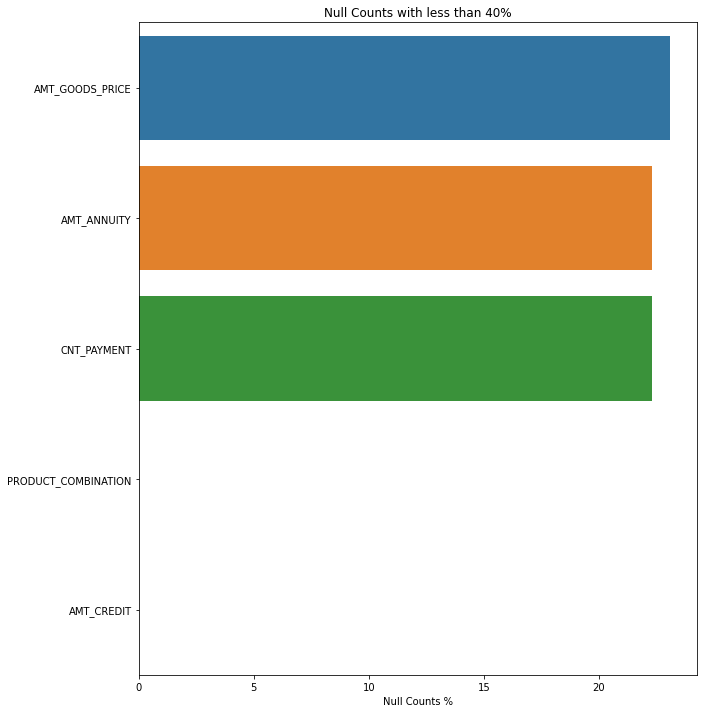

Number of columns with less than 40% of null values : 5


In [25]:
# columns having null values more than 40%

null_prev_lt_40 = null_prev_info_df[(null_prev_info_df["Null Counts %"]<40)&
                                    (null_prev_info_df["Null Counts %"]>0)][["Null Counts %"]]
create_bar_chart(null_prev_lt_40["Null Counts %"], null_prev_lt_40.index, "Null Counts with less than 40%", (10,12))

print("Number of columns with less than 40% of null values : {}".format(null_prev_lt_40.shape[0]))

In [26]:
# analysis whole dataset for NAME_CONTRACT_STATUS for filtering of the data

dataset_feature_analysis(cl_prev_data, "NAME_CONTRACT_STATUS")

Unique Counts   Null #  Null %  Approved #  \
SK_ID_PREV                         1670214        0    0.00     1036781   
SK_ID_CURR                          338857        0    0.00     1036781   
NAME_CONTRACT_TYPE                       4        0    0.00     1036781   
AMT_ANNUITY                         357959   372235   22.29     1036773   
AMT_APPLICATION                      93885        0    0.00     1036781   
AMT_CREDIT                           86803        1    0.00     1036780   
AMT_DOWN_PAYMENT                     29278   895844   53.64      662381   
AMT_GOODS_PRICE                      93885   385515   23.08      993946   
WEEKDAY_APPR_PROCESS_START               7        0    0.00     1036781   
HOUR_APPR_PROCESS_START                 24        0    0.00     1036781   
FLAG_LAST_APPL_PER_CONTRACT              2        0    0.00     1036781   
NFLAG_LAST_APPL_IN_DAY                   2        0    0.00     1036781   
RATE_DOWN_PAYMENT                   207033   895844   53.64      662381   
RATE_INTEREST_PRIMARY                  148  1664263   99.64        5951   
RATE_INTEREST_PRIVILEGED                25  1664263   99.64        5951   
NAME_CASH_LOAN_PURPOSE                  25        0    0.00     1036781   
NAME_CONTRACT_STATUS                     4        0    0.00     1036781   
DAYS_DECISION                         2922        0    0.00     1036781   
NAME_PAYMENT_TYPE                        4        0    0.00     1036781   
CODE_REJECT_REASON                       9        0    0.00     1036781   
NAME_TYPE_SUITE                          7   820405   49.12      664337   
NAME_CLIENT_TYPE                         4        0    0.00     1036781   
NAME_GOODS_CATEGORY                     28        0    0.00     1036781   
NAME_PORTFOLIO                           5        0    0.00     1036781   
NAME_PRODUCT_TYPE                        3        0    0.00     1036781   
CHANNEL_TYPE                             8        0    0.00     1036781   
SELLERPLACE_AREA                      2097        0    0.00     1036781   
NAME_SELLER_INDUSTRY                    11        0    0.00     1036781   
CNT_PAYMENT                             49   372230   22.29     1036777   
NAME_YIELD_GROUP                         5        0    0.00     1036781   
PRODUCT_COMBINATION                     17      346    0.02     1036781   
DAYS_FIRST_DRAWING                    2838   673065   40.30      997149   
DAYS_FIRST_DUE                        2892   673065   40.30      997149   
DAYS_LAST_DUE_1ST_VERSION             4605   673065   40.30      997149   
DAYS_LAST_DUE                         2873   673065   40.30      997149   
DAYS_TERMINATION                      2830   673065   40.30      997149   
NFLAG_INSURED_ON_APPROVAL                2   673065   40.30      997149   

                             Approved %  Refused #  Refused %  Canceled #  \
SK_ID_PREV                        62.07     290678      17.40      316319   
SK_ID_CURR                        62.07     290678      17.40      316319   
NAME_CONTRACT_TYPE                62.07     290678      17.40      316319   
AMT_ANNUITY                       62.07     249780      14.95       10514   
AMT_APPLICATION                   62.07     290678      17.40      316319   
AMT_CREDIT                        62.07     290678      17.40      316319   
AMT_DOWN_PAYMENT                  39.66      87352       5.23         643   
AMT_GOODS_PRICE                   59.51     253573      15.18       10749   
WEEKDAY_APPR_PROCESS_START        62.07     290678      17.40      316319   
HOUR_APPR_PROCESS_START           62.07     290678      17.40      316319   
FLAG_LAST_APPL_PER_CONTRACT       62.07     290678      17.40      316319   
NFLAG_LAST_APPL_IN_DAY            62.07     290678      17.40      316319   
RATE_DOWN_PAYMENT                 39.66      87352       5.23         643   
RATE_INTEREST_PRIMARY              0.36          0       0.00           0   
RATE_INTEREST_PRIVILEGE

Though the metric table created above is huge but still it shows much more information than just looking at the info.<br>
Similarly like we did for the Client's application data we did some analysis for this data too.<br>
After careful consideration of the above table which includes the numbers and ratio of null values and further segmented in our target variables (which in this case it's Approved, Refused, Unused Offer and Cancelled), we decided to drop some columns on certain factors and also the casuation of that variable.<br>
By certain factors, it is the percentage distribution of our target variable, the null values percentage that column has and by causation, it is the column descrition provided and how that features impacts our target variable.<br>
The assumptions are purely based on the metric table and the column description provided and are made only for the sake of data analysis only.<br>
Also these are the features other than the feature having null values greater than 40%.
- SK_ID_PREV, SK_ID_CURR : it is just an ID so we can remove it.
- WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START : since it is just the weekday and hour of processing which does not signify anything, so we can drop it.
- FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY : since these are flag columns which signifies the status of the application and contract, so we can ignore them for analysis purpose.
- Other features are found to have high ration of XNA values, so we can ignore them also for the sake of analysis.

In [27]:
print("Shape before dropping rows and columns : {}".format(cl_prev_data.shape))

# dropping null values with more than 40% of null values
cl_prev_data = cl_prev_data[[x for x in cl_prev_data.columns if x not in null_prev_mt_40.index]]

# Dropping these columns for the sake of analysis
columns_to_drop_in_prev_data = ["SK_ID_PREV","SK_ID_CURR","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START",
                                "FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","NAME_CASH_LOAN_PURPOSE",
                                "DAYS_DECISION","NAME_PAYMENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO",
                                "NAME_PRODUCT_TYPE","SELLERPLACE_AREA","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP"]
cl_prev_data = cl_prev_data[[x for x in cl_prev_data.columns if x not in columns_to_drop_in_prev_data]]

# Converting the XNA to np.NAN values and then Dropping Null Rows to limit our data with non null values only.
cl_prev_data = cl_prev_data.replace("XNA",np.NAN).dropna()

print("Shape after dropping rows and columns  : {}".format(cl_prev_data.shape))

Shape before dropping rows and columns : (1670214, 37)
Shape after dropping rows and columns  : (1243148, 11)


Now we are left with 11 features out of initial 37 columns and dropped almost 1.3% of the actual rows.

In [28]:
# Binning criteria and function

def create_percentile_list(column, data=cl_prev_data, bins=[0,20,40,60,80,100]):
    lst = [int(np.percentile(data[column],x)) for x in bins]
    return lst


def create_bins(column, bins, data=cl_prev_data, labels=["L","M","H","VH"]):
    return pd.cut(data[column], bins, labels=labels, duplicates="drop")

There is CNT_PAYMENT which is actually of categorical value but is in the numeric form also the no. of categories are huge, so we can overcome thisissue by binning the data.

In [29]:
# Binning CNT_PAYMENT because this features more than 10 unique values and it represents a number

cl_prev_data["CNT_PAYMENT"] = create_bins("CNT_PAYMENT", create_percentile_list("CNT_PAYMENT"))
cl_prev_data["CNT_PAYMENT"] = cl_prev_data["CNT_PAYMENT"].astype("str")

In [30]:
# This is how the final data for previous_application_data looks like and will be used for further analysis

cl_prev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243148 entries, 0 to 1670213
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   NAME_CONTRACT_TYPE    1243148 non-null  object 
 1   AMT_ANNUITY           1243148 non-null  float64
 2   AMT_APPLICATION       1243148 non-null  float64
 3   AMT_CREDIT            1243148 non-null  float64
 4   AMT_GOODS_PRICE       1243148 non-null  float64
 5   NAME_CONTRACT_STATUS  1243148 non-null  object 
 6   CODE_REJECT_REASON    1243148 non-null  object 
 7   NAME_CLIENT_TYPE      1243148 non-null  object 
 8   CHANNEL_TYPE          1243148 non-null  object 
 9   CNT_PAYMENT           1150218 non-null  object 
 10  PRODUCT_COMBINATION   1243148 non-null  object 
dtypes: float64(4), object(7)
memory usage: 113.8+ MB


### DATA ANALYSIS

#### UNIVARIATE ANALYSIS FOR APPLICATION DATA

In [31]:
# Let's divide our dataset into two groups, one with TARGET variable 0 and other with 1

cl_curr_data_0 = cl_curr_data[cl_curr_data["TARGET"]==0]
cl_curr_data_1 = cl_curr_data[cl_curr_data["TARGET"]==1]

print(cl_curr_data_0.shape, cl_curr_data_1.shape)

(282686, 23) (24825, 23)


In [32]:
def create_bargraph_for_comparison(feature, df1, df2):
    df1 = df1.sort_values(feature)
    df2 = df2.sort_values(feature)
    plt.figure(figsize=(15, 15))
    # Subplot-1
    plt.subplot(2,2,1)
    plt.title(feature+"# with group 0")
    sns.countplot(y=df1[feature])
    # Subplot-2
    plt.subplot(2,2,2)
    plt.title(feature+"# with group 1")
    sns.countplot(y=df2[feature])
    # Subplot-3
    perc_dict0 = dict(round(100*df1[feature].value_counts(normalize=True),2))
    plt.subplot(2,2,3)
    plt.title(feature+"% with group 0")
    sns.barplot(y=list(perc_dict0.keys()), x=list(perc_dict0.values()))
    # Subplot-4
    perc_dict1 = dict(round(100*df2[feature].value_counts(normalize=True),2))
    plt.subplot(2,2,4)
    plt.title(feature+"% with group 1")
    sns.barplot(y=list(perc_dict1.keys()), x=list(perc_dict1.values()))
    display(perc_dict0)
    display(perc_dict1)
    
    
def creating_boxplot_for_comparison(feature, df1, df2, log_scale=False):
    df1 = df1.sort_values(feature)
    df2 = df2.sort_values(feature)
    plt.figure(figsize=(15, 15))
    # Subplot-1
    plt.subplot(2,2,1)
    if log_scale:
        plt.yscale("log")
    plt.title(feature+"# with group 0")
    sns.boxplot(y=df1[feature])
    # Subplot-2
    plt.subplot(2,2,2)
    if log_scale:
        plt.yscale("log")
    plt.title(feature+"# with group 1")
    sns.boxplot(y=df2[feature])
    
    # Subplot-3
    plt.subplot(2,2,3)
    if log_scale:
        plt.xscale("log")
    plt.title(feature+"# with group 0")
    sns.distplot(df1[feature], hist=False)
    # Subplot-4
    plt.subplot(2,2,4)
    if log_scale:
        plt.xscale("log")
    plt.title(feature+"# with group 1")
    sns.distplot(df2[feature], hist=False)
    
# short summary functions

def short_summary_for_categorical_features(column, data=cl_curr_data, display_plots=False):
    '''
    Function to generate a short summary for categorical features
    column : name of the columns
    data : dataframe
    '''
    print("SUMMARY FOR : {}\n".format(column))
    print("Total Null Values : {}\n".format(data[column].isnull().sum()))
    print("Value Distribution")
    print(data[column].value_counts(), "\n")
    print("Distribution with TARGET Variable")
    print(data[["TARGET"]+[column]].groupby("TARGET").count(), "\n")
    print("Distribution of attributes with TARGET Variable")
    pivot_data = pd.DataFrame(pd.pivot_table(data,"TARGET",index=column,
                                             columns=data["TARGET"].astype("category"),aggfunc="count"))
    pivot_data.columns = ["0#","1#"]
    pivot_data["0%"] = round((pivot_data["0#"]/data.shape[0])*100,2)
    pivot_data["1%"] = round((pivot_data["1#"]/data.shape[0])*100,2)
    print(pivot_data.sort_values("1%", ascending=False), "\n")
    if display_plots:
        print("PLOT :")
        data[column].value_counts().plot.barh()
    
    
    
def short_summary_for_numerical_features(column, data=cl_curr_data, display_plots=False):
    '''
    Function to generate a short summary for numerical features
    column : name of the columns
    data : dataframe
    '''
    print("SUMMARY FOR : {}\n".format(column))
    print("Total Values : {}".format(data[column].shape[0]))
    print("Total Values with TARGET variable : {}".format(data[data["TARGET"]==1][column].shape[0]))
    print("Total Null Values : {}\n".format(data[column].isnull().sum()))
    print("Numerical Description :")
    print(round(data[column].describe(),4),"\n")
    if display_plots:
        print("PLOTS :")
        create_boxplot_and_histplot(column, data)

SUMMARY FOR : NAME_CONTRACT_TYPE

Total Null Values : 0

Value Distribution
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 

Distribution with TARGET Variable
        NAME_CONTRACT_TYPE
TARGET                    
0                   282686
1                    24825 

Distribution of attributes with TARGET Variable
                        0#     1#     0%    1%
NAME_CONTRACT_TYPE                            
Cash loans          255011  23221  82.93  7.55
Revolving loans      27675   1604   9.00  0.52 



{'Cash loans': 90.21, 'Revolving loans': 9.79}

{'Cash loans': 93.54, 'Revolving loans': 6.46}

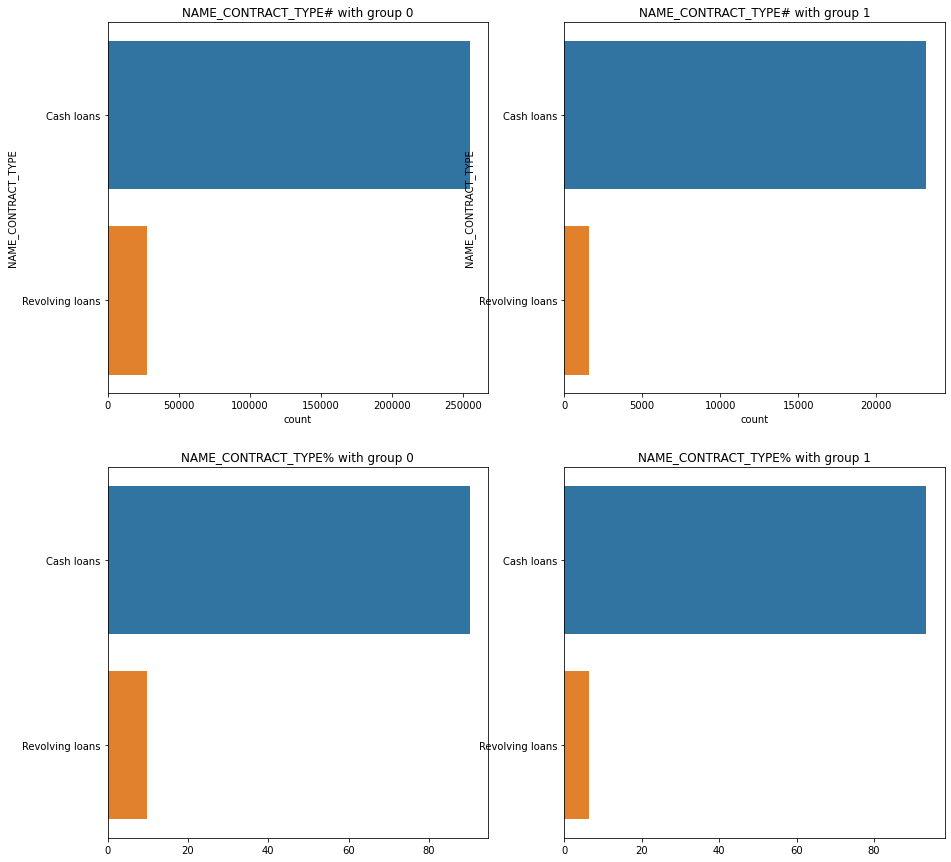

In [33]:
# Analysing NAME_CONTRACT_TYPE variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("NAME_CONTRACT_TYPE")
create_bargraph_for_comparison("NAME_CONTRACT_TYPE", cl_curr_data_0, cl_curr_data_1)

- Client's with Cash Loans Contract type are found be defaulters, this is also due to the large ratio of Cash Loans in the dataset.

SUMMARY FOR : CODE_GENDER

Total Null Values : 0

Value Distribution
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 

Distribution with TARGET Variable
        CODE_GENDER
TARGET             
0            282686
1             24825 

Distribution of attributes with TARGET Variable
                 0#     1#     0%    1%
CODE_GENDER                            
F            188278  14170  61.23  4.61
M             94404  10655  30.70  3.46
XNA               4      0   0.00  0.00 



{'F': 66.6, 'M': 33.4, 'XNA': 0.0}

{'F': 57.08, 'M': 42.92}

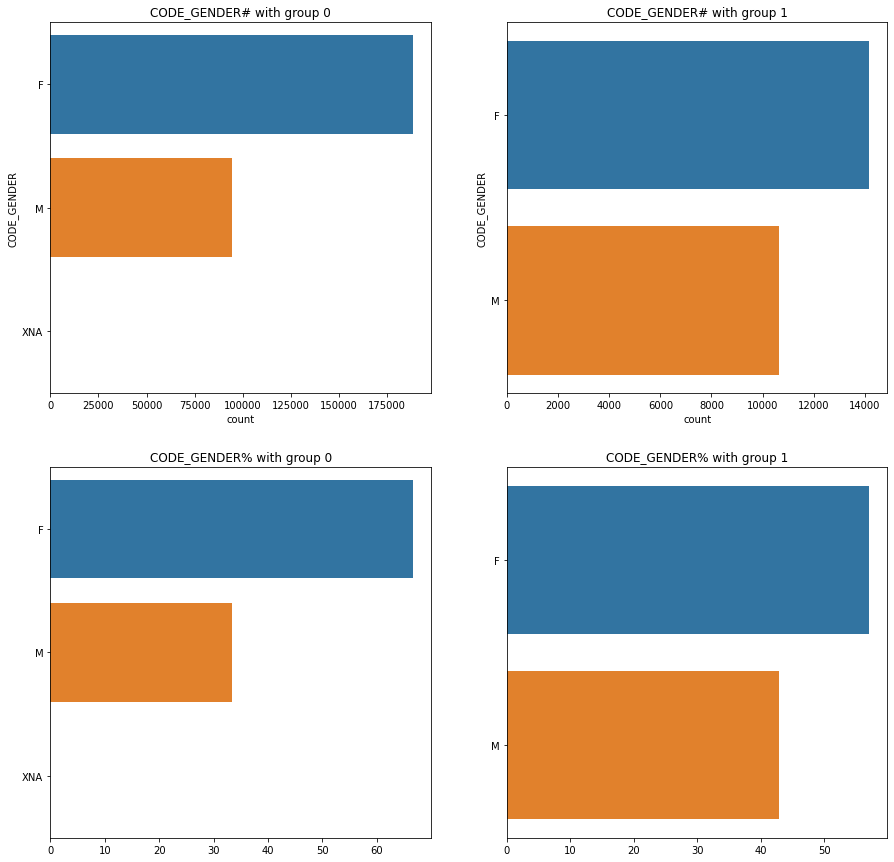

In [34]:
# Analysing CODE_GENDER variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("CODE_GENDER")
create_bargraph_for_comparison("CODE_GENDER", cl_curr_data_0, cl_curr_data_1)

- There are no null values but there is XNA which is a type of null value and can be treated using mode of the data.
- Females are found to be more defaulter as compared to males, this might also be due to large number of data for female categories.

SUMMARY FOR : FLAG_OWN_CAR

Total Null Values : 0

Value Distribution
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 

Distribution with TARGET Variable
        FLAG_OWN_CAR
TARGET              
0             282686
1              24825 

Distribution of attributes with TARGET Variable
                  0#     1#     0%    1%
FLAG_OWN_CAR                            
N             185675  17249  60.38  5.61
Y              97011   7576  31.55  2.46 



{'N': 65.68, 'Y': 34.32}

{'N': 69.48, 'Y': 30.52}

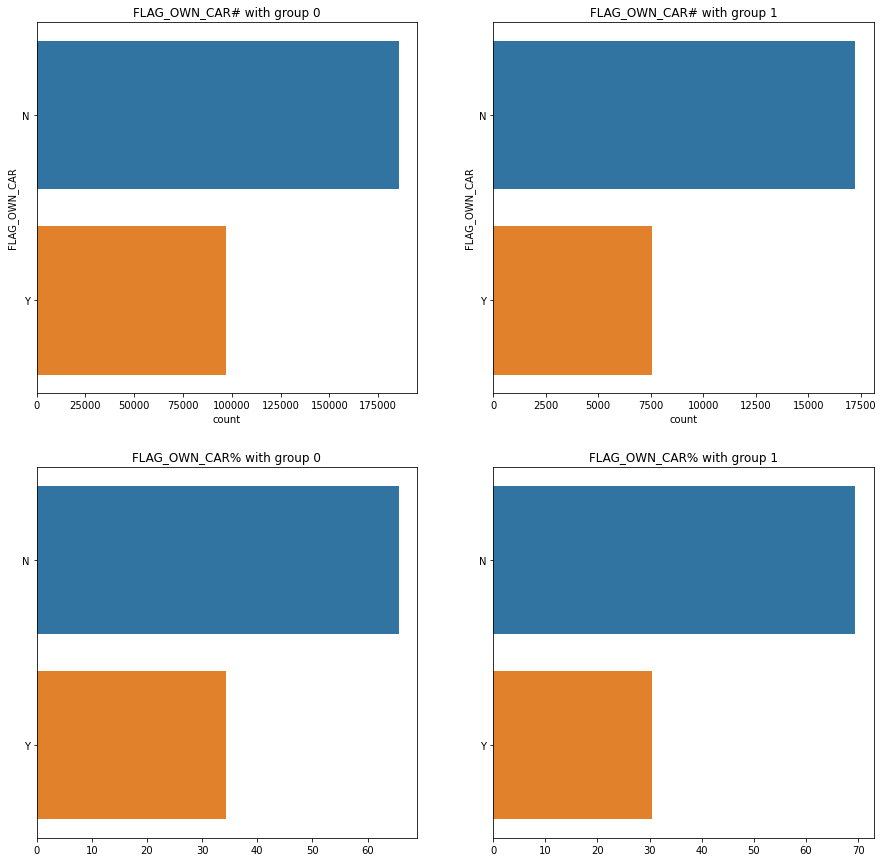

In [35]:
# Analysing FLAG_OWN_CAR variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("FLAG_OWN_CAR")
create_bargraph_for_comparison("FLAG_OWN_CAR", cl_curr_data_0, cl_curr_data_1)

- Client's who doesn't own a car are found to default more as compared to clients who owns the car.

SUMMARY FOR : FLAG_OWN_REALTY

Total Null Values : 0

Value Distribution
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64 

Distribution with TARGET Variable
        FLAG_OWN_REALTY
TARGET                 
0                282686
1                 24825 

Distribution of attributes with TARGET Variable
                     0#     1#     0%    1%
FLAG_OWN_REALTY                            
Y                196329  16983  63.84  5.52
N                 86357   7842  28.08  2.55 



{'Y': 69.45, 'N': 30.55}

{'Y': 68.41, 'N': 31.59}

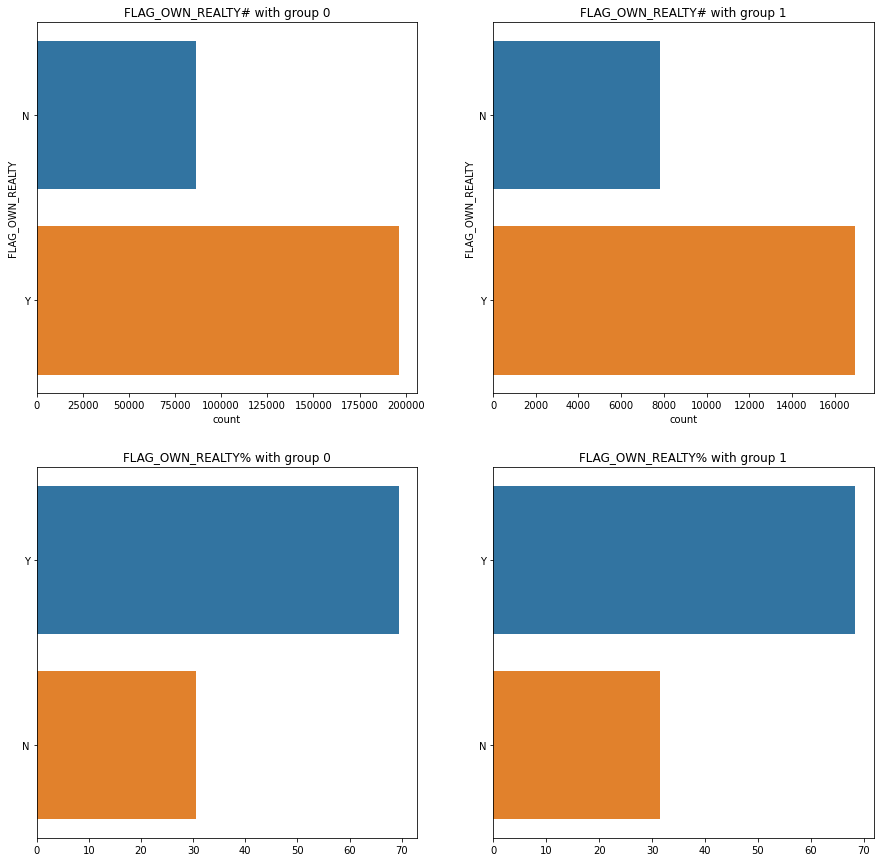

In [36]:
# Analysing FLAG_OWN_REALTY variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("FLAG_OWN_REALTY")
create_bargraph_for_comparison("FLAG_OWN_REALTY", cl_curr_data_0, cl_curr_data_1)

- Client's who does own a flat are found to default more as compared to clients who doesn't own a property.

SUMMARY FOR : NAME_TYPE_SUITE

Total Null Values : 1292

Value Distribution
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64 

Distribution with TARGET Variable
        NAME_TYPE_SUITE
TARGET                 
0                281464
1                 24755 

Distribution of attributes with TARGET Variable
                     0#     1#     0%    1%
NAME_TYPE_SUITE                            
Unaccompanied    228189  20337  74.21  6.61
Family            37140   3009  12.08  0.98
Spouse, partner   10475    895   3.41  0.29
Children           3026    241   0.98  0.08
Other_B            1596    174   0.52  0.06
Other_A             790     76   0.26  0.02
Group of people     248     23   0.08  0.01 



{'Unaccompanied': 81.07,
 'Family': 13.2,
 'Spouse, partner': 3.72,
 'Children': 1.08,
 'Other_B': 0.57,
 'Other_A': 0.28,
 'Group of people': 0.09}

{'Unaccompanied': 82.15,
 'Family': 12.16,
 'Spouse, partner': 3.62,
 'Children': 0.97,
 'Other_B': 0.7,
 'Other_A': 0.31,
 'Group of people': 0.09}

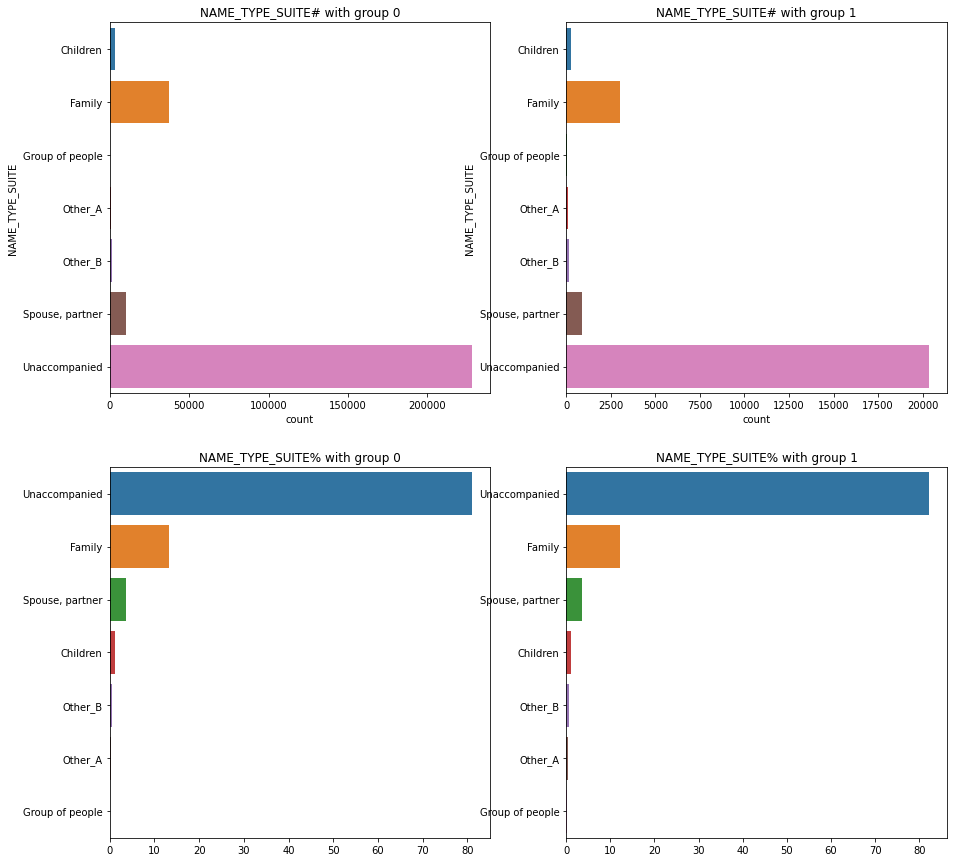

In [37]:
# Analysing NAME_TYPE_SUITE variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("NAME_TYPE_SUITE")
create_bargraph_for_comparison("NAME_TYPE_SUITE", cl_curr_data_0, cl_curr_data_1)

- There are total of 1292 null values which can be imputed using mode of the data.
- Also the client's who were Unaccompanied are found to be defaulter.

SUMMARY FOR : NAME_INCOME_TYPE

Total Null Values : 0

Value Distribution
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64 

Distribution with TARGET Variable
        NAME_INCOME_TYPE
TARGET                  
0                 282686
1                  24825 

Distribution of attributes with TARGET Variable
                          0#     1#     0%    1%
NAME_INCOME_TYPE                                
Working               143550  15224  46.68  4.95
Commercial associate   66257   5360  21.55  1.74
Pensioner              52380   2982  17.03  0.97
State servant          20454   1249   6.65  0.41
Businessman               10      0   0.00  0.00
Maternity leave            3      2   0.00  0.00
Student                   18      0   0.01  0.00
Unemployed    

{'Working': 50.78,
 'Commercial associate': 23.44,
 'Pensioner': 18.53,
 'State servant': 7.24,
 'Student': 0.01,
 'Unemployed': 0.0,
 'Businessman': 0.0,
 'Maternity leave': 0.0}

{'Working': 61.33,
 'Commercial associate': 21.59,
 'Pensioner': 12.01,
 'State servant': 5.03,
 'Unemployed': 0.03,
 'Maternity leave': 0.01}

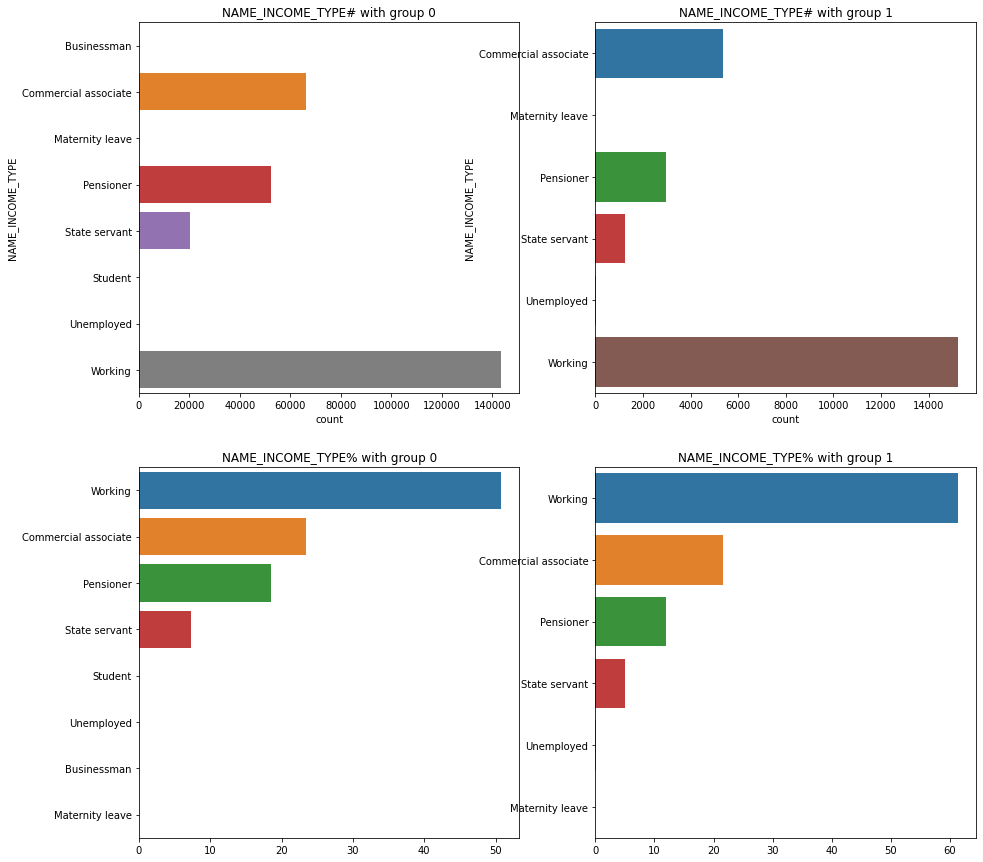

In [38]:
# Analysing NAME_INCOME_TYPE variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("NAME_INCOME_TYPE")
create_bargraph_for_comparison("NAME_INCOME_TYPE", cl_curr_data_0, cl_curr_data_1)

- Working people are found to default more this could be the case as most of the clients are working or they have a job.

SUMMARY FOR : NAME_EDUCATION_TYPE

Total Null Values : 0

Value Distribution
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64 

Distribution with TARGET Variable
        NAME_EDUCATION_TYPE
TARGET                     
0                    282686
1                     24825 

Distribution of attributes with TARGET Variable
                                   0#     1#     0%    1%
NAME_EDUCATION_TYPE                                      
Secondary / secondary special  198867  19524  64.67  6.35
Higher education                70854   4009  23.04  1.30
Incomplete higher                9405    872   3.06  0.28
Lower secondary                  3399    417   1.11  0.14
Academic degree                   161      3   0.05  0.00 



{'Secondary / secondary special': 70.35,
 'Higher education': 25.06,
 'Incomplete higher': 3.33,
 'Lower secondary': 1.2,
 'Academic degree': 0.06}

{'Secondary / secondary special': 78.65,
 'Higher education': 16.15,
 'Incomplete higher': 3.51,
 'Lower secondary': 1.68,
 'Academic degree': 0.01}

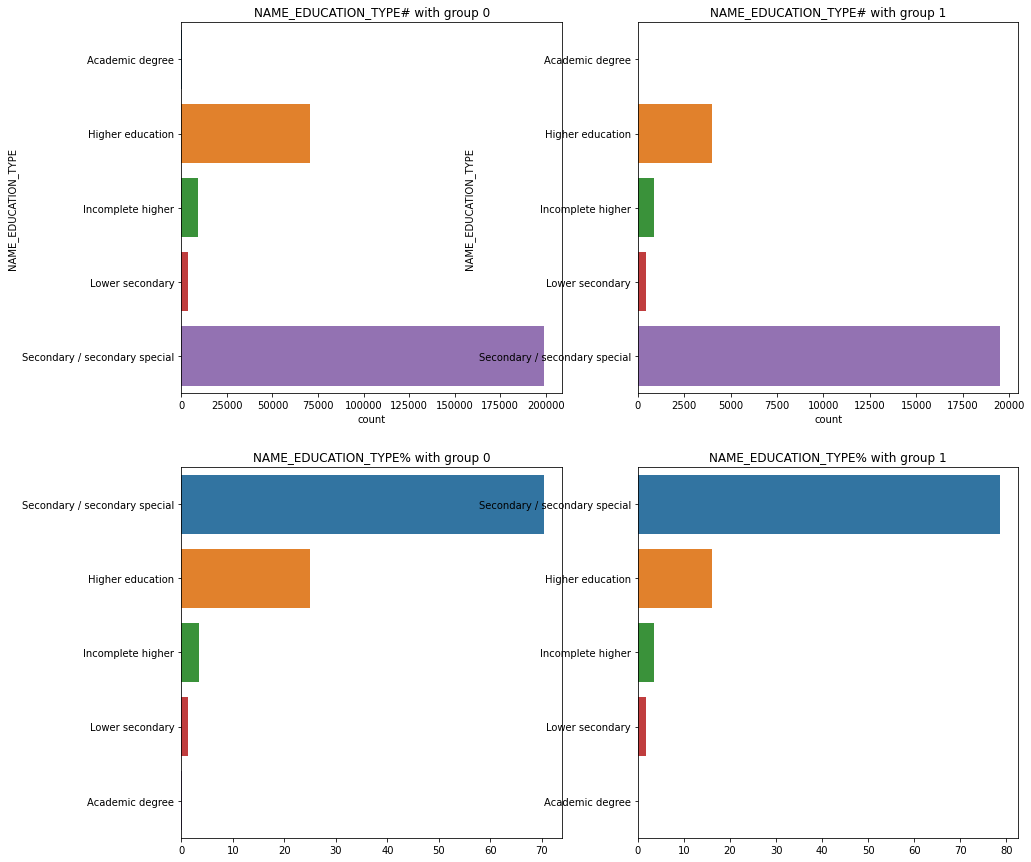

In [39]:
# Analysing NAME_EDUCATION_TYPE variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("NAME_EDUCATION_TYPE")
create_bargraph_for_comparison("NAME_EDUCATION_TYPE", cl_curr_data_0, cl_curr_data_1)

- Client's with Secondary education are found to default more, this might be the case that almost all people now a days have atleast this level of education.

SUMMARY FOR : NAME_FAMILY_STATUS

Total Null Values : 0

Value Distribution
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64 

Distribution with TARGET Variable
        NAME_FAMILY_STATUS
TARGET                    
0                   282686
1                    24825 

Distribution of attributes with TARGET Variable
                          0#     1#     0%    1%
NAME_FAMILY_STATUS                              
Married               181582  14850  59.05  4.83
Single / not married   40987   4457  13.33  1.45
Civil marriage         26814   2961   8.72  0.96
Separated              18150   1620   5.90  0.53
Widow                  15151    937   4.93  0.30
Unknown                    2      0   0.00  0.00 



{'Married': 64.23,
 'Single / not married': 14.5,
 'Civil marriage': 9.49,
 'Separated': 6.42,
 'Widow': 5.36,
 'Unknown': 0.0}

{'Married': 59.82,
 'Single / not married': 17.95,
 'Civil marriage': 11.93,
 'Separated': 6.53,
 'Widow': 3.77}

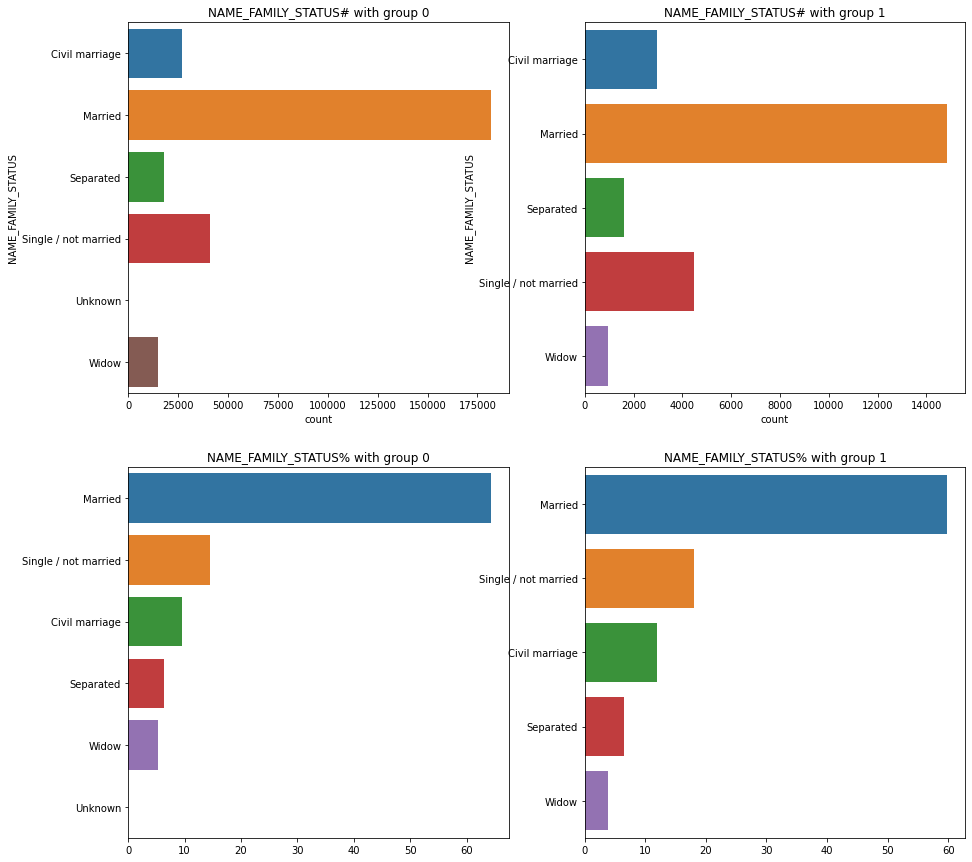

In [40]:
# Analysing NAME_FAMILY_STATUS variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("NAME_FAMILY_STATUS")
create_bargraph_for_comparison("NAME_FAMILY_STATUS", cl_curr_data_0, cl_curr_data_1)

- Married people are found to default more, this is also a case of data skewness as theer are large ratio for married peoples.

SUMMARY FOR : NAME_HOUSING_TYPE

Total Null Values : 0

Value Distribution
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64 

Distribution with TARGET Variable
        NAME_HOUSING_TYPE
TARGET                   
0                  282686
1                   24825 

Distribution of attributes with TARGET Variable
                         0#     1#     0%    1%
NAME_HOUSING_TYPE                              
House / apartment    251596  21272  81.82  6.92
With parents          13104   1736   4.26  0.56
Municipal apartment   10228    955   3.33  0.31
Rented apartment       4280    601   1.39  0.20
Office apartment       2445    172   0.80  0.06
Co-op apartment        1033     89   0.34  0.03 



{'House / apartment': 89.0,
 'With parents': 4.64,
 'Municipal apartment': 3.62,
 'Rented apartment': 1.51,
 'Office apartment': 0.86,
 'Co-op apartment': 0.37}

{'House / apartment': 85.69,
 'With parents': 6.99,
 'Municipal apartment': 3.85,
 'Rented apartment': 2.42,
 'Office apartment': 0.69,
 'Co-op apartment': 0.36}

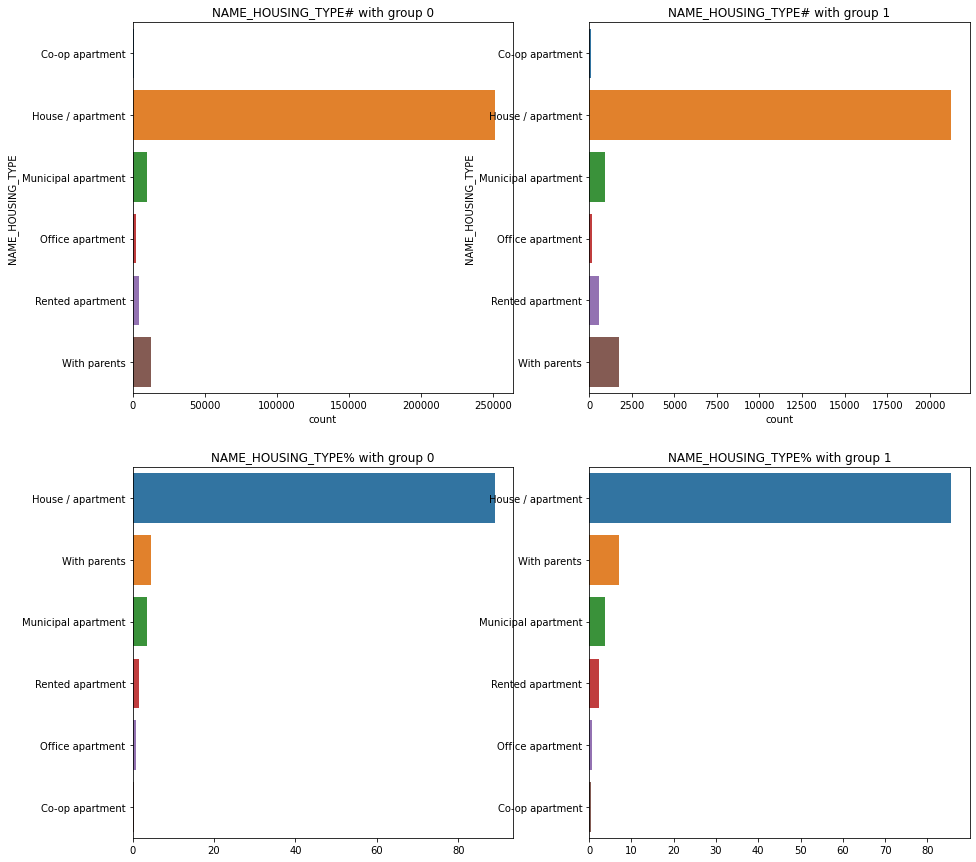

In [41]:
# Analysing NAME_HOUSING_TYPE variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("NAME_HOUSING_TYPE")
create_bargraph_for_comparison("NAME_HOUSING_TYPE", cl_curr_data_0, cl_curr_data_1)

- Client's who live in a separate house or apartment are found to be defaulter, this is also due to large ratio for this data.

SUMMARY FOR : OCCUPATION_TYPE

Total Null Values : 96391

Value Distribution
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64 

Distribution with TARGET Variable
        OCCUPATION_TYPE
TARGET                 
0                192573
1                 18547 

Distribution of attributes with TARGET Variable
                          0#    1#     0%    1%
OCCUPATION_TYPE                                
Laborers               49348  5838  16.05  1.90
Sal

{'Laborers': 25.63,
 'Sales staff': 15.06,
 'Core staff': 13.41,
 'Managers': 10.41,
 'Drivers': 8.57,
 'High skill tech staff': 5.55,
 'Accountants': 4.85,
 'Medicine staff': 4.14,
 'Security staff': 3.12,
 'Cooking staff': 2.77,
 'Cleaning staff': 2.18,
 'Private service staff': 1.29,
 'Low-skill Laborers': 0.9,
 'Secretaries': 0.63,
 'Waiters/barmen staff': 0.62,
 'Realty agents': 0.36,
 'HR staff': 0.27,
 'IT staff': 0.26}

{'Laborers': 31.48,
 'Sales staff': 16.67,
 'Drivers': 11.36,
 'Core staff': 9.37,
 'Managers': 7.16,
 'Security staff': 3.89,
 'High skill tech staff': 3.78,
 'Cooking staff': 3.35,
 'Medicine staff': 3.08,
 'Accountants': 2.56,
 'Cleaning staff': 2.41,
 'Low-skill Laborers': 1.94,
 'Private service staff': 0.94,
 'Waiters/barmen staff': 0.82,
 'Secretaries': 0.5,
 'Realty agents': 0.32,
 'HR staff': 0.19,
 'IT staff': 0.18}

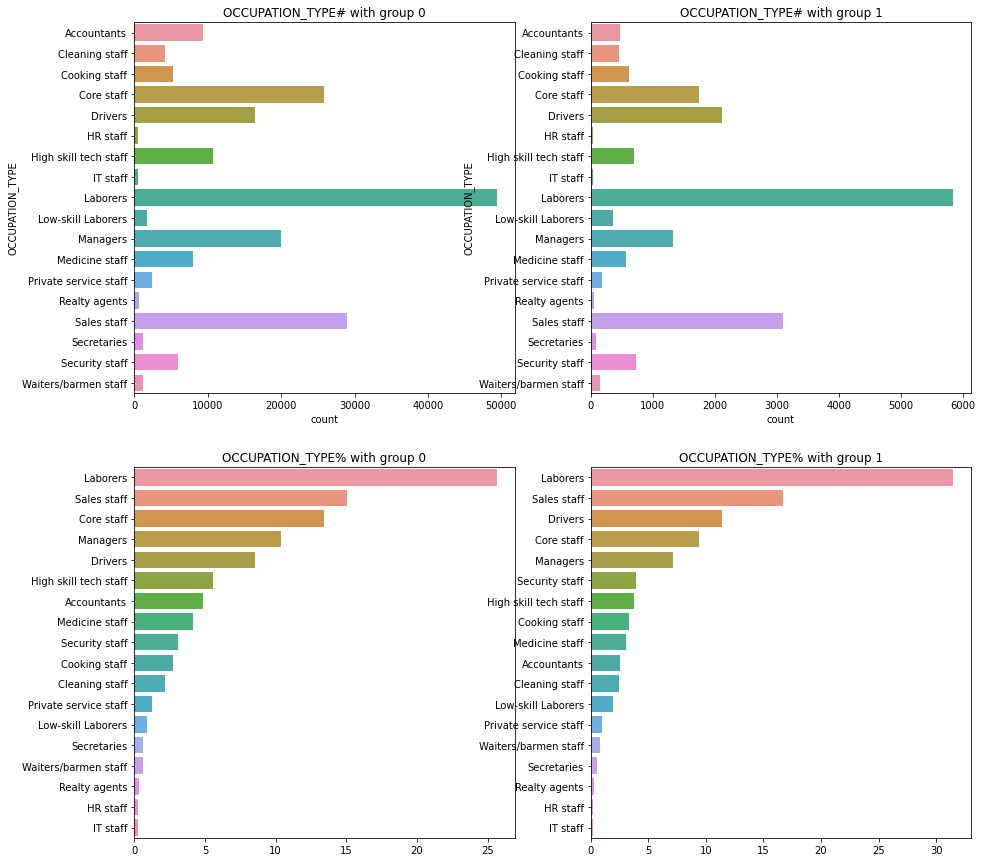

In [42]:
# Analysing OCCUPATION_TYPE variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("OCCUPATION_TYPE")
create_bargraph_for_comparison("OCCUPATION_TYPE", cl_curr_data_0, cl_curr_data_1)

- There are 96391 missing missing values which cannot be computed using mode as it will display wrong information, to compute this feature we can compare this with other variables then we can impute them.
- Client's of Labour category are found to default more even though there are missing values.

SUMMARY FOR : ORGANIZATION_TYPE

Total Null Values : 0

Value Distribution
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   15

{'Business Entity Type 3': 21.82,
 'XNA': 18.53,
 'Self-employed': 12.21,
 'Other': 5.45,
 'Medicine': 3.7,
 'Government': 3.42,
 'Business Entity Type 2': 3.41,
 'School': 2.96,
 'Trade: type 7': 2.51,
 'Kindergarten': 2.26,
 'Construction': 2.1,
 'Business Entity Type 1': 1.94,
 'Transport: type 4': 1.73,
 'Industry: type 9': 1.11,
 'Trade: type 3': 1.11,
 'Industry: type 3': 1.04,
 'Security': 1.03,
 'Housing': 0.96,
 'Military': 0.88,
 'Industry: type 11': 0.87,
 'Bank': 0.84,
 'Police': 0.79,
 'Agriculture': 0.78,
 'Transport: type 2': 0.72,
 'Postal': 0.7,
 'Security Ministries': 0.66,
 'Trade: type 2': 0.63,
 'Restaurant': 0.57,
 'Services': 0.52,
 'University': 0.45,
 'Industry: type 7': 0.43,
 'Transport: type 3': 0.35,
 'Industry: type 1': 0.33,
 'Hotel': 0.32,
 'Electricity': 0.31,
 'Industry: type 4': 0.28,
 'Trade: type 6': 0.21,
 'Insurance': 0.2,
 'Industry: type 5': 0.2,
 'Telecom': 0.19,
 'Emergency': 0.18,
 'Industry: type 2': 0.15,
 'Advertising': 0.14,
 'Culture': 0

{'Business Entity Type 3': 25.47,
 'Self-employed': 15.74,
 'XNA': 12.04,
 'Other': 5.14,
 'Business Entity Type 2': 3.63,
 'Construction': 3.16,
 'Trade: type 7': 2.98,
 'Medicine': 2.97,
 'Government': 2.92,
 'School': 2.12,
 'Transport: type 4': 2.02,
 'Business Entity Type 1': 1.96,
 'Kindergarten': 1.95,
 'Trade: type 3': 1.45,
 'Industry: type 3': 1.4,
 'Security': 1.31,
 'Agriculture': 1.04,
 'Housing': 0.95,
 'Industry: type 11': 0.94,
 'Industry: type 9': 0.91,
 'Restaurant': 0.85,
 'Transport: type 3': 0.75,
 'Postal': 0.73,
 'Transport: type 2': 0.69,
 'Military': 0.54,
 'Trade: type 2': 0.54,
 'Bank': 0.52,
 'Police': 0.47,
 'Industry: type 1': 0.46,
 'Industry: type 7': 0.42,
 'Services': 0.42,
 'Security Ministries': 0.39,
 'Industry: type 4': 0.36,
 'University': 0.26,
 'Electricity': 0.25,
 'Hotel': 0.25,
 'Telecom': 0.18,
 'Realtor': 0.17,
 'Industry: type 5': 0.17,
 'Emergency': 0.16,
 'Advertising': 0.14,
 'Insurance': 0.14,
 'Industry: type 2': 0.13,
 'Trade: type 1

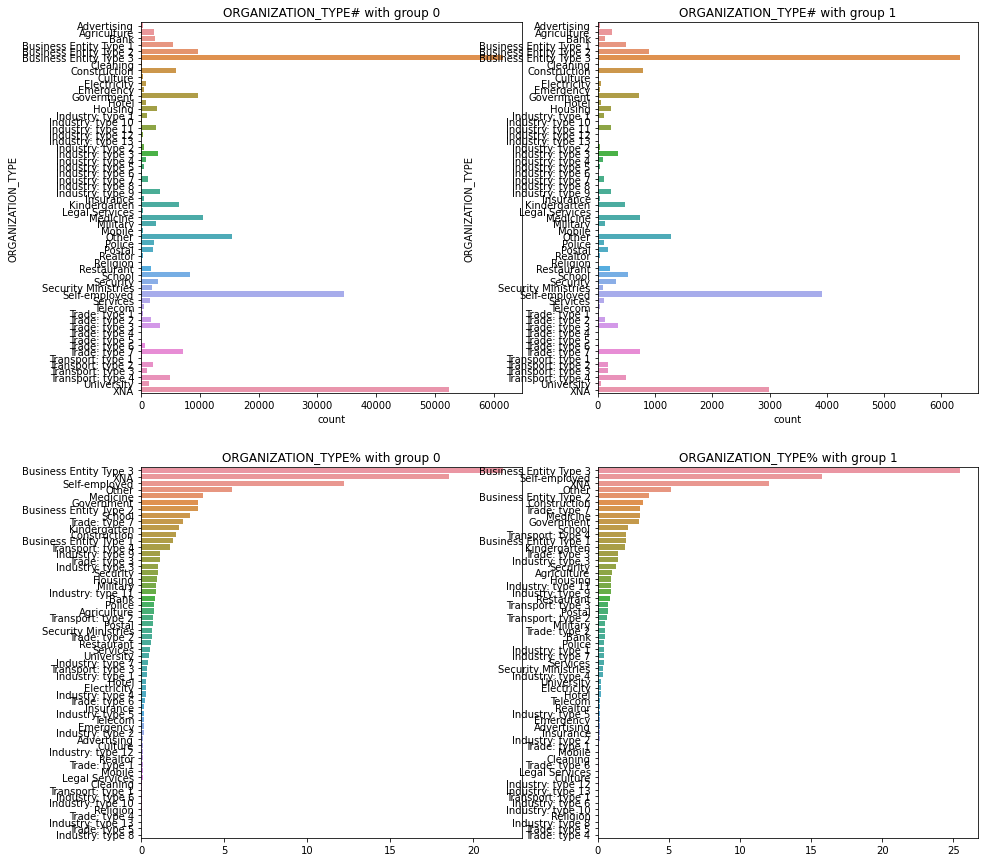

In [43]:
# Analysing ORGANIZATION_TYPE variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("ORGANIZATION_TYPE")
create_bargraph_for_comparison("ORGANIZATION_TYPE", cl_curr_data_0, cl_curr_data_1)

- There are no null values but we can see there are XNA values, since it occupies large ratio we cannot ignore ot or impute it with another varibale, since it can be signifying some other dimension of the data.

SUMMARY FOR : CNT_CHILDREN

Total Null Values : 0

Value Distribution
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
8          2
10         2
9          2
11         1
Name: CNT_CHILDREN, dtype: int64 

Distribution with TARGET Variable
        CNT_CHILDREN
TARGET              
0             282686
1              24825 

Distribution of attributes with TARGET Variable
                  0#     1#     0%    1%
CNT_CHILDREN                            
0             198762  16609  64.64  5.40
1              55665   5454  18.10  1.77
2              24416   2333   7.94  0.76
3               3359    358   1.09  0.12
4                374     55   0.12  0.02
10                 2      0   0.00  0.00
11                 0      1   0.00  0.00
12                 2      0   0.00  0.00
14                 3      0   0.00  0.00
19                 2      0   0.00  0.00
5                 77      7   0.03  0.00

{'0': 70.31,
 '1': 19.69,
 '2': 8.64,
 '3': 1.19,
 '4': 0.13,
 '5': 0.03,
 '6': 0.01,
 '7': 0.0,
 '14': 0.0,
 '19': 0.0,
 '12': 0.0,
 '8': 0.0,
 '10': 0.0}

{'0': 66.9,
 '1': 21.97,
 '2': 9.4,
 '3': 1.44,
 '4': 0.22,
 '5': 0.03,
 '6': 0.02,
 '9': 0.01,
 '11': 0.0}

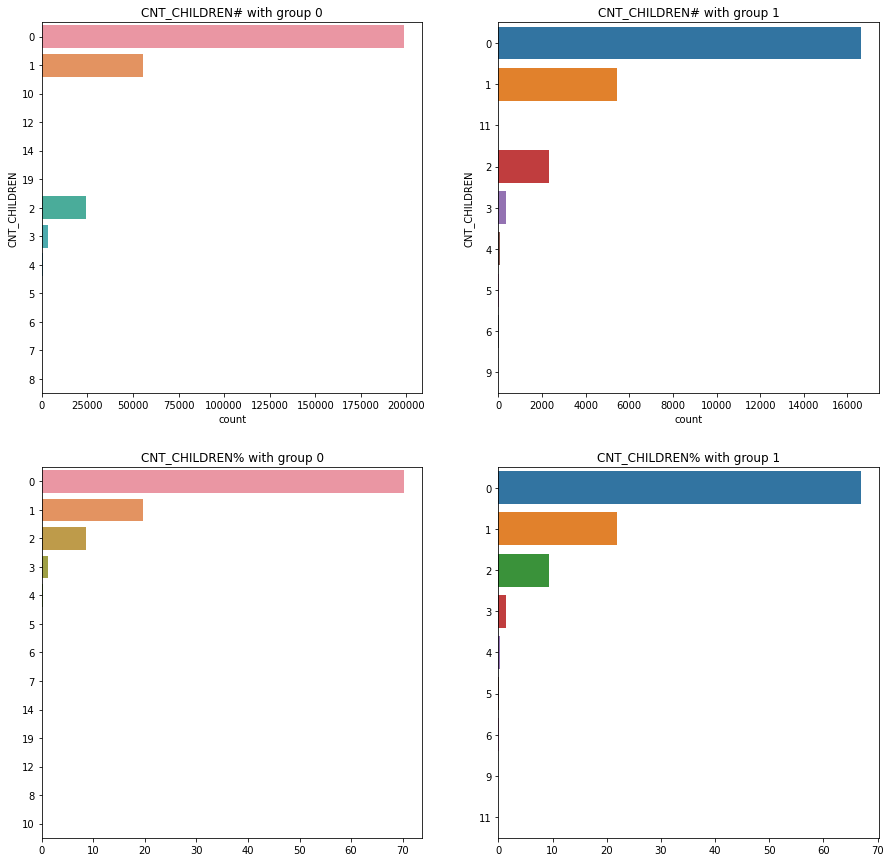

In [44]:
# Analysing CNT_CHILDREN variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("CNT_CHILDREN")
create_bargraph_for_comparison("CNT_CHILDREN", cl_curr_data_0, cl_curr_data_1)

- Client's who are bachelor or married clients who dowsn't have a child are found to default more.

SUMMARY FOR : REGION_RATING_CLIENT

Total Null Values : 0

Value Distribution
2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64 

Distribution with TARGET Variable
        REGION_RATING_CLIENT
TARGET                      
0                     282686
1                      24825 

Distribution of attributes with TARGET Variable
                          0#     1#     0%    1%
REGION_RATING_CLIENT                            
2                     209077  17907  67.99  5.82
3                      42964   5366  13.97  1.74
1                      30645   1552   9.97  0.50 



{'2': 73.96, '3': 15.2, '1': 10.84}

{'2': 72.13, '3': 21.62, '1': 6.25}

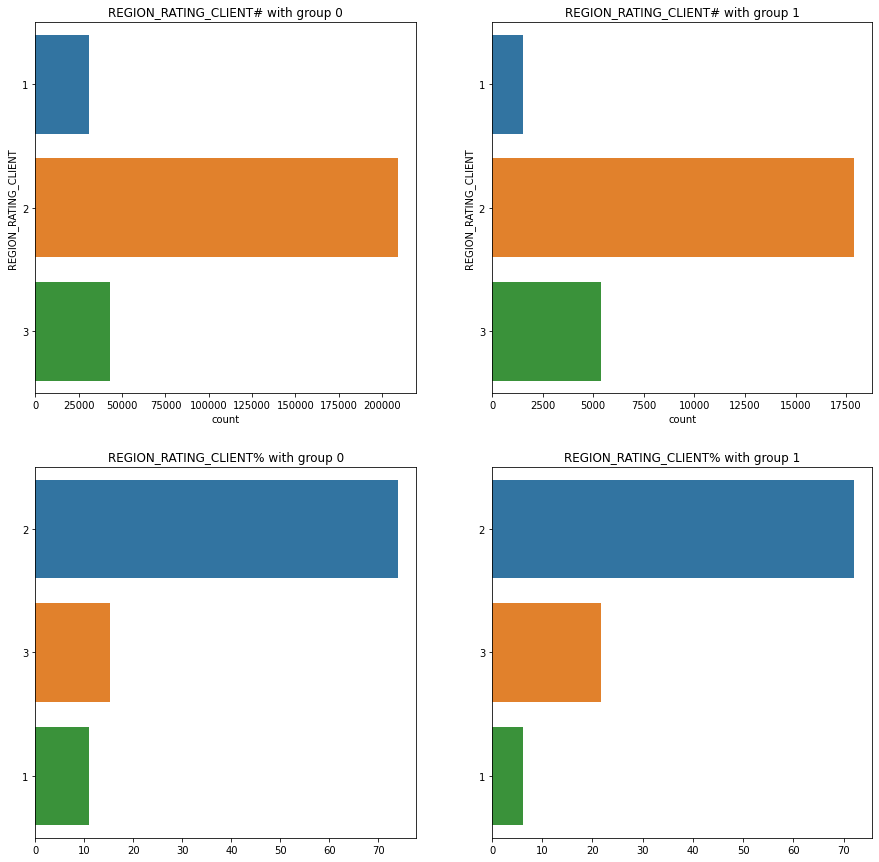

In [45]:
# Analysing REGION_RATING_CLIENT variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("REGION_RATING_CLIENT")
create_bargraph_for_comparison("REGION_RATING_CLIENT", cl_curr_data_0, cl_curr_data_1)

- Clients with region rating of 2 are found to default more.

SUMMARY FOR : CNT_FAM_MEMBERS

Total Null Values : 0

Value Distribution
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
20.0         2
16.0         2
12.0         2
nan          2
14.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64 

Distribution with TARGET Variable
        CNT_FAM_MEMBERS
TARGET                 
0                282686
1                 24825 

Distribution of attributes with TARGET Variable
                     0#     1#     0%    1%
CNT_FAM_MEMBERS                            
2.0              146348  12009  47.59  3.91
1.0               62172   5675  20.22  1.85
3.0               47993   4608  15.61  1.50
4.0               22561   2136   7.34  0.69
5.0                3151    327   1.02  0.11
6.0                 353     55   0.11  0.02
9.0                   6      0   0.00  0.00
8.0                  14      6   0.00  0.00

{'2.0': 51.77,
 '1.0': 21.99,
 '3.0': 16.98,
 '4.0': 7.98,
 '5.0': 1.11,
 '6.0': 0.12,
 '7.0': 0.03,
 '8.0': 0.0,
 '9.0': 0.0,
 '10.0': 0.0,
 'nan': 0.0,
 '20.0': 0.0,
 '16.0': 0.0,
 '12.0': 0.0,
 '14.0': 0.0,
 '15.0': 0.0}

{'2.0': 48.37,
 '1.0': 22.86,
 '3.0': 18.56,
 '4.0': 8.6,
 '5.0': 1.32,
 '6.0': 0.22,
 '7.0': 0.02,
 '8.0': 0.02,
 '10.0': 0.0,
 '13.0': 0.0,
 '11.0': 0.0}

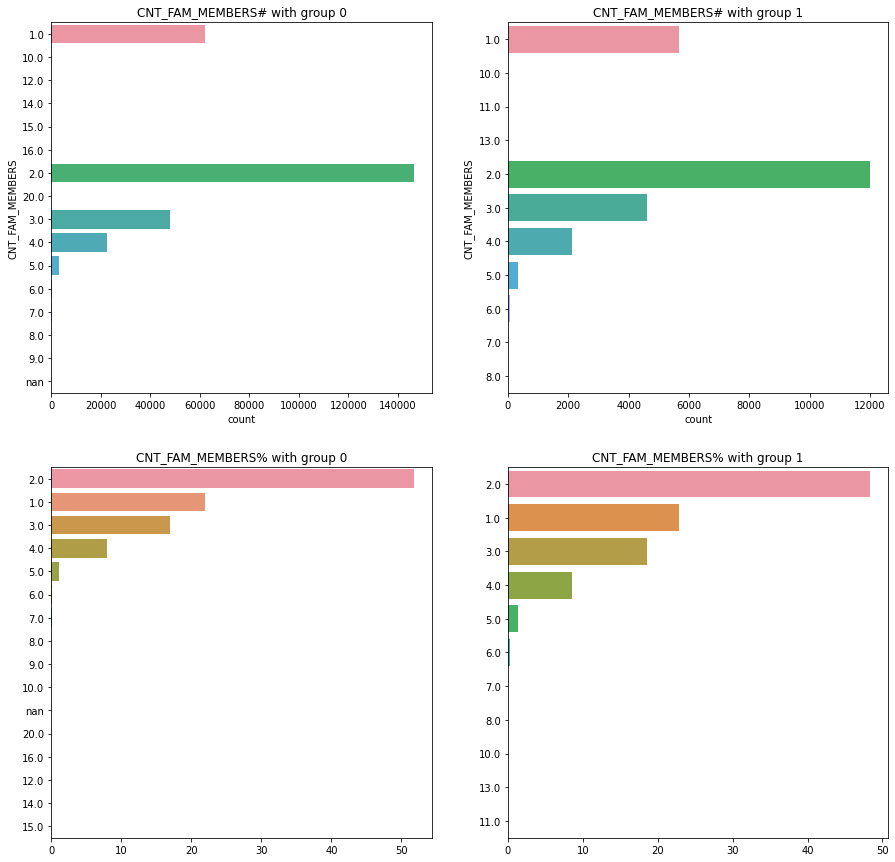

In [46]:
# Analysing CNT_FAM_MEMBERS variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features("CNT_FAM_MEMBERS")
create_bargraph_for_comparison("CNT_FAM_MEMBERS", cl_curr_data_0, cl_curr_data_1)

- There are two nan values which can be imputed using mode operation since the missing values are only 2.
- Client's with two family members are found to default more.

SUMMARY FOR : AMT_INCOME_TOTAL

Total Values : 307511
Total Values with TARGET variable : 24825
Total Null Values : 0

Numerical Description :
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64 



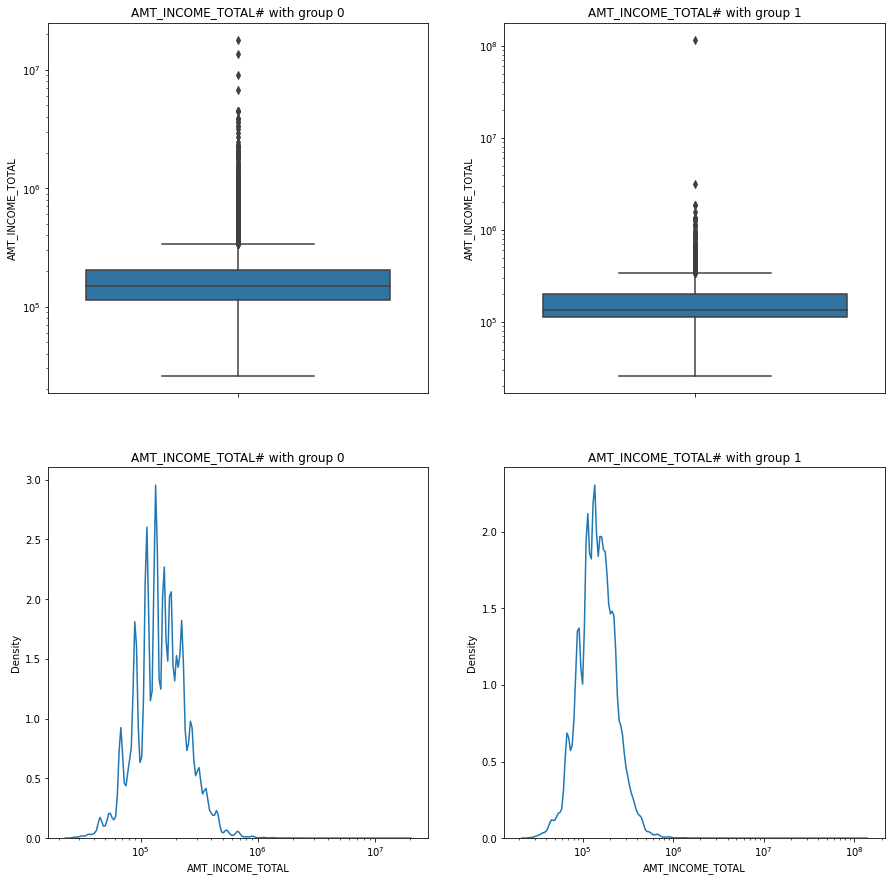

In [47]:
# Analysing AMT_INCOME_TOTAL variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features("AMT_INCOME_TOTAL")
creating_boxplot_for_comparison("AMT_INCOME_TOTAL", cl_curr_data_0, cl_curr_data_1, True)

- The data has outliers even after ploted aginst the log scale.
- These outliers can be treated by binning the values.
- Both the categories shows the similar trend for this feature.

SUMMARY FOR : AMT_CREDIT

Total Values : 307511
Total Values with TARGET variable : 24825
Total Null Values : 0

Numerical Description :
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64 



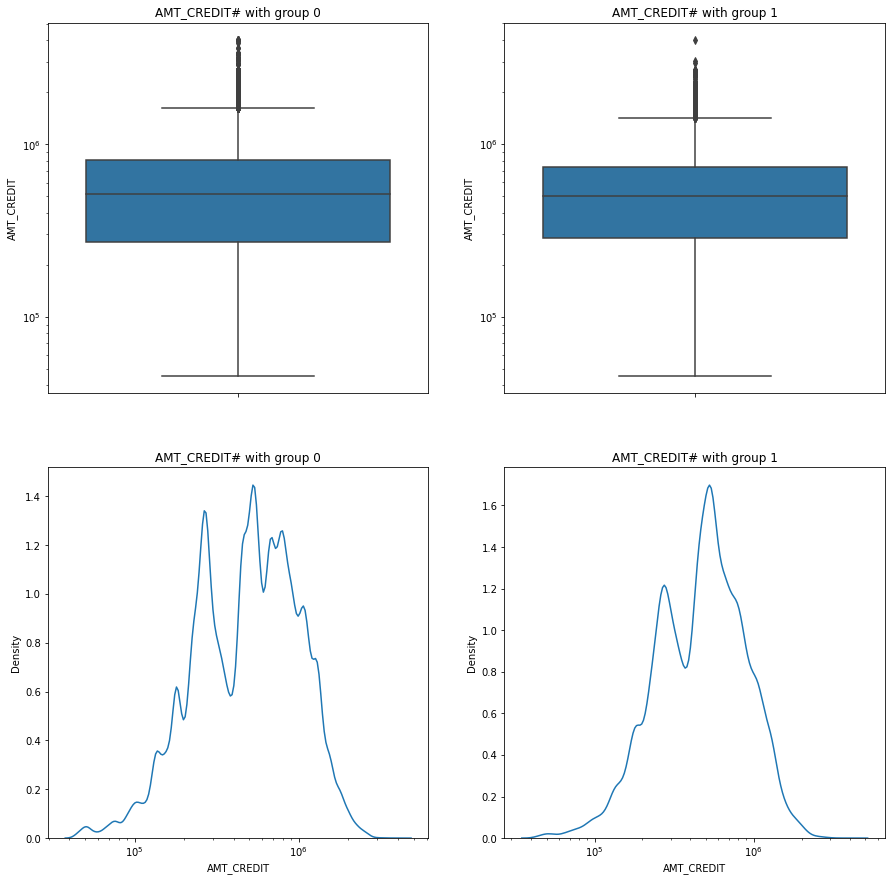

In [48]:
# Analysing AMT_CREDIT variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features("AMT_CREDIT")
creating_boxplot_for_comparison("AMT_CREDIT", cl_curr_data_0, cl_curr_data_1, True)

- The data has outliers even after ploted aginst the log scale.
- These outliers can be treated by binning the values.
- Both the categories shows the similar trend for this feature.

SUMMARY FOR : AMT_ANNUITY

Total Values : 307511
Total Values with TARGET variable : 24825
Total Null Values : 12

Numerical Description :
count    307499.0000
mean      27108.5739
std       14493.7373
min        1615.5000
25%       16524.0000
50%       24903.0000
75%       34596.0000
max      258025.5000
Name: AMT_ANNUITY, dtype: float64 



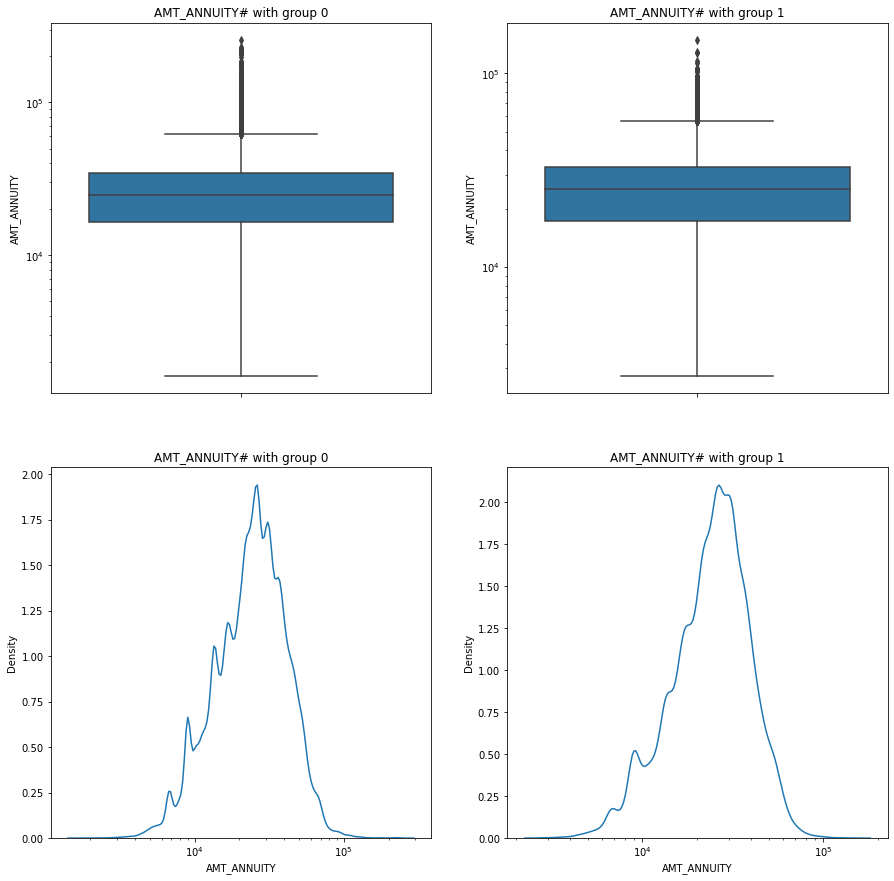

In [49]:
# Analysing AMT_ANNUITY variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features("AMT_ANNUITY")
creating_boxplot_for_comparison("AMT_ANNUITY", cl_curr_data_0, cl_curr_data_1, True)

- There are 12 null values which can be imputed using median of the data.
- The data has outliers even after ploted aginst the log scale.
- These outliers can be treated by binning the values.
- Both the categories shows the similar trend for this feature.

SUMMARY FOR : AMT_GOODS_PRICE

Total Values : 307511
Total Values with TARGET variable : 24825
Total Null Values : 278

Numerical Description :
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64 



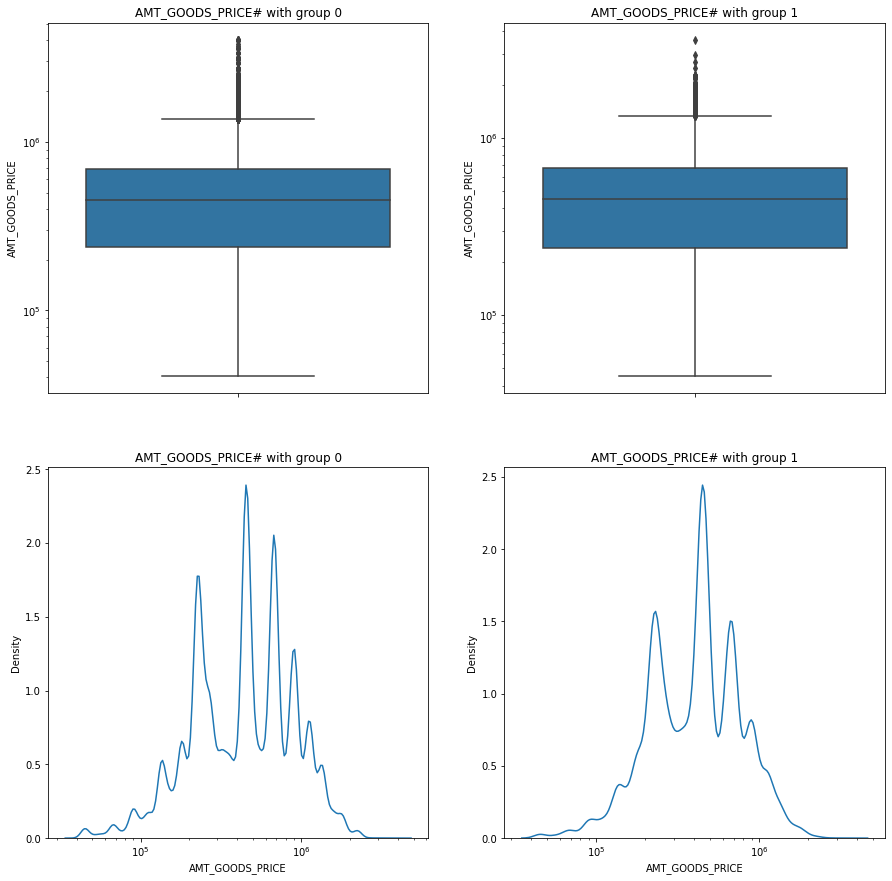

In [50]:
# Analysing AMT_GOODS_PRICE variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features("AMT_GOODS_PRICE")
creating_boxplot_for_comparison("AMT_GOODS_PRICE", cl_curr_data_0, cl_curr_data_1, True)

- There are 278 null values which can be imputed using median of the data.
- The data has outliers even after ploted aginst the log scale.
- These outliers can be treated by binning the values.
- Both the categories shows the similar trend for this feature.

SUMMARY FOR : REGION_POPULATION_RELATIVE

Total Values : 307511
Total Values with TARGET variable : 24825
Total Null Values : 0

Numerical Description :
count    307511.0000
mean          0.0209
std           0.0138
min           0.0003
25%           0.0100
50%           0.0188
75%           0.0287
max           0.0725
Name: REGION_POPULATION_RELATIVE, dtype: float64 



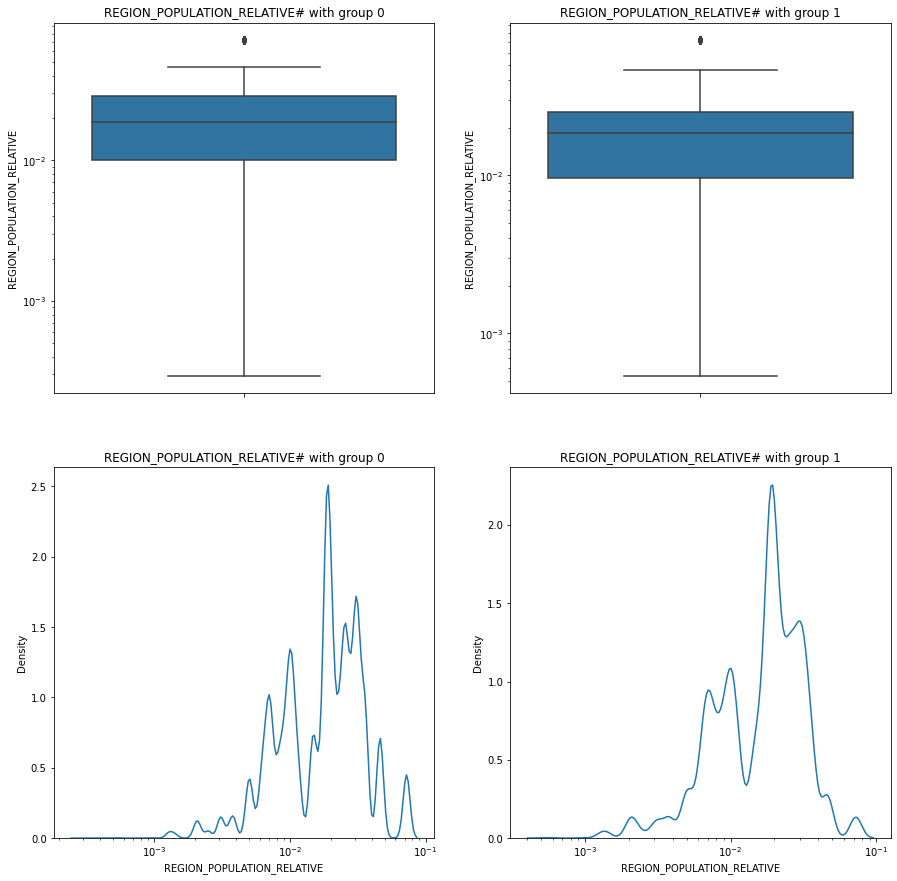

In [51]:
# Analysing REGION_POPULATION_RELATIVE variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features("REGION_POPULATION_RELATIVE")
creating_boxplot_for_comparison("REGION_POPULATION_RELATIVE", cl_curr_data_0, cl_curr_data_1, True)

- There are some outliers which we can drop as the data looks perfectly fine for analysis with the log scale.
- Also both the categories shows the similar trend for this feature.

SUMMARY FOR : AGE

Total Values : 307511
Total Values with TARGET variable : 24825
Total Null Values : 0

Numerical Description :
count    307511.0000
mean         43.9370
std          11.9561
min          20.5200
25%          34.0100
50%          43.1500
75%          53.9200
max          69.1200
Name: AGE, dtype: float64 



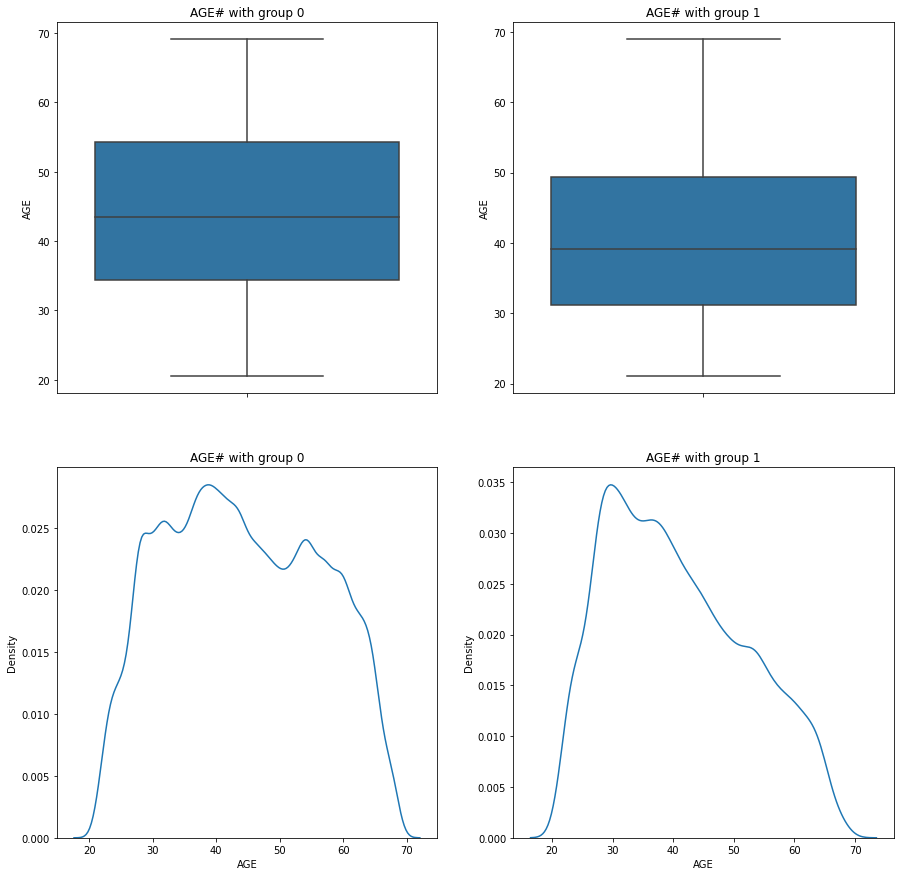

In [52]:
# Analysing AGE variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features("AGE")
creating_boxplot_for_comparison("AGE", cl_curr_data_0, cl_curr_data_1, False)

- The data is perfect for analysis as there are no missing values or outliers.
- Client's with age above 40 are found to be less defaulters.

SUMMARY FOR : TENURE

Total Values : 307511
Total Values with TARGET variable : 24825
Total Null Values : 0

Numerical Description :
count    307511.0000
mean        185.5480
std         382.0393
min           0.0000
25%           2.5600
50%           6.0800
75%          15.6400
max        1000.6700
Name: TENURE, dtype: float64 



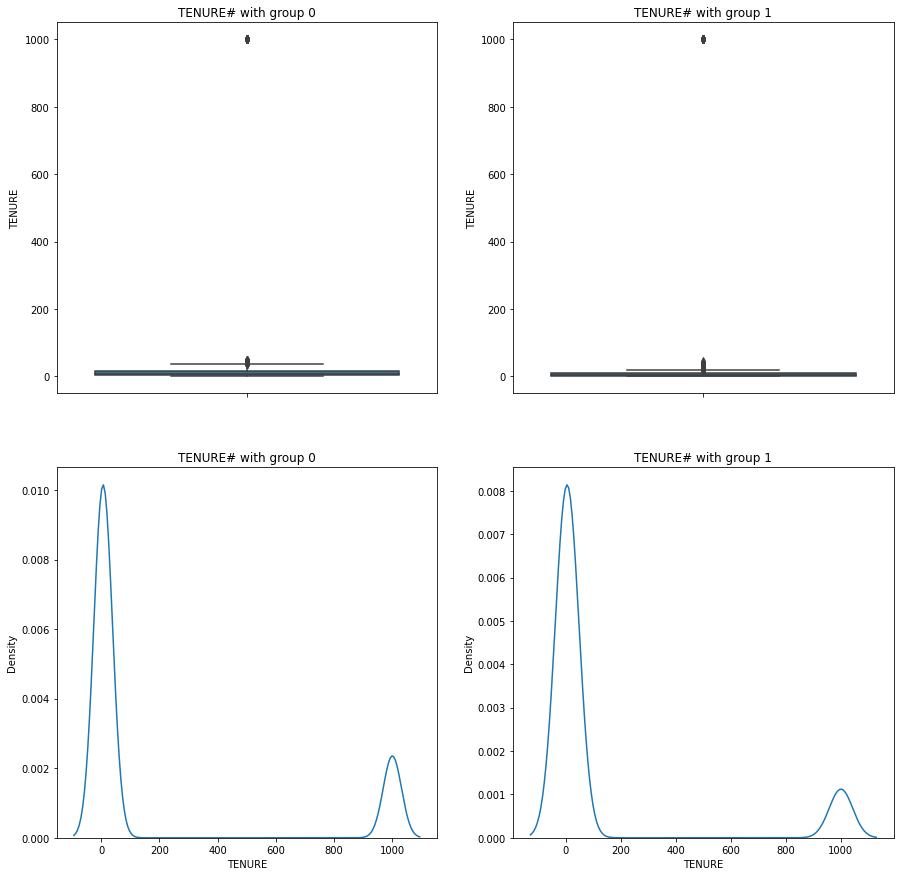

In [53]:
# Analysing TENURE variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features("TENURE")
creating_boxplot_for_comparison("TENURE", cl_curr_data_0, cl_curr_data_1, False)

- There is very less outleirs which on removed can make the data perfect for analysis.
- Both the categories shows the similar trend for this feature.

SUMMARY FOR : EXT_SOURCE_2

Total Values : 307511
Total Values with TARGET variable : 24825
Total Null Values : 660

Numerical Description :
count    306851.0000
mean          0.5144
std           0.1911
min           0.0000
25%           0.3925
50%           0.5660
75%           0.6636
max           0.8550
Name: EXT_SOURCE_2, dtype: float64 



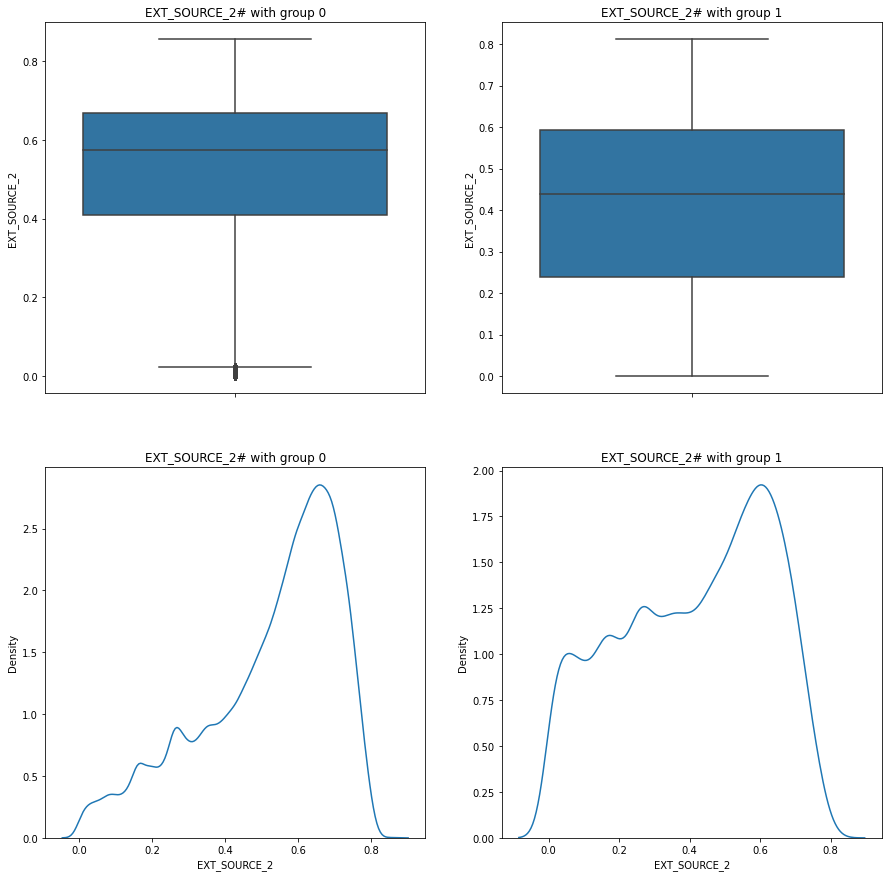

In [54]:
# Analysing EXT_SOURCE_2 variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features("EXT_SOURCE_2")
creating_boxplot_for_comparison("EXT_SOURCE_2", cl_curr_data_0, cl_curr_data_1, False)

- The data is perfect as there are no outliers and missing values.
- Client's with working years less than 0.5 are found to default more.

#### UNIVARIATE ANALYSIS FOR PREVIOUS APPLICATION DATA

In [55]:
# Let's divide our data into 4 groups, 'Approved', 'Refused', 'Unused offer', 'Canceled'

cl_prev_data_a = cl_prev_data[cl_prev_data["NAME_CONTRACT_STATUS"]=="Approved"]
cl_prev_data_r = cl_prev_data[cl_prev_data["NAME_CONTRACT_STATUS"]=="Refused"]
cl_prev_data_u = cl_prev_data[cl_prev_data["NAME_CONTRACT_STATUS"]=="Unused offer"]
cl_prev_data_c = cl_prev_data[cl_prev_data["NAME_CONTRACT_STATUS"]=="Canceled"]

print(cl_prev_data_a.shape, cl_prev_data_r.shape, cl_prev_data_u.shape, cl_prev_data_c.shape)

(993352, 11) (238404, 11) (909, 11) (10483, 11)


In [56]:
def create_bargraph_for_comparison_prev_data(feature, df1, df2, df3, df4):
    df1 = df1.sort_values(feature)
    df2 = df2.sort_values(feature)
    df3 = df3.sort_values(feature)
    df4 = df4.sort_values(feature)
    plt.figure(figsize=(30, 15))
    # Subplot-1
    plt.subplot(2,4,1)
    plt.title(feature+"# with group Approved")
    sns.countplot(y=df1[feature])
    # Subplot-2
    plt.subplot(2,4,2)
    plt.title(feature+"# with group Refused")
    sns.countplot(y=df2[feature])
    # Subplot-3
    plt.subplot(2,4,3)
    plt.title(feature+"# with group Unused offer")
    sns.countplot(y=df3[feature])
    # Subplot-4
    plt.subplot(2,4,4)
    plt.title(feature+"# with group Canceled")
    sns.countplot(y=df4[feature])
    
    # Subplot-5
    perc_dict0 = dict(100*df1[feature].value_counts(normalize=True))
    plt.subplot(2,4,5)
    plt.title(feature+"% with group Approved")
    sns.barplot(y=list(perc_dict0.keys()), x=list(perc_dict0.values()))
    # Subplot-6
    perc_dict1 = dict(100*df2[feature].value_counts(normalize=True))
    plt.subplot(2,4,6)
    plt.title(feature+"% with group Refused")
    sns.barplot(y=list(perc_dict1.keys()), x=list(perc_dict1.values()))
    # Subplot-5
    perc_dict2 = dict(100*df3[feature].value_counts(normalize=True))
    plt.subplot(2,4,7)
    plt.title(feature+"% with group Unused offer")
    sns.barplot(y=list(perc_dict2.keys()), x=list(perc_dict2.values()))
    # Subplot-6
    perc_dict3 = dict(100*df4[feature].value_counts(normalize=True))
    plt.subplot(2,4,8)
    plt.title(feature+"% with group Canceled")
    sns.barplot(y=list(perc_dict3.keys()), x=list(perc_dict3.values()))
    
    
def creating_boxplot_for_comparison_prev_data(feature, df1, df2, df3, df4, log_scale=False):
    df1 = df1.sort_values(feature)
    df2 = df2.sort_values(feature)
    df3 = df3.sort_values(feature)
    df4 = df4.sort_values(feature)
    plt.figure(figsize=(30, 15))
    # Subplot-1
    plt.subplot(2,4,1)
    if log_scale:
        plt.yscale("log")
    plt.title(feature+"# with group Approved")
    sns.boxplot(y=df1[feature])
    # Subplot-2
    plt.subplot(2,4,2)
    if log_scale:
        plt.yscale("log")
    plt.title(feature+"# with group Refused")
    sns.boxplot(y=df2[feature])
    # Subplot-3
    plt.subplot(2,4,3)
    if log_scale:
        plt.yscale("log")
    plt.title(feature+"# with group Unused offer")
    sns.boxplot(y=df3[feature])
    # Subplot-4
    plt.subplot(2,4,4)
    if log_scale:
        plt.yscale("log")
    plt.title(feature+"# with group Canceled")
    sns.boxplot(y=df4[feature])
    
    # Subplot-5
    plt.subplot(2,4,5)
    if log_scale:
        plt.xscale("log")
    plt.title(feature+"# with group Approved")
    sns.distplot(df1[feature], hist=False)
    # Subplot-6
    plt.subplot(2,4,6)
    if log_scale:
        plt.xscale("log")
    plt.title(feature+"# with group Refused")
    sns.distplot(df2[feature], hist=False)
    # Subplot-7
    plt.subplot(2,4,7)
    if log_scale:
        plt.xscale("log")
    plt.title(feature+"# with group Unused offer")
    sns.distplot(df3[feature], hist=False)
    # Subplot-8
    plt.subplot(2,4,8)
    if log_scale:
        plt.xscale("log")
    plt.title(feature+"# with group Canceled")
    sns.distplot(df4[feature], hist=False)
    
# short summary functions

def short_summary_for_categorical_features_prev(column, data=cl_prev_data, display_plots=False):
    '''
    Function to generate a short summary for categorical features
    column : name of the columns
    data : dataframe
    '''
    data = data.sort_values("NAME_CONTRACT_STATUS")
    print("SUMMARY FOR : {}\n".format(column))
    print("Total Null Values : {}\n".format(data[column].isnull().sum()))
    print("Value Distribution")
    print(data[column].value_counts(), "\n")
    print("Distribution with NAME_CONTRACT_STATUS Variable")
    print(data[["NAME_CONTRACT_STATUS"]+[column]].groupby("NAME_CONTRACT_STATUS").count(), "\n")
    print("Distribution of attributes with NAME_CONTRACT_STATUS Variable")
    pivot_data = pd.DataFrame(pd.pivot_table(data,"NAME_CONTRACT_STATUS",index=column,
                                             columns=data["NAME_CONTRACT_STATUS"].astype("category"),aggfunc="count"))
    pivot_data.columns = ["Approved#","Cancelled#","Refused#","Unused Offer#"]
    pivot_data["Approved%"] = round((pivot_data["Approved#"]/data.shape[0])*100,2)
    pivot_data["Cancelled%"] = round((pivot_data["Cancelled#"]/data.shape[0])*100,2)
    pivot_data["Refused%"] = round((pivot_data["Refused#"]/data.shape[0])*100,2)
    pivot_data["Unused Offer%"] = round((pivot_data["Unused Offer#"]/data.shape[0])*100,2)
    display(pivot_data)
    if display_plots:
        print("PLOT :")
        data[column].value_counts().plot.barh()
    
    
    
def short_summary_for_numerical_features_prev(column, data=cl_prev_data, display_plots=False):
    '''
    Function to generate a short summary for numerical features
    column : name of the columns
    data : dataframe
    '''
    print("SUMMARY FOR : {}\n".format(column))
    print("Total Values : {}".format(data[column].shape[0]))
    print("Total Values with Approved : {}".format(data[data["NAME_CONTRACT_STATUS"]=="Approved"][column].shape[0]))
    print("Total Values with Refused : {}".format(data[data["NAME_CONTRACT_STATUS"]=="Refused"][column].shape[0]))
    print("Total Values with Unused Offer : {}".format(data[data["NAME_CONTRACT_STATUS"]=="Unused offer"][column].shape[0]))
    print("Total Values with Cancelled : {}".format(data[data["NAME_CONTRACT_STATUS"]=="Canceled"][column].shape[0]))
    print("Total Null Values : {}\n".format(data[column].isnull().sum()))
    print("Numerical Description :")
    print(round(data[column].describe(),4),"\n")
    if display_plots:
        print("PLOTS :")
        create_boxplot_and_histplot(column, data)

SUMMARY FOR : NAME_CONTRACT_TYPE

Total Null Values : 0

Value Distribution
Consumer loans     690642
Cash loans         459576
Revolving loans     92930
Name: NAME_CONTRACT_TYPE, dtype: int64 

Distribution with NAME_CONTRACT_STATUS Variable
                      NAME_CONTRACT_TYPE
NAME_CONTRACT_STATUS                    
Approved                          993352
Canceled                           10483
Refused                           238404
Unused offer                         909 

Distribution of attributes with NAME_CONTRACT_STATUS Variable


Approved#  Cancelled#  Refused#  Unused Offer#  Approved%  \
NAME_CONTRACT_TYPE                                                              
Cash loans             312409        9803    137364              0      25.13   
Consumer loans         626038         218     63477            909      50.36   
Revolving loans         54905         462     37563              0       4.42   

                    Cancelled%  Refused%  Unused Offer%  
NAME_CONTRACT_TYPE                                       
Cash loans                0.79     11.05           0.00  
Consumer loans            0.02      5.11           0.07  
Revolving loans           0.04      3.02           0.00

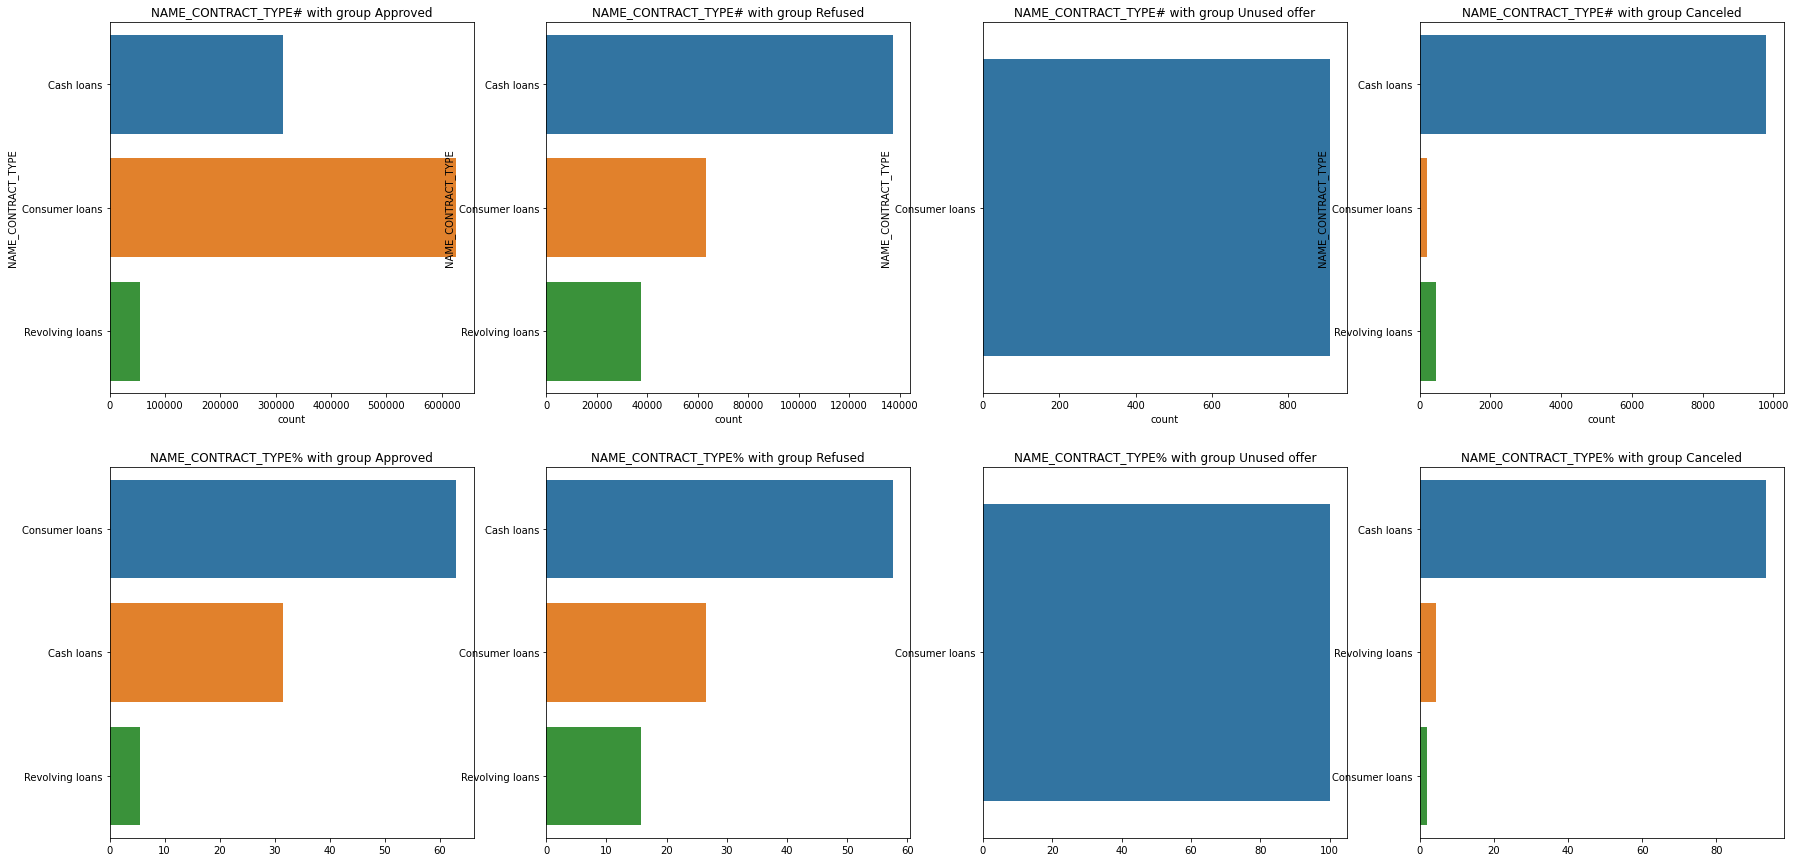

In [57]:
# Analysing NAME_CONTRACT_TYPE variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features_prev("NAME_CONTRACT_TYPE")
create_bargraph_for_comparison_prev_data("NAME_CONTRACT_TYPE",cl_prev_data_a,cl_prev_data_r,cl_prev_data_u,cl_prev_data_c)

- Client's with Cash Loans got most approvals.
- Client's with Revolving loans got cancelled most.

SUMMARY FOR : CODE_REJECT_REASON

Total Null Values : 0

Value Distribution
XAP       1003835
HC         141831
LIMIT       50046
SCO         34986
SCOFR        8171
VERIF        3347
CLIENT        909
SYSTEM         23
Name: CODE_REJECT_REASON, dtype: int64 

Distribution with NAME_CONTRACT_STATUS Variable
                      CODE_REJECT_REASON
NAME_CONTRACT_STATUS                    
Approved                          993352
Canceled                           10483
Refused                           238404
Unused offer                         909 

Distribution of attributes with NAME_CONTRACT_STATUS Variable


Approved#  Cancelled#  Refused#  Unused Offer#  Approved%  \
CODE_REJECT_REASON                                                              
CLIENT                      0           0         0            909       0.00   
HC                          0           0    141831              0       0.00   
LIMIT                       0           0     50046              0       0.00   
SCO                         0           0     34986              0       0.00   
SCOFR                       0           0      8171              0       0.00   
SYSTEM                      0           0        23              0       0.00   
VERIF                       0           0      3347              0       0.00   
XAP                    993352       10483         0              0      79.91   

                    Cancelled%  Refused%  Unused Offer%  
CODE_REJECT_REASON                                       
CLIENT                    0.00      0.00           0.07  
HC                        0.00     11.41           0.00  
LIMIT                     0.00      4.03           0.00  
SCO                       0.00      2.81           0.00  
SCOFR                     0.00      0.66           0.00  
SYSTEM                    0.00      0.00           0.00  
VERIF                     0.00      0.27           0.00  
XAP                       0.84      0.00           0.00

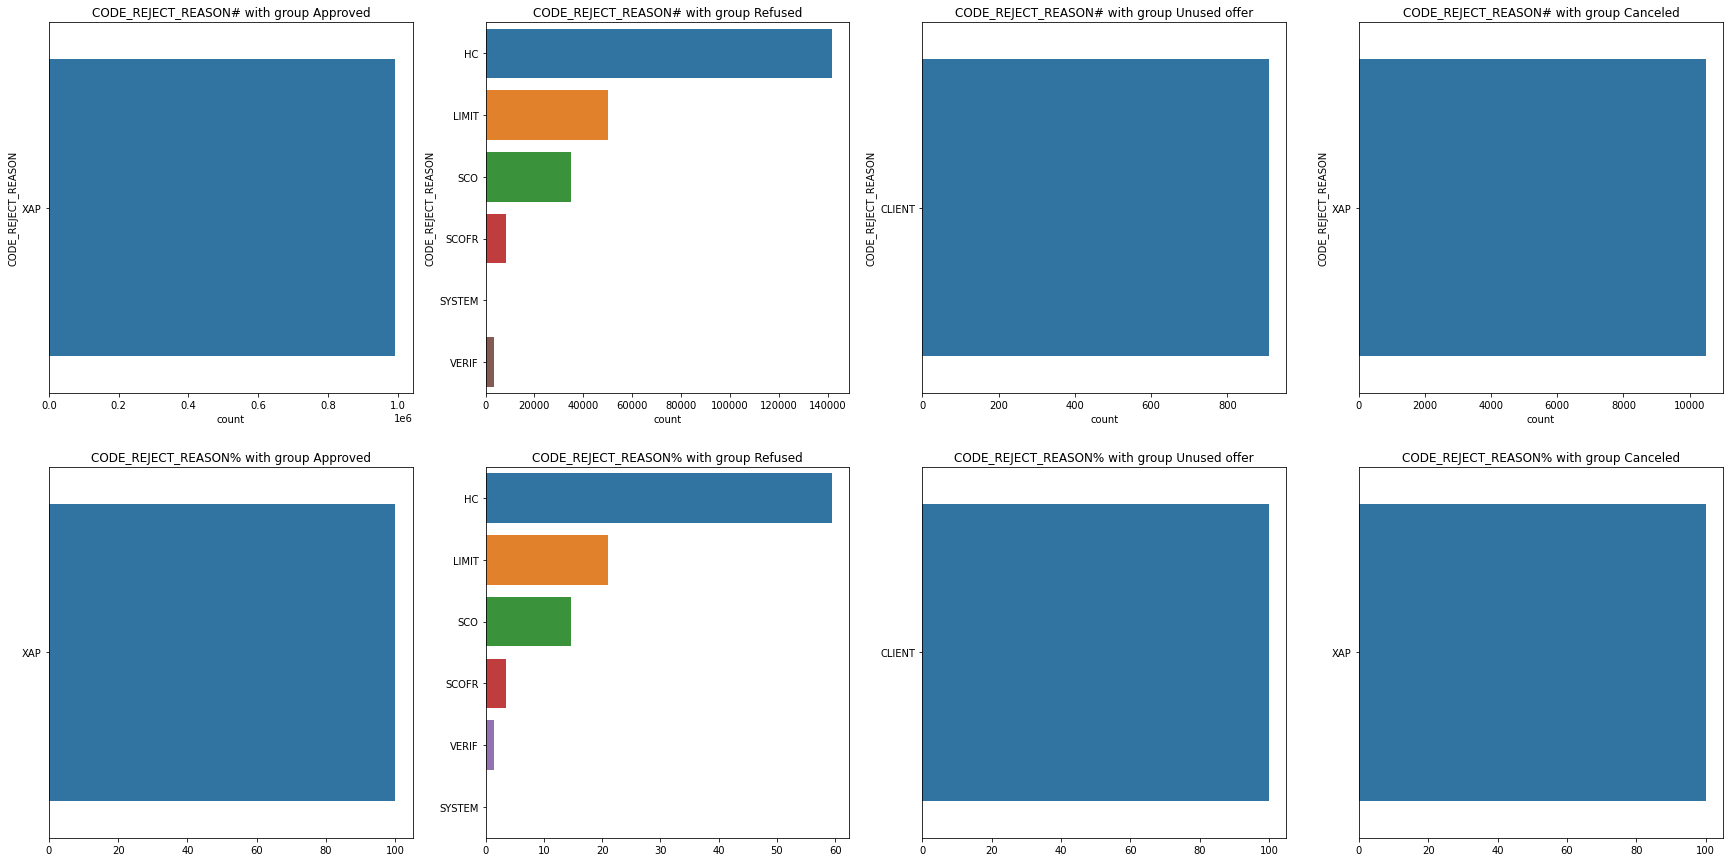

In [58]:
# Analysing CODE_REJECT_REASON variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features_prev("CODE_REJECT_REASON")
create_bargraph_for_comparison_prev_data("CODE_REJECT_REASON",cl_prev_data_a,cl_prev_data_r,cl_prev_data_u,cl_prev_data_c)

- Clients with XAP rejection reason got most approvals.

SUMMARY FOR : NAME_CLIENT_TYPE

Total Null Values : 0

Value Distribution
Repeater     841776
New          294458
Refreshed    106914
Name: NAME_CLIENT_TYPE, dtype: int64 

Distribution with NAME_CONTRACT_STATUS Variable
                      NAME_CLIENT_TYPE
NAME_CONTRACT_STATUS                  
Approved                        993352
Canceled                         10483
Refused                         238404
Unused offer                       909 

Distribution of attributes with NAME_CONTRACT_STATUS Variable


Approved#  Cancelled#  Refused#  Unused Offer#  Approved%  \
NAME_CLIENT_TYPE                                                              
New                  281148         199     13081             30      22.62   
Refreshed             93545         954     12313            102       7.52   
Repeater             618659        9330    213010            777      49.77   

                  Cancelled%  Refused%  Unused Offer%  
NAME_CLIENT_TYPE                                       
New                     0.02      1.05           0.00  
Refreshed               0.08      0.99           0.01  
Repeater                0.75     17.13           0.06

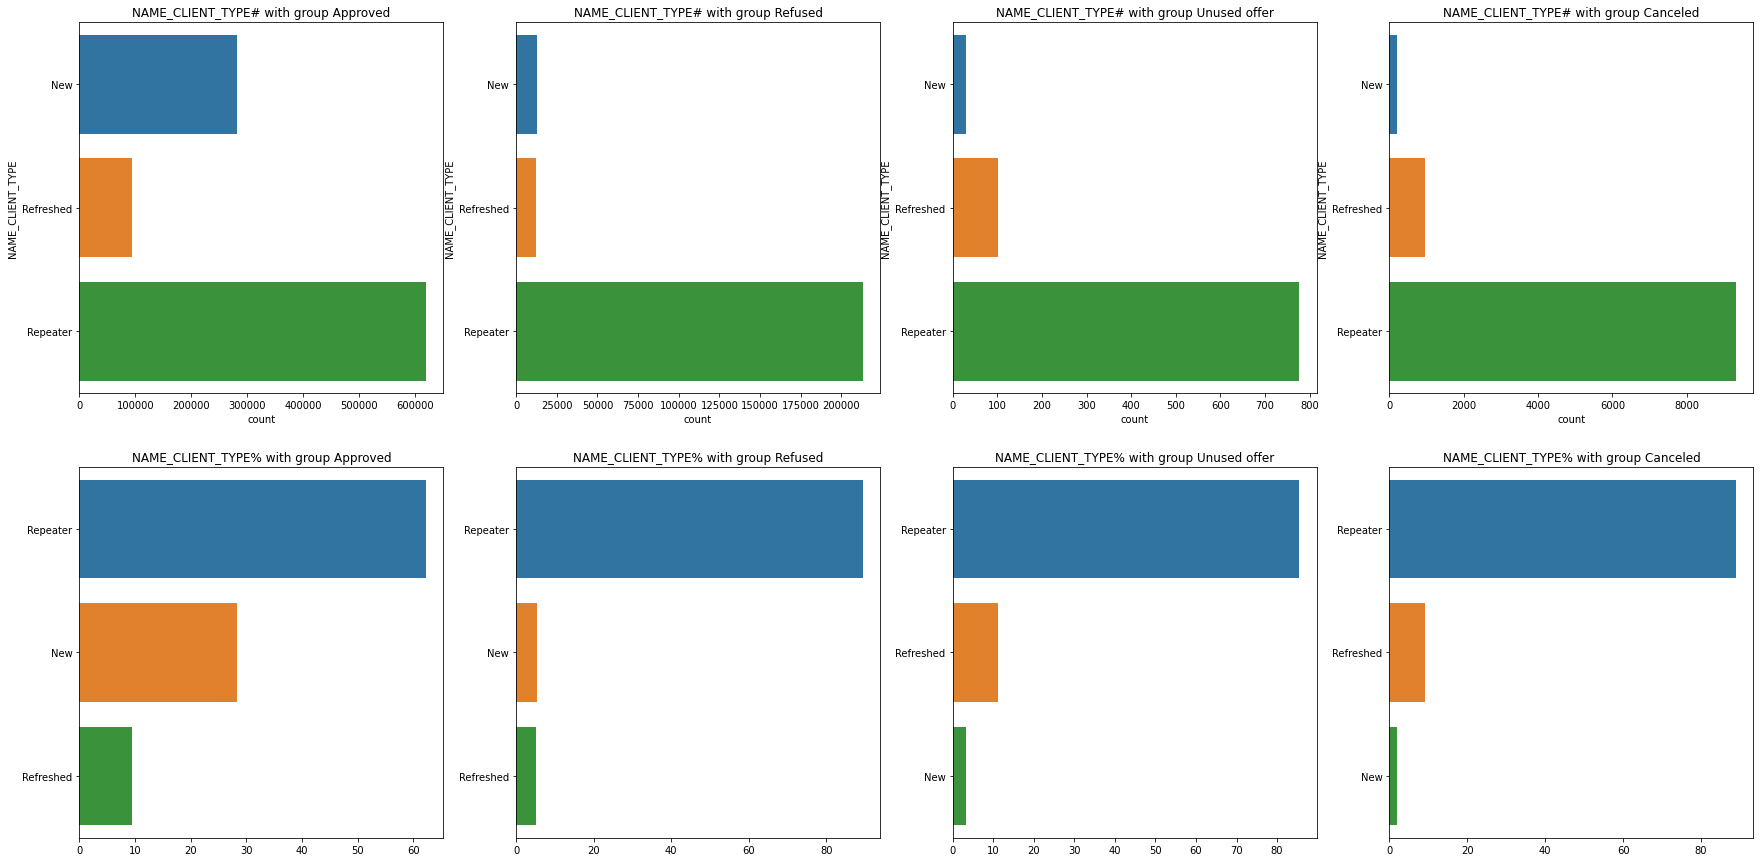

In [59]:
# Analysing NAME_CLIENT_TYPE variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features_prev("NAME_CLIENT_TYPE")
create_bargraph_for_comparison_prev_data("NAME_CLIENT_TYPE",cl_prev_data_a,cl_prev_data_r,cl_prev_data_u,cl_prev_data_c)

- Repeted clients got most approvals while new clients either got cancelled or refused.

SUMMARY FOR : CHANNEL_TYPE

Total Null Values : 0

Value Distribution
Country-wide                  447230
Credit and cash offices       394172
Stone                         207524
Regional / Local              105848
AP+ (Cash loan)                47331
Contact center                 34612
Channel of corporate sales      5979
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64 

Distribution with NAME_CONTRACT_STATUS Variable
                      CHANNEL_TYPE
NAME_CONTRACT_STATUS              
Approved                    993352
Canceled                     10483
Refused                     238404
Unused offer                   909 

Distribution of attributes with NAME_CONTRACT_STATUS Variable


Approved#  Cancelled#  Refused#  Unused Offer#  \
CHANNEL_TYPE                                                                 
AP+ (Cash loan)                 28120         120     19091              0   
Car dealer                        286          44       122              0   
Channel of corporate sales       2623          38      3318              0   
Contact center                  15731        7655     11226              0   
Country-wide                   393817         278     52226            909   
Credit and cash offices        270549        2293    121330              0   
Regional / Local                95285          18     10545              0   
Stone                          186941          37     20546              0   

                            Approved%  Cancelled%  Refused%  Unused Offer%  
CHANNEL_TYPE                                                                
AP+ (Cash loan)                  2.26        0.01      1.54           0.00  
Car dealer                       0.02        0.00      0.01           0.00  
Channel of corporate sales       0.21        0.00      0.27           0.00  
Contact center                   1.27        0.62      0.90           0.00  
Country-wide                    31.68        0.02      4.20           0.07  
Credit and cash offices         21.76        0.18      9.76           0.00  
Regional / Local                 7.66        0.00      0.85           0.00  
Stone                           15.04        0.00      1.65           0.00

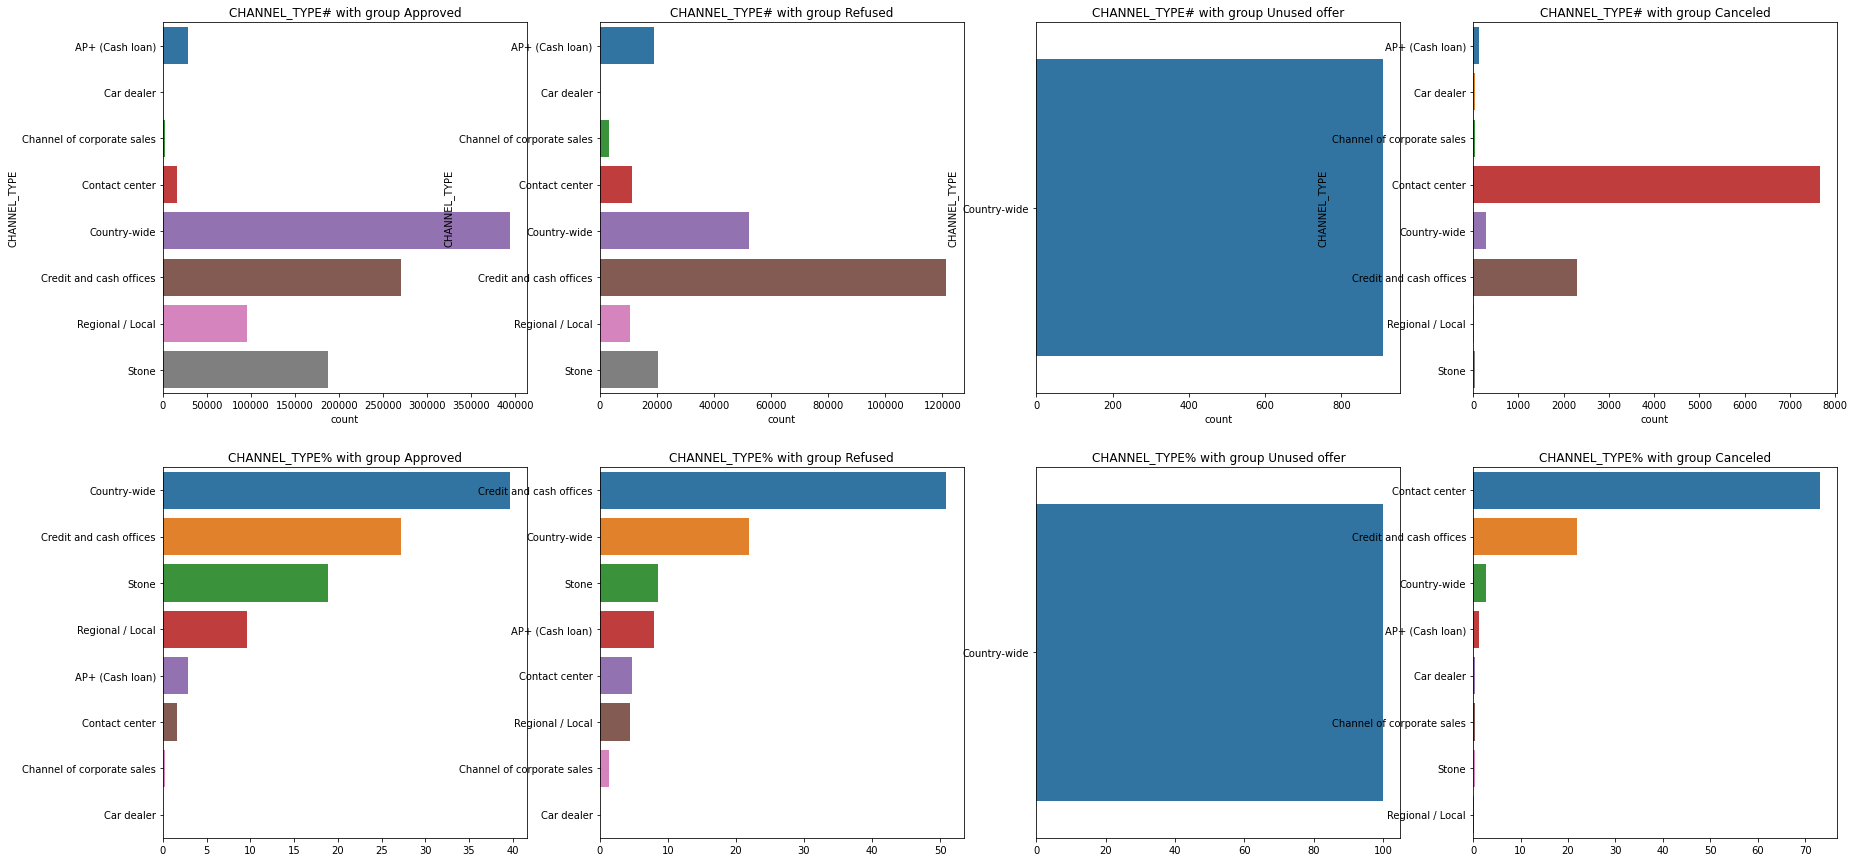

In [60]:
# Analysing CHANNEL_TYPE variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features_prev("CHANNEL_TYPE")
create_bargraph_for_comparison_prev_data("CHANNEL_TYPE",cl_prev_data_a,cl_prev_data_r,cl_prev_data_u,cl_prev_data_c)

- Country wise and Credit and cash offices got most approvals and refusals.

SUMMARY FOR : CNT_PAYMENT

Total Null Values : 92930

Value Distribution
M     497922
H     231568
L     222227
VH    198501
Name: CNT_PAYMENT, dtype: int64 

Distribution with NAME_CONTRACT_STATUS Variable
                      CNT_PAYMENT
NAME_CONTRACT_STATUS             
Approved                   938447
Canceled                    10021
Refused                    200841
Unused offer                  909 

Distribution of attributes with NAME_CONTRACT_STATUS Variable


Approved#  Cancelled#  Refused#  Unused Offer#  Approved%  \
CNT_PAYMENT                                                              
H               184160        1919     45478             11      14.81   
L               203039         220     18899             69      16.33   
M               442919        1114     53060            829      35.63   
VH              108329        6768     83404              0       8.71   

             Cancelled%  Refused%  Unused Offer%  
CNT_PAYMENT                                       
H                  0.15      3.66           0.00  
L                  0.02      1.52           0.01  
M                  0.09      4.27           0.07  
VH                 0.54      6.71           0.00

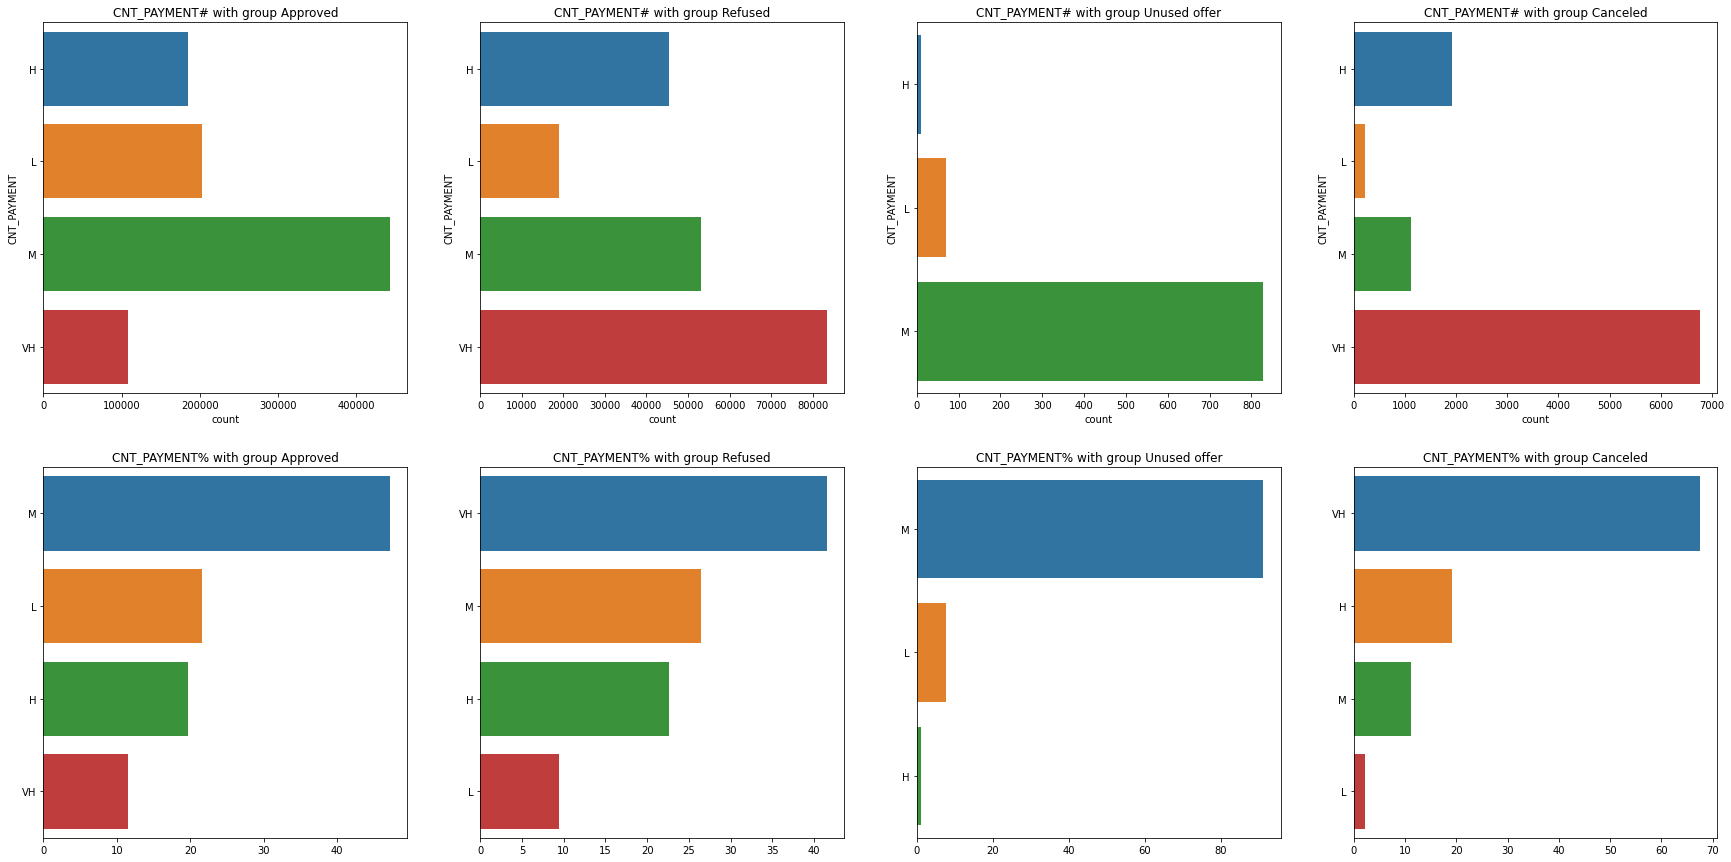

In [61]:
# Analysing CNT_PAYMENT variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features_prev("CNT_PAYMENT")
create_bargraph_for_comparison_prev_data("CNT_PAYMENT",cl_prev_data_a,cl_prev_data_r,cl_prev_data_u,cl_prev_data_c)

- Clients with Medium payment counts got most approvals
- while Clients with payments on the higher side got most refuses.

SUMMARY FOR : PRODUCT_COMBINATION

Total Null Values : 0

Value Distribution
POS household with interest       257641
POS mobile with interest          190305
Cash X-Sell: middle               143593
Cash X-Sell: low                  129491
POS industry with interest         98051
POS household without interest     82819
Cash Street: high                  59468
Cash X-Sell: high                  59252
Card Street                        51367
Card X-Sell                        41563
Cash Street: middle                34414
Cash Street: low                   33358
POS mobile without interest        23965
POS other with interest            22725
POS industry without interest      12587
POS others without interest         2549
Name: PRODUCT_COMBINATION, dtype: int64 

Distribution with NAME_CONTRACT_STATUS Variable
                      PRODUCT_COMBINATION
NAME_CONTRACT_STATUS                     
Approved                           993352
Canceled                            10483
Refused  

Approved#  Cancelled#  Refused#  \
PRODUCT_COMBINATION                                               
Card Street                         28279         320     22768   
Card X-Sell                         26626         142     14795   
Cash Street: high                   38902         155     20411   
Cash Street: low                     9517        1081     22760   
Cash Street: middle                 17601         633     16180   
Cash X-Sell: high                   46514         751     11987   
Cash X-Sell: low                    83673        4622     41196   
Cash X-Sell: middle                116202        2561     24830   
POS household with interest        233182          65     24394   
POS household without interest      72873          12      9934   
POS industry with interest          89408          56      8587   
POS industry without interest       11414           1      1172   
POS mobile with interest           174340          74     15635   
POS mobile without interest         21867           6      1439   
POS other with interest             20630           4      2091   
POS others without interest          2324           0       225   

                                Unused Offer#  Approved%  Cancelled%  \
PRODUCT_COMBINATION                                                    
Card Street                                 0       2.27        0.03   
Card X-Sell                                 0       2.14        0.01   
Cash Street: high                           0       3.13        0.01   
Cash Street: low                            0       0.77        0.09   
Cash Street: middle                         0       1.42        0.05   
Cash X-Sell: high                           0       3.74        0.06   
Cash X-Sell: low                            0       6.73        0.37   
Cash X-Sell: middle                         0       9.35        0.21   
POS household with interest                 0      18.76        0.01   
POS household without interest              0       5.86        0.00   
POS industry with interest                  0       7.19        0.00   
POS industry without interest               0       0.92        0.00   
POS mobile with interest                  256      14.02        0.01   
POS mobile without interest               653       1.76        0.00   
POS other with interest                     0       1.66        0.00   
POS others without interest                 0       0.19        0.00   

                                Refused%  Unused Offer%  
PRODUCT_COMBINATION                                      
Card Street                         1.83           0.00  
Card X-Sell                         1.19           0.00  
Cash Street: high                   1.64           0.00  
Cash Street: low                    1.83           0.00  
Cash Street: middle                 1.30           0.00  
Cash X-Sell: high                   0.96           0.00  
Cash X-Sell: low                    3.31           0.00  
Cash X-Sell: middle                 2.00           0.00  
POS household with interest         1.96           0.00  
POS household without interest      0.80           0.00  
POS industry with interest          0.69           0.00  
POS industry without interest       0.09           0.00  
POS mobile with interest            1.26           0.02  
POS mobile without interest         0.12           0.05  
POS other with interest             0.17           0.00  
POS others without interest         0.02           0.00

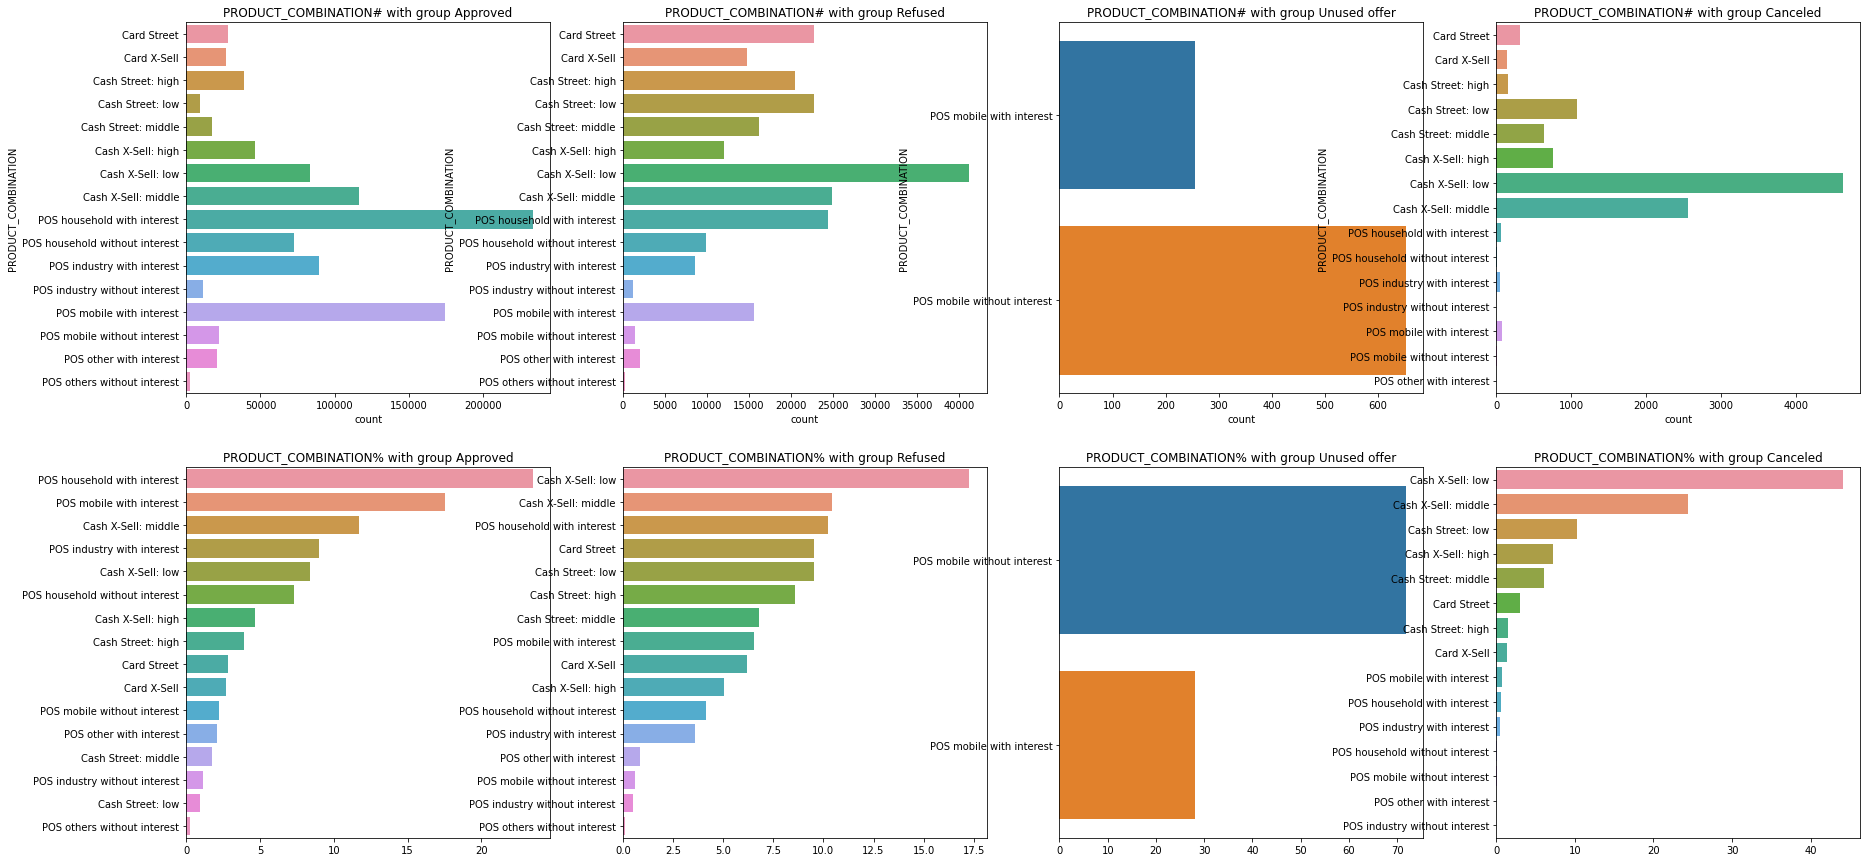

In [62]:
# Analysing PRODUCT_COMBINATION variable
# Since this feature is of Object type we will be using bar graphs to analyse

short_summary_for_categorical_features_prev("PRODUCT_COMBINATION")
create_bargraph_for_comparison_prev_data("PRODUCT_COMBINATION",cl_prev_data_a,cl_prev_data_r,cl_prev_data_u,cl_prev_data_c)

- POS household with interest and POS mobile with interest got most approvals.
- Cash X-Sell: low and Cash X-Sell: medium got most refusals.

SUMMARY FOR : AMT_ANNUITY

Total Values : 1243148
Total Values with Approved : 993352
Total Values with Refused : 238404
Total Values with Unused Offer : 909
Total Values with Cancelled : 10483
Total Null Values : 0

Numerical Description :
count    1.243148e+06
mean     1.604313e+04
std      1.492293e+04
min      0.000000e+00
25%      6.322500e+03
50%      1.125000e+04
75%      2.056815e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64 



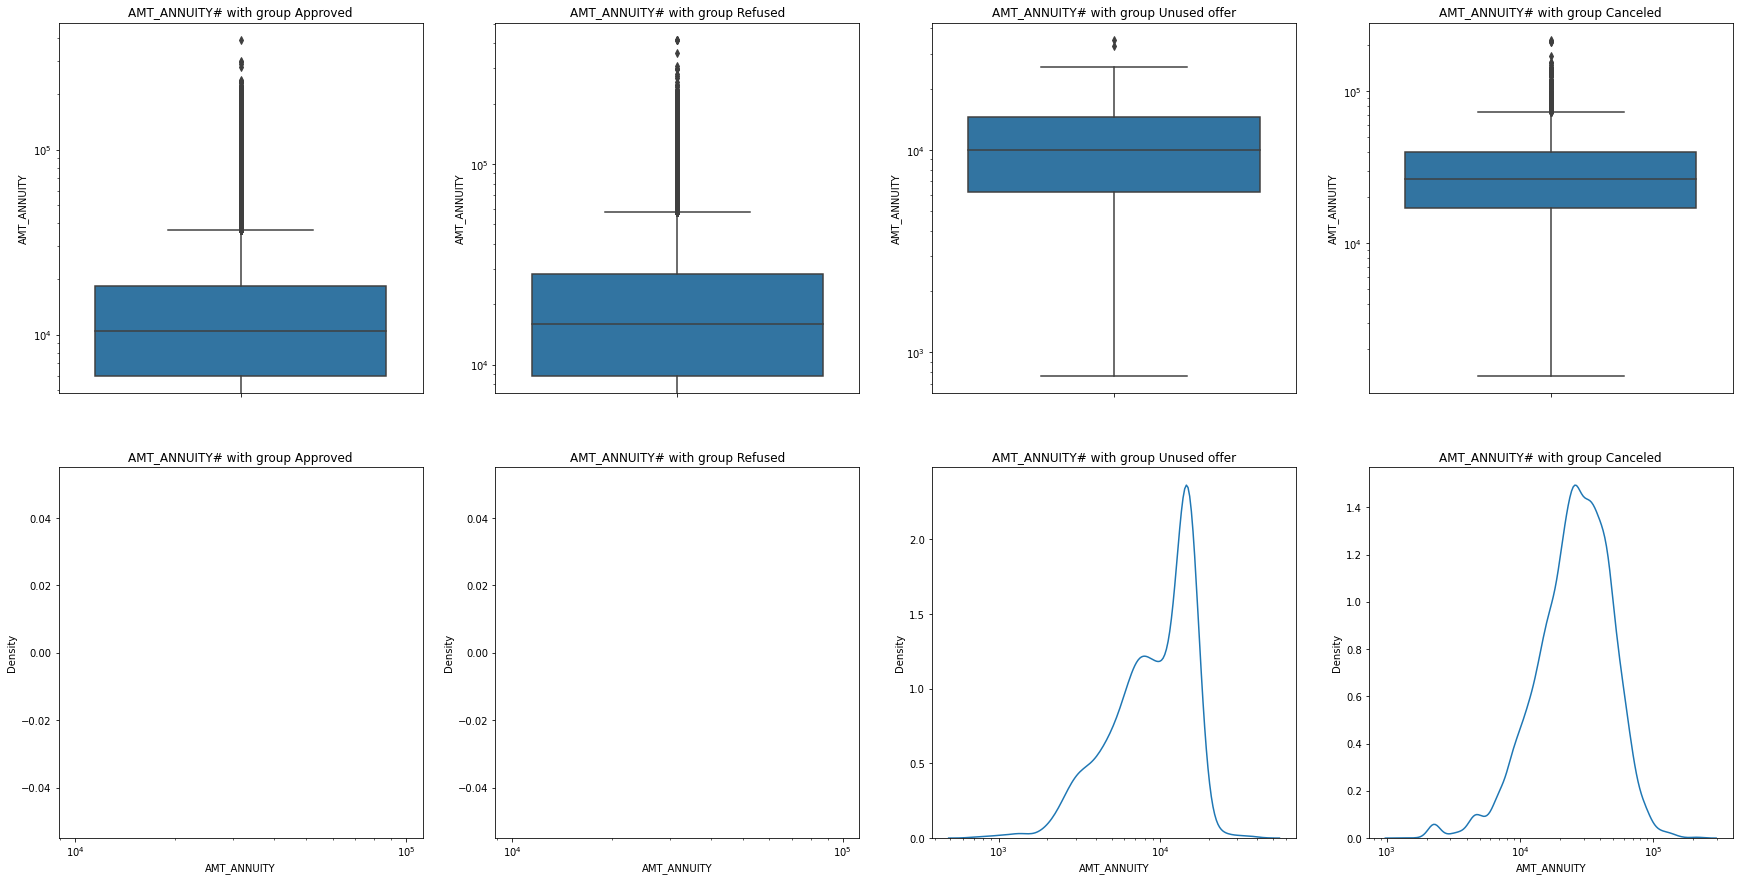

In [63]:
# Analysing AMT_ANNUITY variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features_prev("AMT_ANNUITY")
creating_boxplot_for_comparison_prev_data("AMT_ANNUITY",cl_prev_data_a,cl_prev_data_r,cl_prev_data_u,
                                          cl_prev_data_c, True)

- There are no missing values but there are outliers which can be treated using binning method.
- Unused and Cancelled trend for this features appers to show similar trend.

SUMMARY FOR : AMT_APPLICATION

Total Values : 1243148
Total Values with Approved : 993352
Total Values with Refused : 238404
Total Values with Unused Offer : 909
Total Values with Cancelled : 10483
Total Null Values : 0

Numerical Description :
count    1.243148e+06
mean     2.319849e+05
std      3.180367e+05
min      0.000000e+00
25%      5.215500e+04
50%      1.125000e+05
75%      2.475000e+05
max      5.850000e+06
Name: AMT_APPLICATION, dtype: float64 



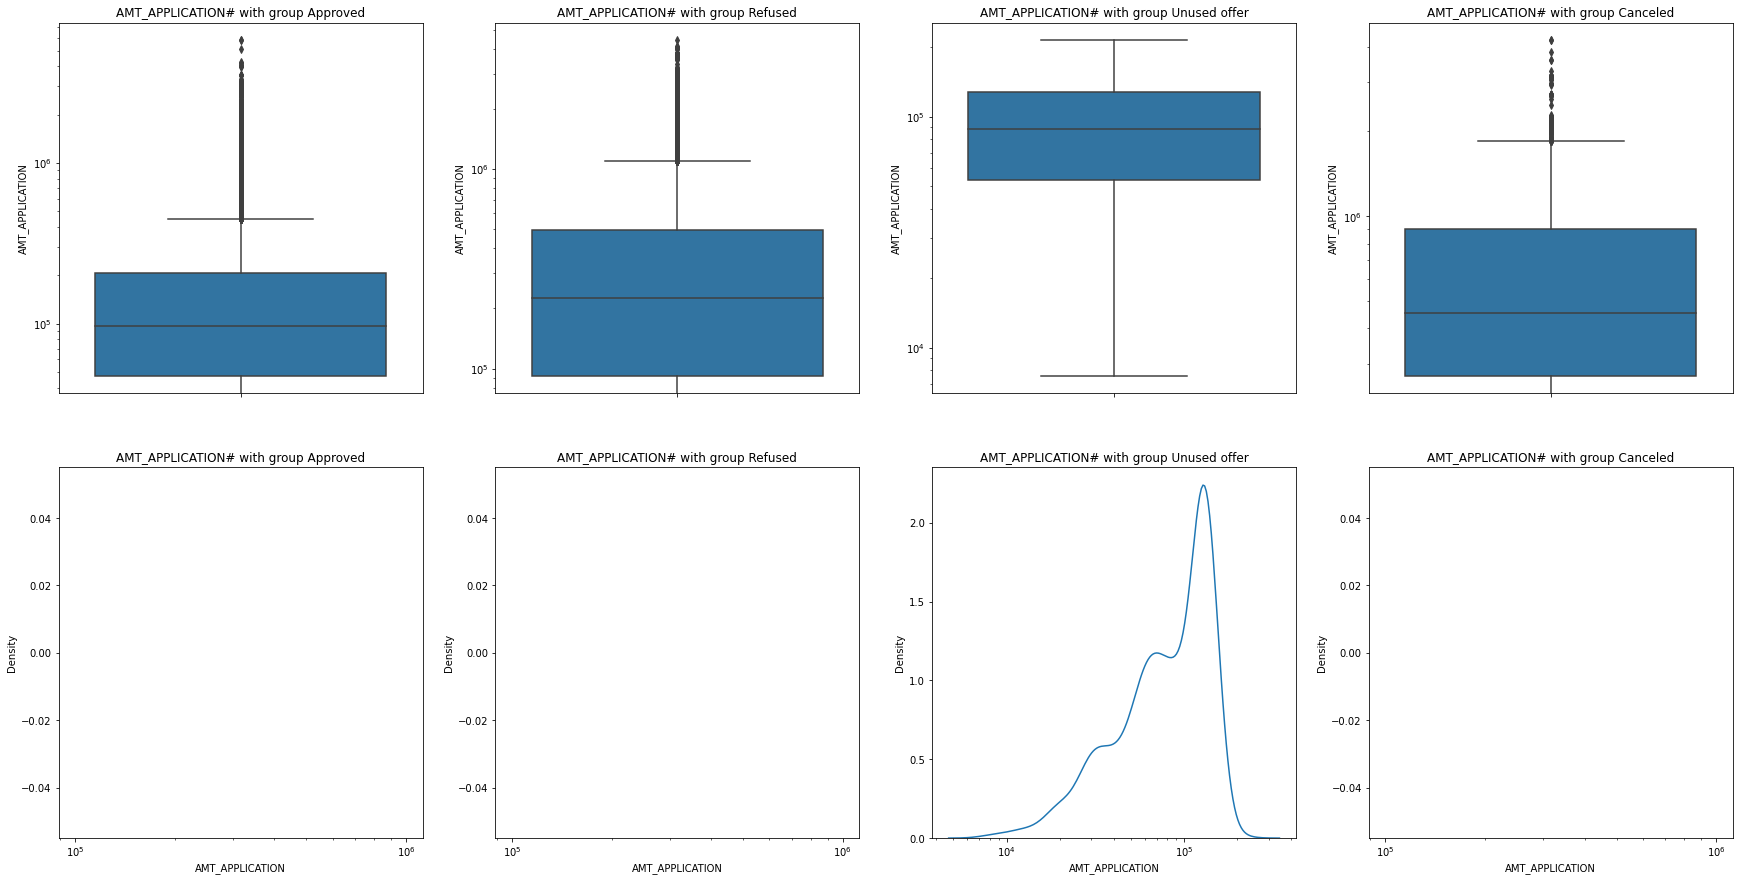

In [64]:
# Analysing AMT_APPLICATION variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features_prev("AMT_APPLICATION")
creating_boxplot_for_comparison_prev_data("AMT_APPLICATION",cl_prev_data_a,cl_prev_data_r,cl_prev_data_u,
                                          cl_prev_data_c, True)

- There are no missing values but there are outliers which can be treated using binning method.
- Some features are not able to display trend because of the outleirs are large dataset.

SUMMARY FOR : AMT_CREDIT

Total Values : 1243148
Total Values with Approved : 993352
Total Values with Refused : 238404
Total Values with Unused Offer : 909
Total Values with Cancelled : 10483
Total Null Values : 0

Numerical Description :
count    1.243148e+06
mean     2.485907e+05
std      3.458627e+05
min      0.000000e+00
25%      5.146965e+04
50%      1.158930e+05
75%      2.700000e+05
max      4.509688e+06
Name: AMT_CREDIT, dtype: float64 



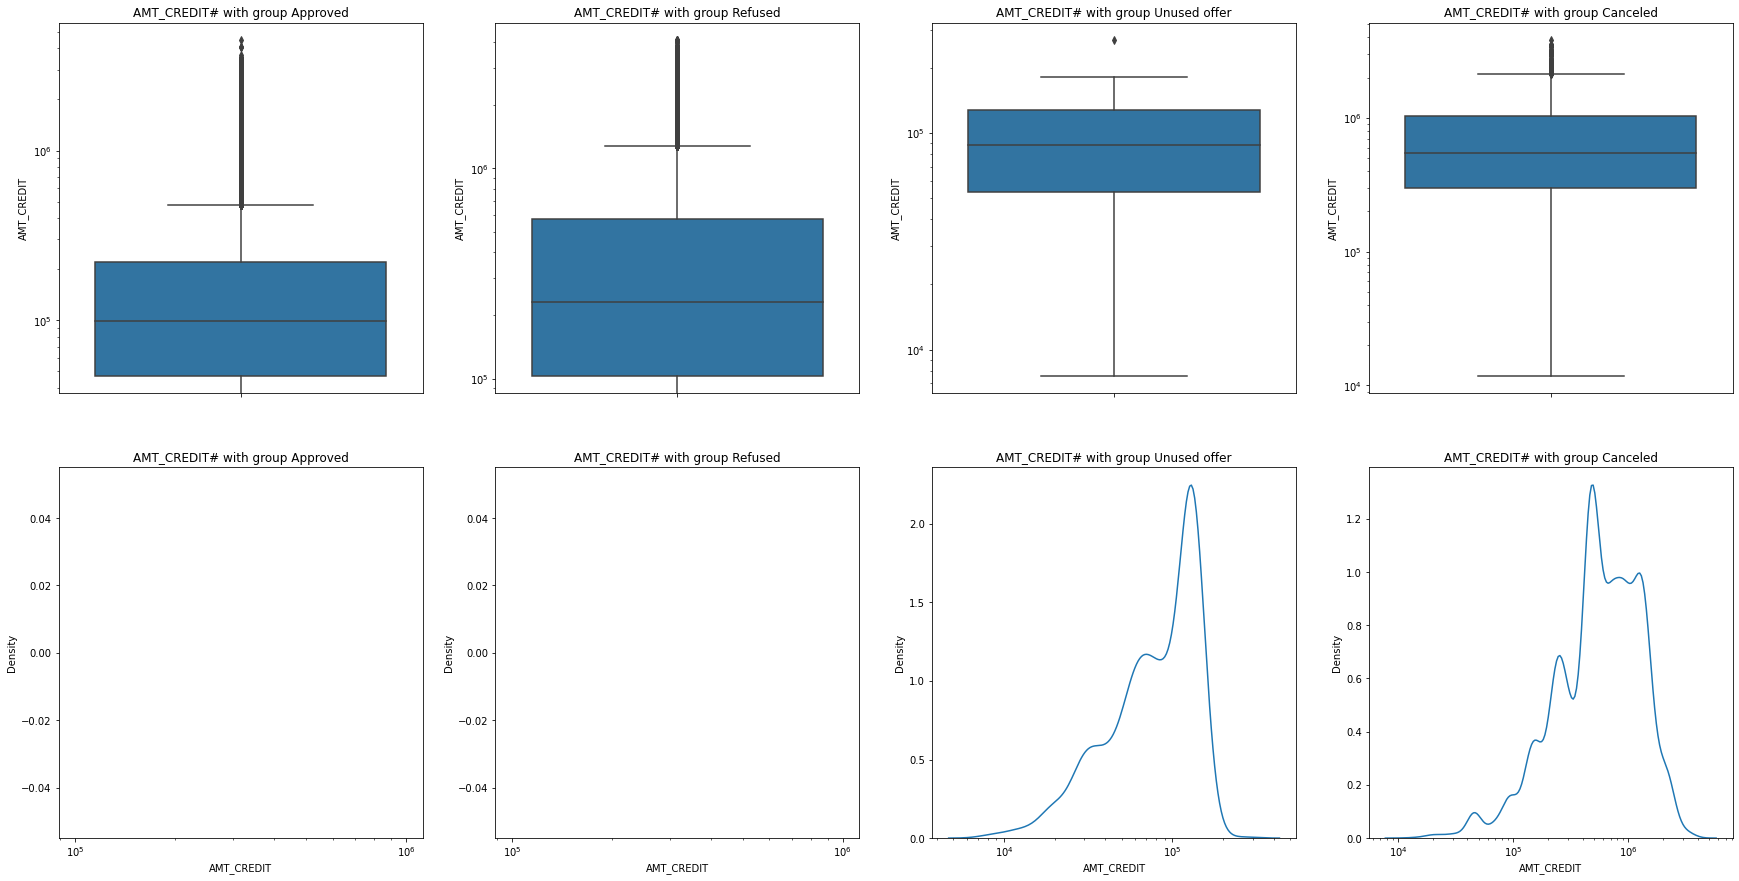

In [65]:
# Analysing AMT_CREDIT variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features_prev("AMT_CREDIT")
creating_boxplot_for_comparison_prev_data("AMT_CREDIT",cl_prev_data_a,cl_prev_data_r,cl_prev_data_u,
                                          cl_prev_data_c, True)

- There are no missing values but there are outliers which can be treated using binning method.
- Unused and Cancelled trend for this features appers to show similar trend.

SUMMARY FOR : AMT_GOODS_PRICE

Total Values : 1243148
Total Values with Approved : 993352
Total Values with Refused : 238404
Total Values with Unused Offer : 909
Total Values with Cancelled : 10483
Total Null Values : 0

Numerical Description :
count    1.243148e+06
mean     2.320152e+05
std      3.180552e+05
min      0.000000e+00
25%      5.215500e+04
50%      1.125000e+05
75%      2.475000e+05
max      5.850000e+06
Name: AMT_GOODS_PRICE, dtype: float64 



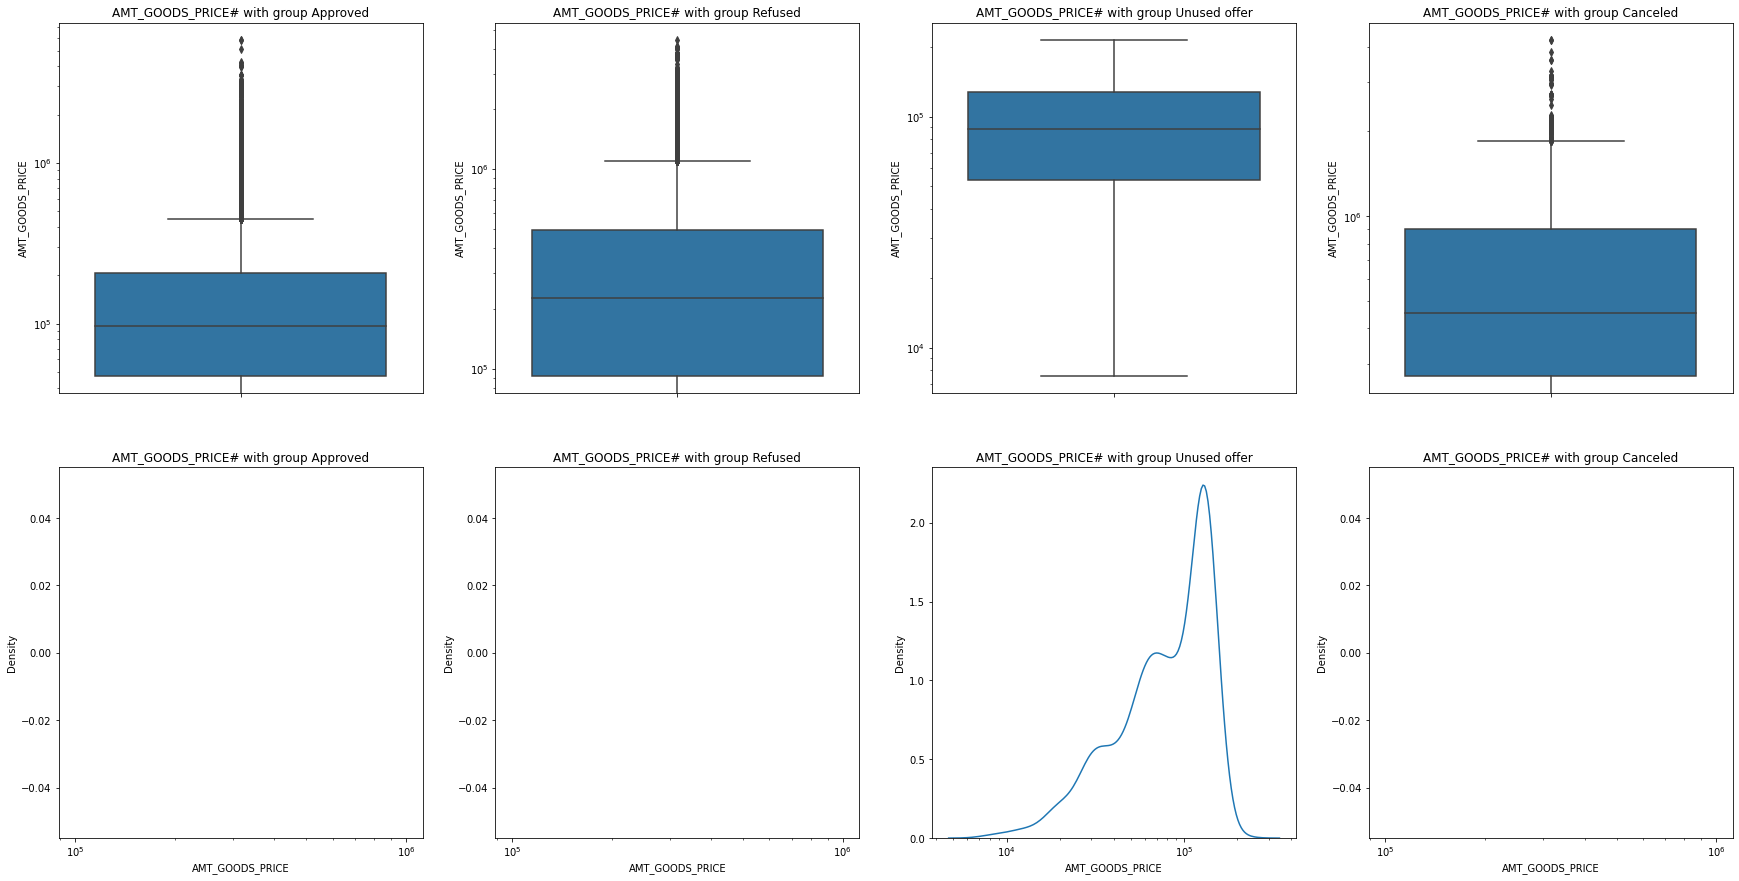

In [66]:
# Analysing AMT_GOODS_PRICE variable
# Since this feature is of Float type we will be using box plots to analyse

short_summary_for_numerical_features_prev("AMT_GOODS_PRICE")
creating_boxplot_for_comparison_prev_data("AMT_GOODS_PRICE",cl_prev_data_a,cl_prev_data_r,cl_prev_data_u,
                                          cl_prev_data_c, True)

- There are no missing values but there are outliers which can be treated using binning method.
- Some features are not able to display trend because of the outleirs are large dataset.

#### BIVARIATE ANALYSIS FOR APPLICATION DATA

Now that we are done withe univariate analysis part, now let's to analysis using multiple features at a time.

##### FOR NUMERICAL-NUMERICAL DATA

In [67]:
# Function to create heatmap in comparison mode
def create_heatmap_for_comparison(df1, df2, title1="0", title2="1"):
    corr1 = df1.corr()
    corr2 = df2.corr()
    plt.figure(figsize=(30, 15))
    # Subplot-1
    plt.subplot(1,2,1)
    plt.title("Correlation Map for Group {}".format(title1), {"fontsize":18}, pad=20)
    sns.heatmap(corr1, cmap="RdYlGn")
    # Subplot-2
    plt.subplot(1,2,2)
    plt.title("Correlation Map for Group {}".format(title2), {"fontsize":18}, pad=20)
    sns.heatmap(corr2, cmap="RdYlGn")
    

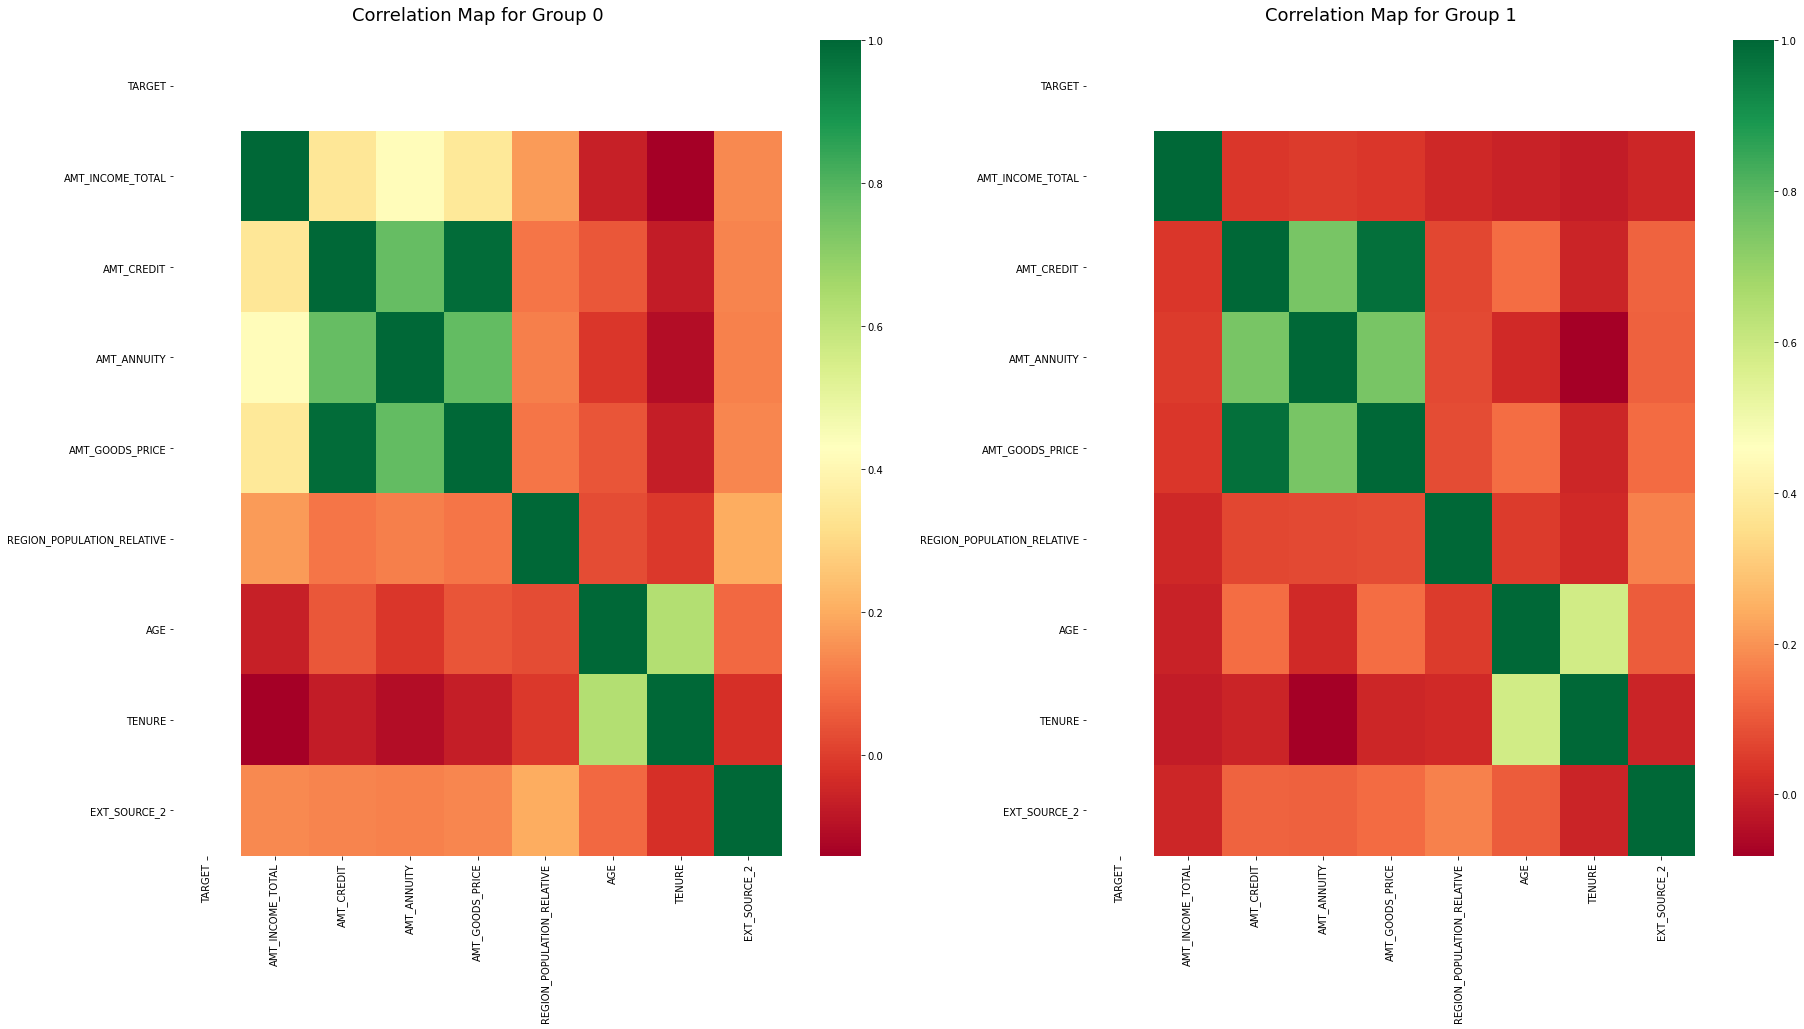

In [68]:
# Correlation Heatmap Comparison

create_heatmap_for_comparison(cl_curr_data_0, cl_curr_data_1)

For GROUP 0
- AMT_ANNUITY, AMT_GOODS_PRICE shows positive linear correaltion with AMT_CREDIT.
- AGE and TENURE shows positive correlation with each other.
- AGE and TENURE shows highly linear negative cortrelation with AMT_INCOME_TOTAL.
- Also TENURE shows highly negative linear correlatio with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE and EXT_SOURCE_2

For GROUP 1
- AMT_ANNUITY, AMT_GOODS_PRICE shows positive linear correaltion with AMT_CREDIT.
- AGE and TENURE shows positive correlation with each other.
- AGE and TENURE shows highly linear negative cortrelation with AMT_INCOME_TOTAL.
- Also TENURE shows highly negative linear correlatio with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE and EXT_SOURCE_2
- AMT_INCOME_TOTAL shows high negative linear correlation with every other feature in the data.

##### FOR NUMERICAL-CATEGORICAL DATA

In [69]:
# creating function to generate combinations of numeric and categorical features.
def create_feature_combinations_for_boxplot(num_cols, non_num_cols):
    comb_list = [(x,y) for x in num_cols for y in non_num_cols]
    return comb_list

# In our dataset these are the only continuous variables which needs to be combined with other categorical variables.
num_cols = cl_curr_data.select_dtypes(include="number").columns
non_num_cols = cl_curr_data.select_dtypes(include="object").columns
num_cat_com = create_feature_combinations_for_boxplot(num_cols, [x for x in non_num_cols if x!="ORGANIZATION_TYPE"])

# This is what the combinations look like
# These combinations are to avoid redundancy in analysis
num_cat_com

[('TARGET', 'NAME_CONTRACT_TYPE'),
 ('TARGET', 'CODE_GENDER'),
 ('TARGET', 'FLAG_OWN_CAR'),
 ('TARGET', 'FLAG_OWN_REALTY'),
 ('TARGET', 'CNT_CHILDREN'),
 ('TARGET', 'NAME_TYPE_SUITE'),
 ('TARGET', 'NAME_INCOME_TYPE'),
 ('TARGET', 'NAME_EDUCATION_TYPE'),
 ('TARGET', 'NAME_FAMILY_STATUS'),
 ('TARGET', 'NAME_HOUSING_TYPE'),
 ('TARGET', 'OCCUPATION_TYPE'),
 ('TARGET', 'CNT_FAM_MEMBERS'),
 ('TARGET', 'REGION_RATING_CLIENT'),
 ('AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE'),
 ('AMT_INCOME_TOTAL', 'CODE_GENDER'),
 ('AMT_INCOME_TOTAL', 'FLAG_OWN_CAR'),
 ('AMT_INCOME_TOTAL', 'FLAG_OWN_REALTY'),
 ('AMT_INCOME_TOTAL', 'CNT_CHILDREN'),
 ('AMT_INCOME_TOTAL', 'NAME_TYPE_SUITE'),
 ('AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE'),
 ('AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE'),
 ('AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS'),
 ('AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE'),
 ('AMT_INCOME_TOTAL', 'OCCUPATION_TYPE'),
 ('AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS'),
 ('AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT'),
 ('AMT_CREDIT', 'NAME_

In [70]:
def create_box_plots(x, y, log_scale, data, hue, ax=None):
    if log_scale:
        plt.yscale("log")
    plt.xticks(rotation = 90)
    sns.boxplot(x, y, hue, data, ax=ax)
    

def generate_box_plots_for_combination(combinations, figsize=(15, 100), log_scale=False, data=cl_curr_data, hue="TARGET"):
    plt.figure(figsize=figsize)
    for idx, comb in enumerate(combinations):
        ax = plt.subplot(len(combinations), 1, idx+1)
        print(comb)
        create_box_plots(comb[1], comb[0], log_scale, data, hue, ax)

('AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE')
('AMT_INCOME_TOTAL', 'CODE_GENDER')
('AMT_INCOME_TOTAL', 'FLAG_OWN_CAR')
('AMT_INCOME_TOTAL', 'FLAG_OWN_REALTY')
('AMT_INCOME_TOTAL', 'CNT_CHILDREN')
('AMT_INCOME_TOTAL', 'NAME_TYPE_SUITE')
('AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE')
('AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE')
('AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS')
('AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE')
('AMT_INCOME_TOTAL', 'OCCUPATION_TYPE')
('AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS')
('AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT')


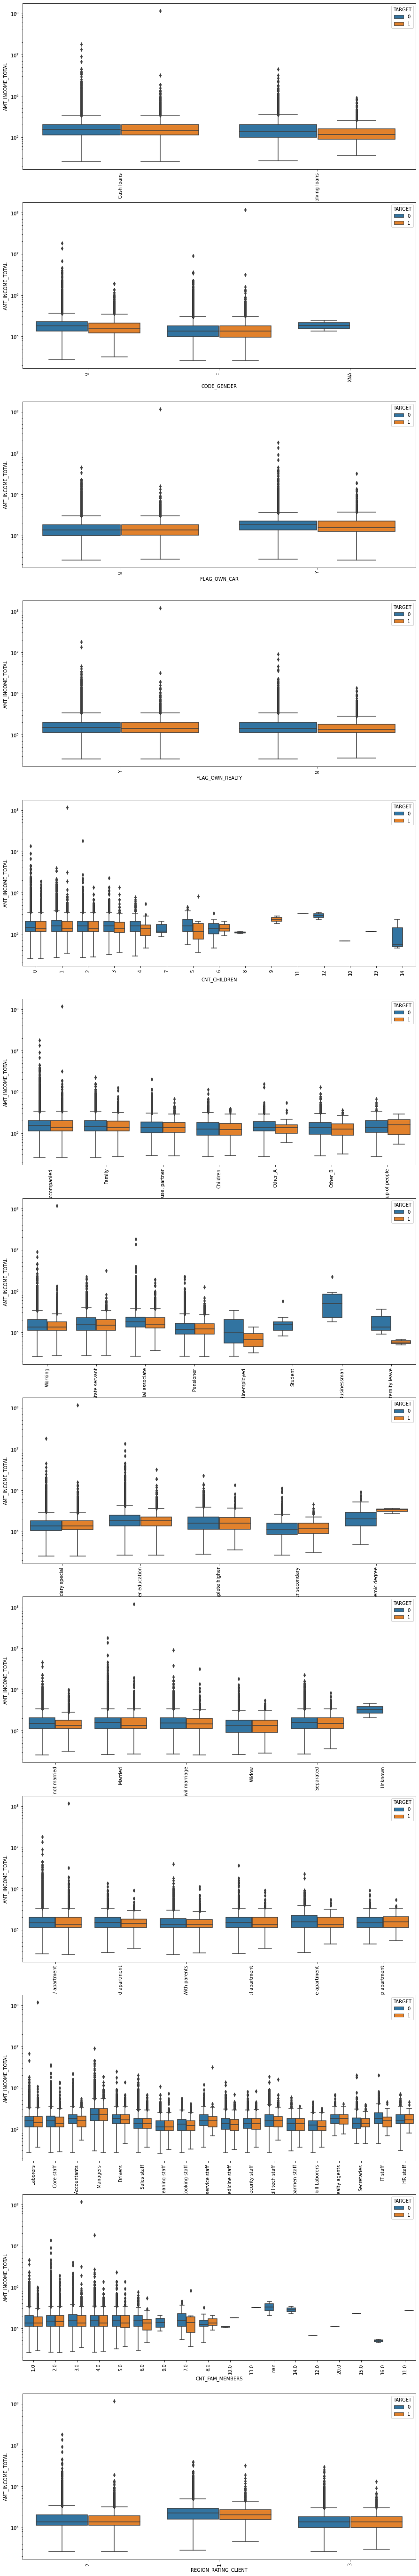

In [71]:
# Generating box plots for all the combination with AMT_INCOME_TOTAL.

generate_box_plots_for_combination([x for x in num_cat_com if x[0]=="AMT_INCOME_TOTAL"], log_scale=True)

- Both the categories of out target variable shows similar characterstics for the combination of AMT_INCOME_TOTAL with other categorical features, hence we can't justify any statemnet regarding the target variable.

('AMT_CREDIT', 'NAME_CONTRACT_TYPE')
('AMT_CREDIT', 'CODE_GENDER')
('AMT_CREDIT', 'FLAG_OWN_CAR')
('AMT_CREDIT', 'FLAG_OWN_REALTY')
('AMT_CREDIT', 'CNT_CHILDREN')
('AMT_CREDIT', 'NAME_TYPE_SUITE')
('AMT_CREDIT', 'NAME_INCOME_TYPE')
('AMT_CREDIT', 'NAME_EDUCATION_TYPE')
('AMT_CREDIT', 'NAME_FAMILY_STATUS')
('AMT_CREDIT', 'NAME_HOUSING_TYPE')
('AMT_CREDIT', 'OCCUPATION_TYPE')
('AMT_CREDIT', 'CNT_FAM_MEMBERS')
('AMT_CREDIT', 'REGION_RATING_CLIENT')


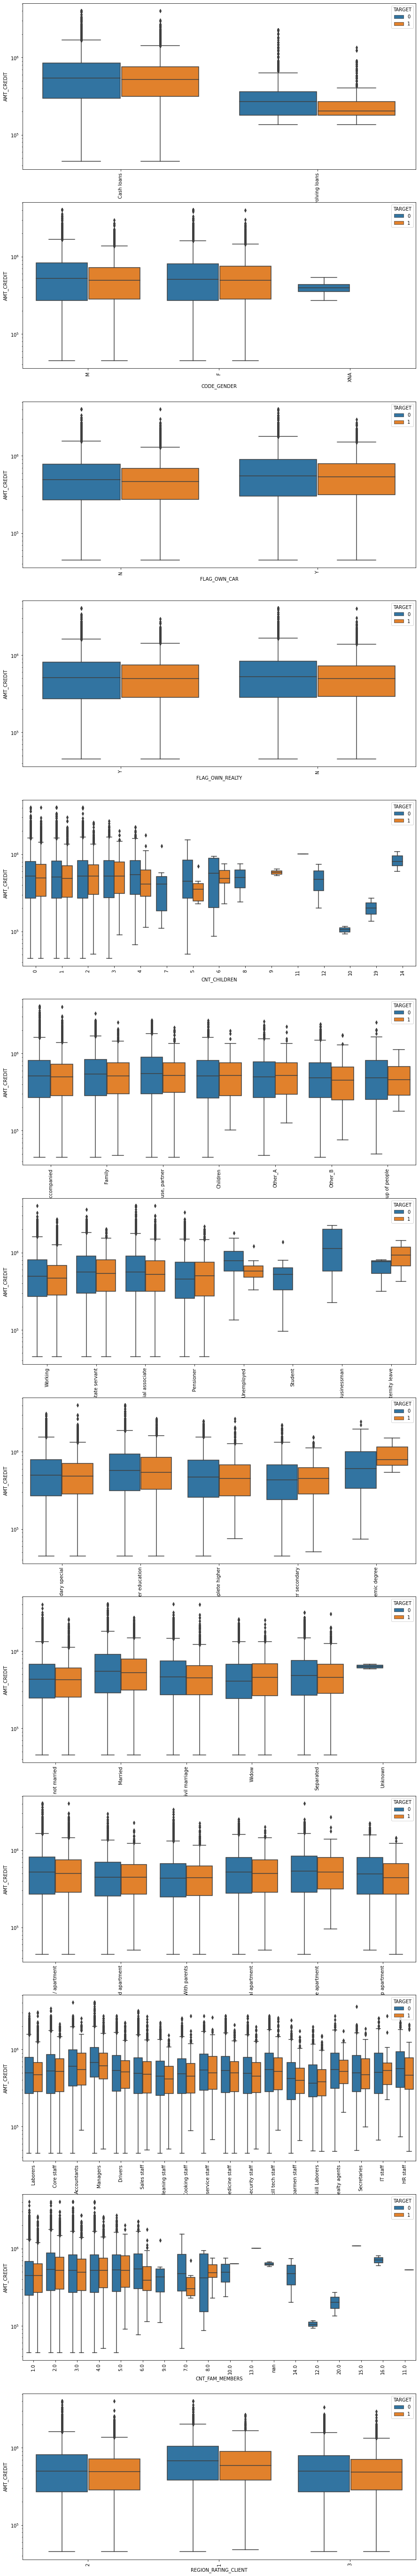

In [72]:
# Generating box plots for all the combination with AMT_CREDIT.

generate_box_plots_for_combination([x for x in num_cat_com if x[0]=="AMT_CREDIT"], log_scale=True)

- Client's on meternity leave are found to more deafult in accordance with AMT_CREDIT

('AMT_ANNUITY', 'NAME_CONTRACT_TYPE')
('AMT_ANNUITY', 'CODE_GENDER')
('AMT_ANNUITY', 'FLAG_OWN_CAR')
('AMT_ANNUITY', 'FLAG_OWN_REALTY')
('AMT_ANNUITY', 'CNT_CHILDREN')
('AMT_ANNUITY', 'NAME_TYPE_SUITE')
('AMT_ANNUITY', 'NAME_INCOME_TYPE')
('AMT_ANNUITY', 'NAME_EDUCATION_TYPE')
('AMT_ANNUITY', 'NAME_FAMILY_STATUS')
('AMT_ANNUITY', 'NAME_HOUSING_TYPE')
('AMT_ANNUITY', 'OCCUPATION_TYPE')
('AMT_ANNUITY', 'CNT_FAM_MEMBERS')
('AMT_ANNUITY', 'REGION_RATING_CLIENT')


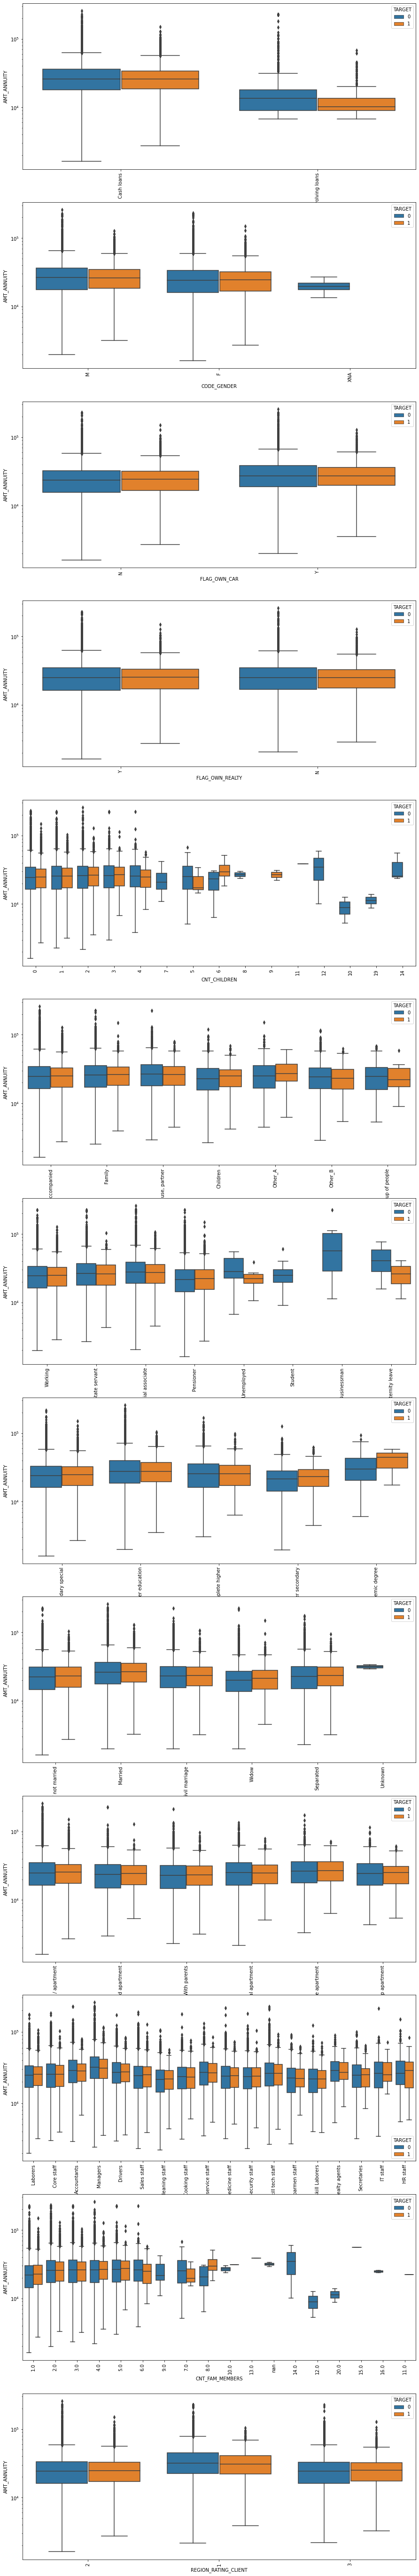

In [73]:
# Generating box plots for all the combination with AMT_ANNUITY.

generate_box_plots_for_combination([x for x in num_cat_com if x[0]=="AMT_ANNUITY"], log_scale=True)

- Both the categories of out target variable shows similar characterstics for the combination of AMT_ANNUITY with other categorical features, hence we can't justify any statemnet regarding the target variable.

('REGION_POPULATION_RELATIVE', 'NAME_CONTRACT_TYPE')
('REGION_POPULATION_RELATIVE', 'CODE_GENDER')
('REGION_POPULATION_RELATIVE', 'FLAG_OWN_CAR')
('REGION_POPULATION_RELATIVE', 'FLAG_OWN_REALTY')
('REGION_POPULATION_RELATIVE', 'CNT_CHILDREN')
('REGION_POPULATION_RELATIVE', 'NAME_TYPE_SUITE')
('REGION_POPULATION_RELATIVE', 'NAME_INCOME_TYPE')
('REGION_POPULATION_RELATIVE', 'NAME_EDUCATION_TYPE')
('REGION_POPULATION_RELATIVE', 'NAME_FAMILY_STATUS')
('REGION_POPULATION_RELATIVE', 'NAME_HOUSING_TYPE')
('REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE')
('REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS')
('REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT')


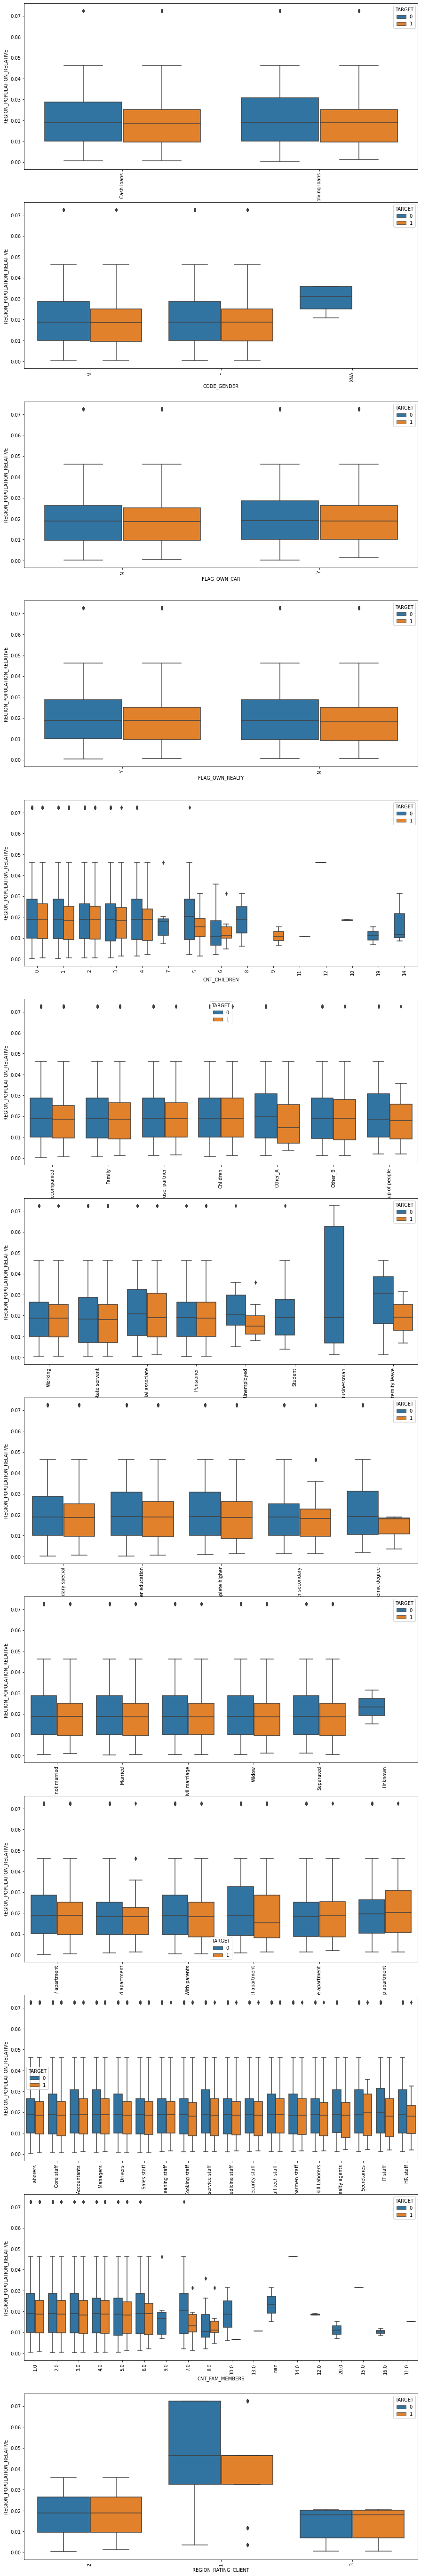

In [74]:
# Generating box plots for all the combination with REGION_POPULATION_RELATIVE.

generate_box_plots_for_combination([x for x in num_cat_com if x[0]=="REGION_POPULATION_RELATIVE"])

- Both the categories of out target variable shows similar characterstics for the combination of REGION_POPULATION_RELATIVE with other categorical features, hence we can't justify any statemnet regarding the target variable.

('AGE', 'NAME_CONTRACT_TYPE')
('AGE', 'CODE_GENDER')
('AGE', 'FLAG_OWN_CAR')
('AGE', 'FLAG_OWN_REALTY')
('AGE', 'CNT_CHILDREN')
('AGE', 'NAME_TYPE_SUITE')
('AGE', 'NAME_INCOME_TYPE')
('AGE', 'NAME_EDUCATION_TYPE')
('AGE', 'NAME_FAMILY_STATUS')
('AGE', 'NAME_HOUSING_TYPE')
('AGE', 'OCCUPATION_TYPE')
('AGE', 'CNT_FAM_MEMBERS')
('AGE', 'REGION_RATING_CLIENT')


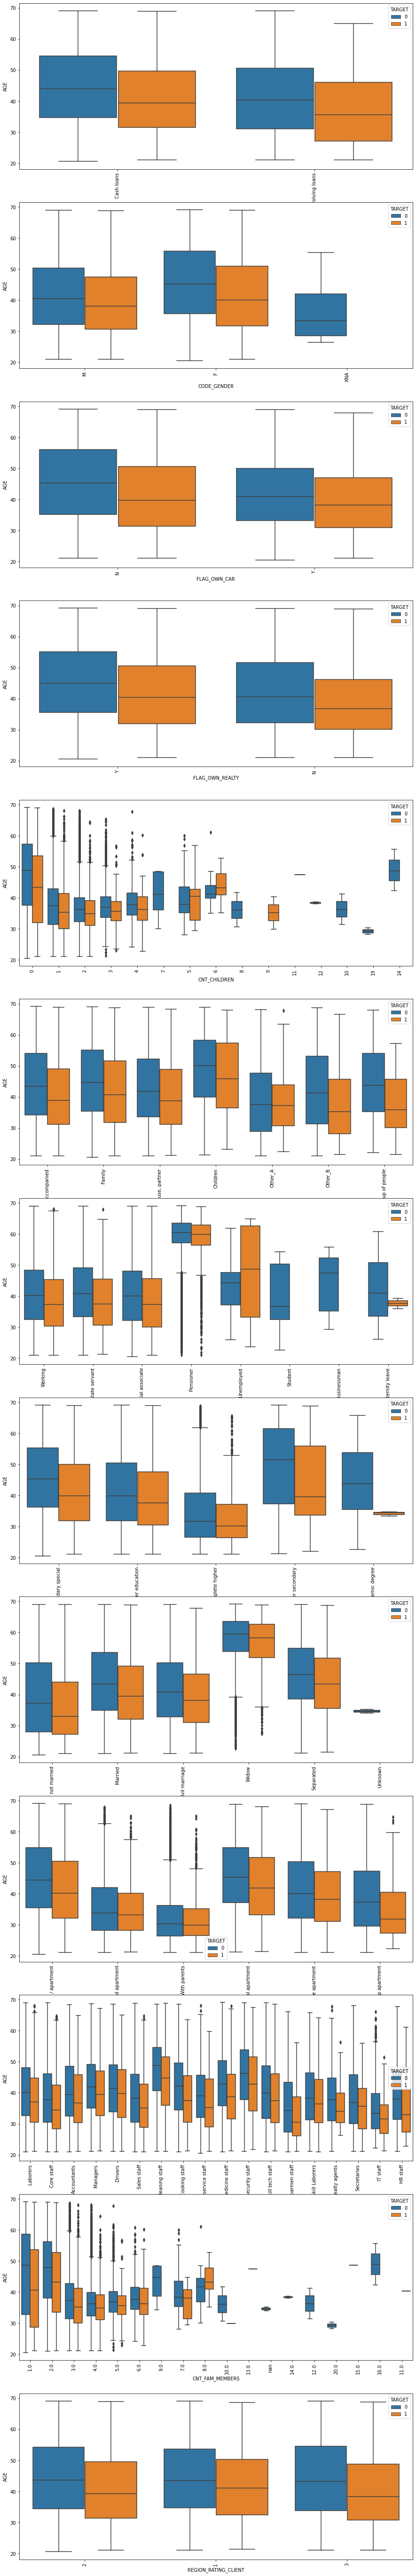

In [75]:
# Generating box plots for all the combination with AGE.

generate_box_plots_for_combination([x for x in num_cat_com if x[0]=="AGE"])

- Both the categories of out target variable shows similar characterstics for the combination of AGE with other categorical features, hence we can't justify any statemnet regarding the target variable.

('TENURE', 'NAME_CONTRACT_TYPE')
('TENURE', 'CODE_GENDER')
('TENURE', 'FLAG_OWN_CAR')
('TENURE', 'FLAG_OWN_REALTY')
('TENURE', 'CNT_CHILDREN')
('TENURE', 'NAME_TYPE_SUITE')
('TENURE', 'NAME_INCOME_TYPE')
('TENURE', 'NAME_EDUCATION_TYPE')
('TENURE', 'NAME_FAMILY_STATUS')
('TENURE', 'NAME_HOUSING_TYPE')
('TENURE', 'OCCUPATION_TYPE')
('TENURE', 'CNT_FAM_MEMBERS')
('TENURE', 'REGION_RATING_CLIENT')


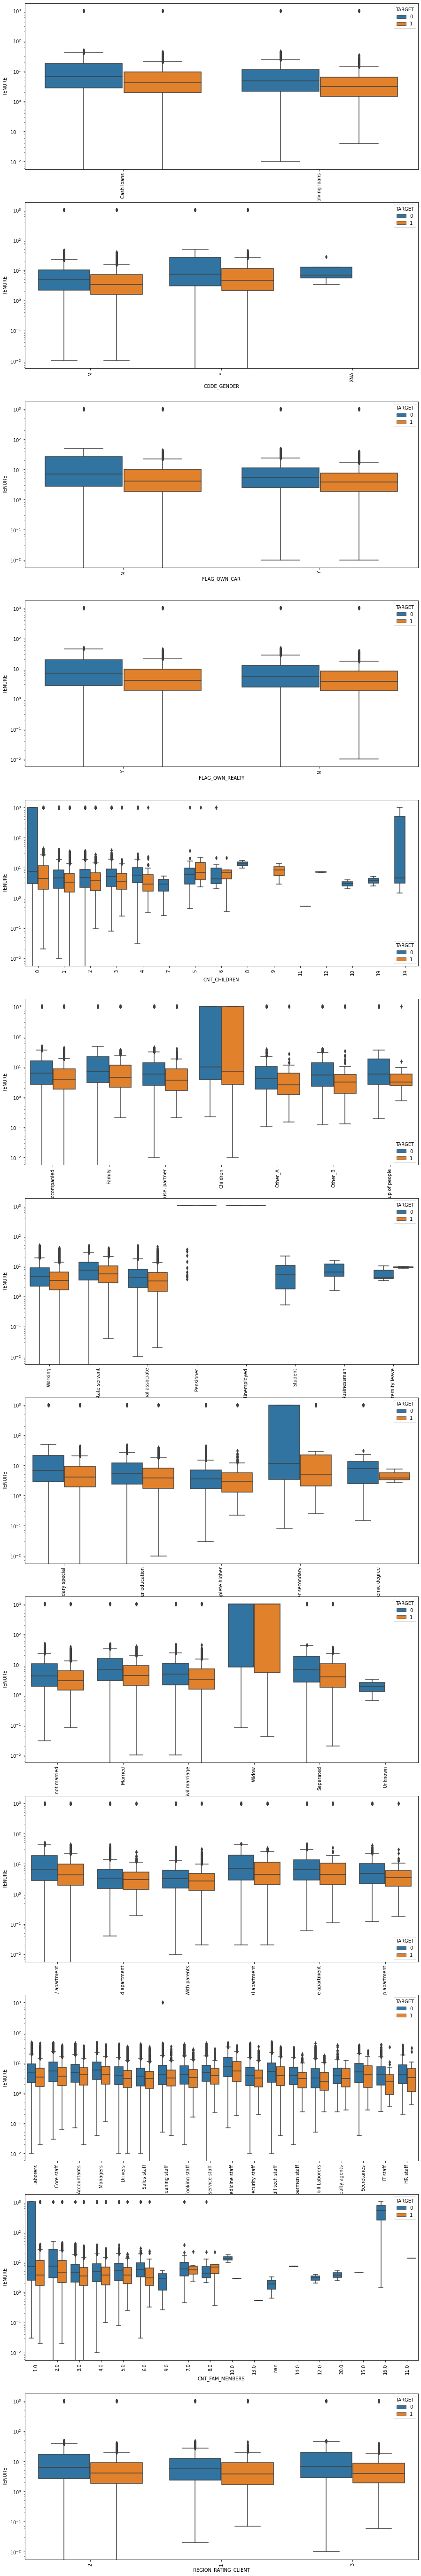

In [76]:
# Generating box plots for all the combination with TENURE.

generate_box_plots_for_combination([x for x in num_cat_com if x[0]=="TENURE"], log_scale=True)

- Both the categories of out target variable shows similar characterstics for the combination of TENURE with other categorical features, hence we can't justify any statemnet regarding the target variable.

('EXT_SOURCE_2', 'NAME_CONTRACT_TYPE')
('EXT_SOURCE_2', 'CODE_GENDER')
('EXT_SOURCE_2', 'FLAG_OWN_CAR')
('EXT_SOURCE_2', 'FLAG_OWN_REALTY')
('EXT_SOURCE_2', 'CNT_CHILDREN')
('EXT_SOURCE_2', 'NAME_TYPE_SUITE')
('EXT_SOURCE_2', 'NAME_INCOME_TYPE')
('EXT_SOURCE_2', 'NAME_EDUCATION_TYPE')
('EXT_SOURCE_2', 'NAME_FAMILY_STATUS')
('EXT_SOURCE_2', 'NAME_HOUSING_TYPE')
('EXT_SOURCE_2', 'OCCUPATION_TYPE')
('EXT_SOURCE_2', 'CNT_FAM_MEMBERS')
('EXT_SOURCE_2', 'REGION_RATING_CLIENT')


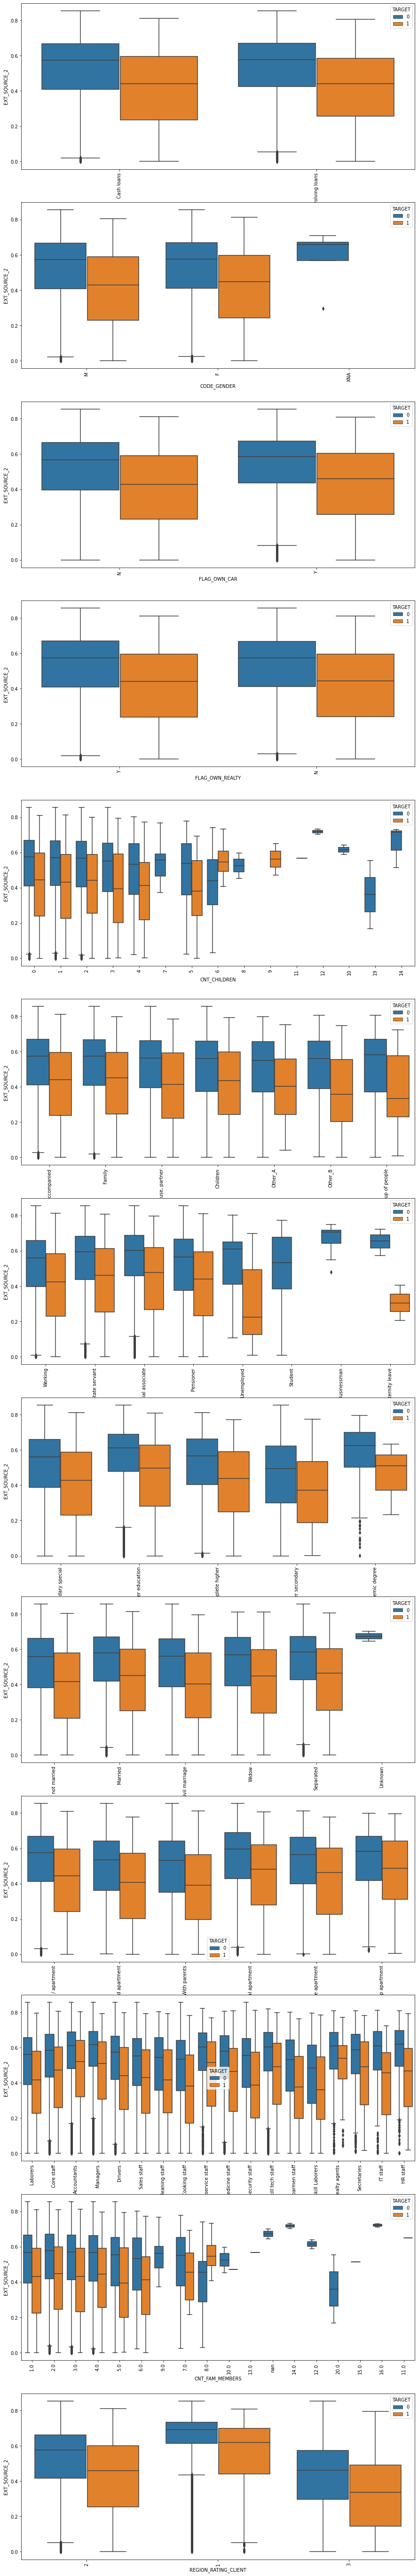

In [77]:
# Generating box plots for all the combination with EXT_SOURCE_2.

generate_box_plots_for_combination([x for x in num_cat_com if x[0]=="EXT_SOURCE_2"])

- Both the categories of out target variable shows similar characterstics for the combination of EXT_SOURCE_2 with other categorical features, hence we can't justify any statemnet regarding the target variable.

#### BIVARIATE ANALYSIS FOR PREVIOUS APPLICATION DATA

##### FOR NUMERICAL-NUMERICAL DATA

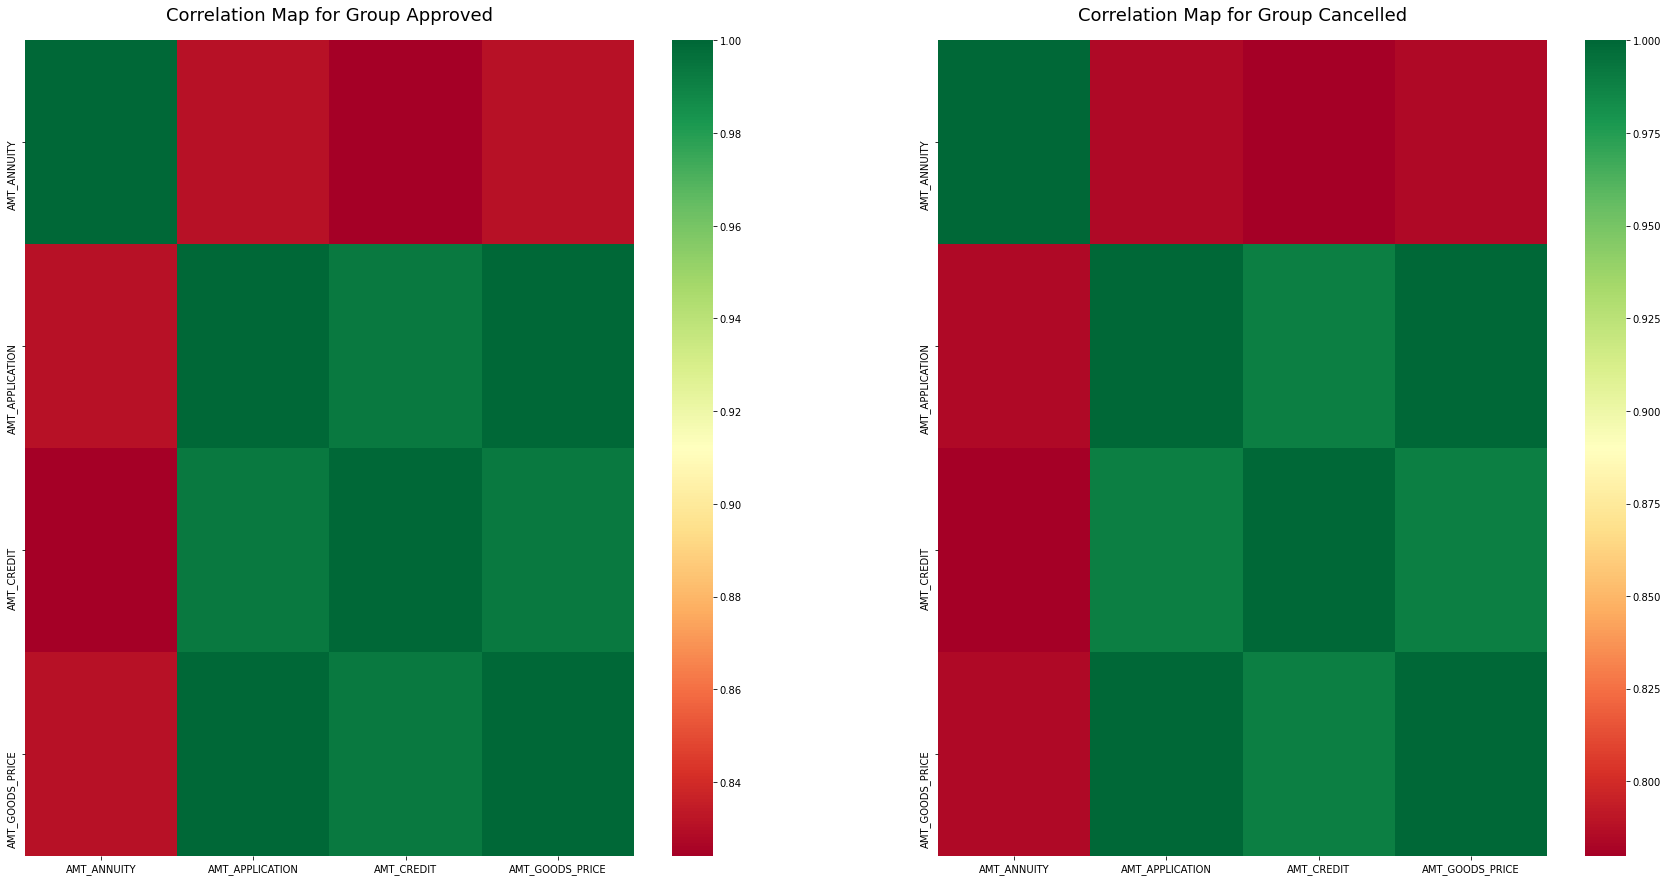

In [78]:
# Correlation Heatmap Comparison

create_heatmap_for_comparison(cl_prev_data_a, cl_prev_data_c, "Approved", "Cancelled")

- For both the groups (Approved & Cancelled), AMT_ANNUITY is highly negatively correlated with AMT_CREDIT and AMT_APLICATION.
- For the the groups AMT_APPLICATION is highly positively correlated with AMT_CREDIT and AMT_GOODS_PRICE.

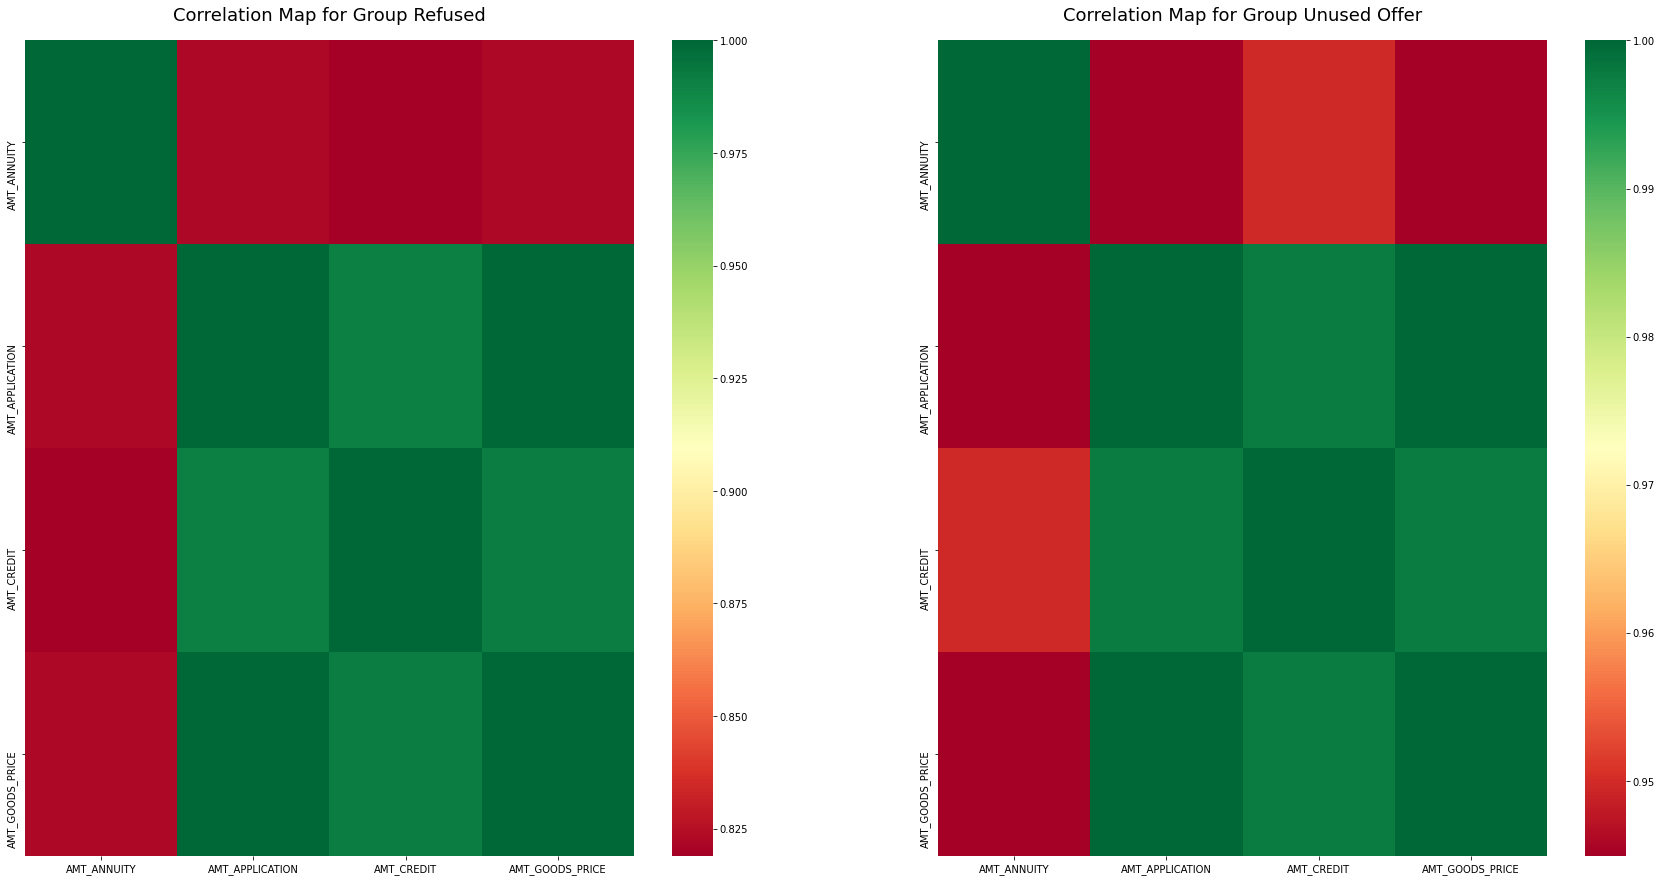

In [79]:
# Correlation Heatmap Comparison

create_heatmap_for_comparison(cl_prev_data_r, cl_prev_data_u, "Refused", "Unused Offer")

- For both the groups (Refused & Unused Offer), AMT_ANNUITY is highly negatively correlated with AMT_CREDIT and AMT_APLICATION.
- For the the groups AMT_APPLICATION is highly positively correlated with AMT_CREDIT and AMT_GOODS_PRICE.

##### FOR NUMERICAL-CATEGORICAL DATA

In [80]:
# In our dataset these are the only continuous variables which needs to be combined with other categorical variables.
num_cols_prev = cl_prev_data.select_dtypes(include="number").columns
non_num_cols_prev = [x for x in cl_prev_data.select_dtypes(include="object").columns if x!="NAME_CONTRACT_STATUS"]
num_cat_com_prev = create_feature_combinations_for_boxplot(num_cols_prev, non_num_cols_prev)

# This is what the combinations look like
num_cat_com_prev

[('AMT_ANNUITY', 'NAME_CONTRACT_TYPE'),
 ('AMT_ANNUITY', 'CODE_REJECT_REASON'),
 ('AMT_ANNUITY', 'NAME_CLIENT_TYPE'),
 ('AMT_ANNUITY', 'CHANNEL_TYPE'),
 ('AMT_ANNUITY', 'CNT_PAYMENT'),
 ('AMT_ANNUITY', 'PRODUCT_COMBINATION'),
 ('AMT_APPLICATION', 'NAME_CONTRACT_TYPE'),
 ('AMT_APPLICATION', 'CODE_REJECT_REASON'),
 ('AMT_APPLICATION', 'NAME_CLIENT_TYPE'),
 ('AMT_APPLICATION', 'CHANNEL_TYPE'),
 ('AMT_APPLICATION', 'CNT_PAYMENT'),
 ('AMT_APPLICATION', 'PRODUCT_COMBINATION'),
 ('AMT_CREDIT', 'NAME_CONTRACT_TYPE'),
 ('AMT_CREDIT', 'CODE_REJECT_REASON'),
 ('AMT_CREDIT', 'NAME_CLIENT_TYPE'),
 ('AMT_CREDIT', 'CHANNEL_TYPE'),
 ('AMT_CREDIT', 'CNT_PAYMENT'),
 ('AMT_CREDIT', 'PRODUCT_COMBINATION'),
 ('AMT_GOODS_PRICE', 'NAME_CONTRACT_TYPE'),
 ('AMT_GOODS_PRICE', 'CODE_REJECT_REASON'),
 ('AMT_GOODS_PRICE', 'NAME_CLIENT_TYPE'),
 ('AMT_GOODS_PRICE', 'CHANNEL_TYPE'),
 ('AMT_GOODS_PRICE', 'CNT_PAYMENT'),
 ('AMT_GOODS_PRICE', 'PRODUCT_COMBINATION')]

('AMT_ANNUITY', 'NAME_CONTRACT_TYPE')
('AMT_ANNUITY', 'CODE_REJECT_REASON')
('AMT_ANNUITY', 'NAME_CLIENT_TYPE')
('AMT_ANNUITY', 'CHANNEL_TYPE')
('AMT_ANNUITY', 'CNT_PAYMENT')
('AMT_ANNUITY', 'PRODUCT_COMBINATION')


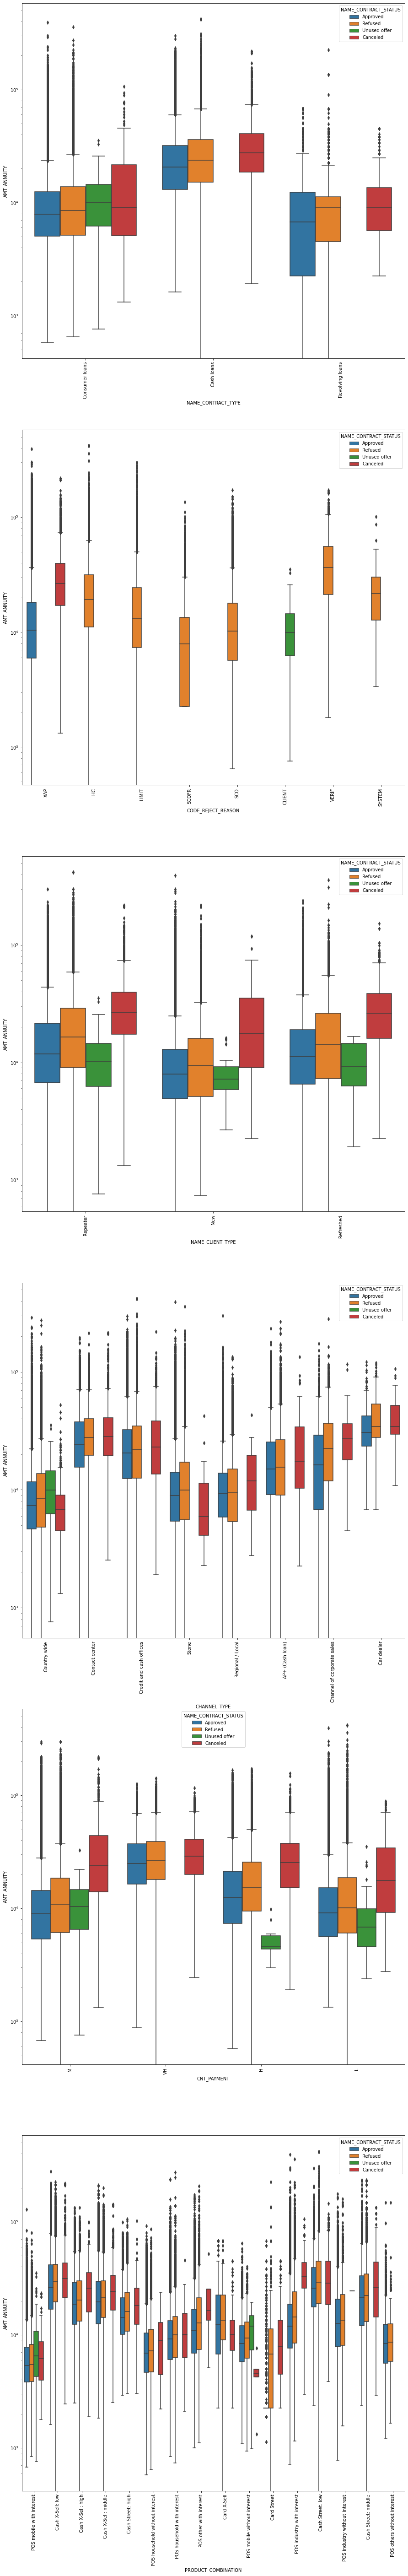

In [81]:
# Generating box plots for all the combination with AMT_ANNUITY.

generate_box_plots_for_combination([x for x in num_cat_com_prev if x[0]=="AMT_ANNUITY"], 
                                   log_scale=True, data=cl_prev_data, hue="NAME_CONTRACT_STATUS")

- There are outliers which can be treated using binning.
- Since code reject reason is a rejection metric, hence it shows most of the data for rejected application although there are some entries with approvals as well.
- Other than that all the 4 groups shows similar characterstics.

('AMT_APPLICATION', 'NAME_CONTRACT_TYPE')
('AMT_APPLICATION', 'CODE_REJECT_REASON')
('AMT_APPLICATION', 'NAME_CLIENT_TYPE')
('AMT_APPLICATION', 'CHANNEL_TYPE')
('AMT_APPLICATION', 'CNT_PAYMENT')
('AMT_APPLICATION', 'PRODUCT_COMBINATION')


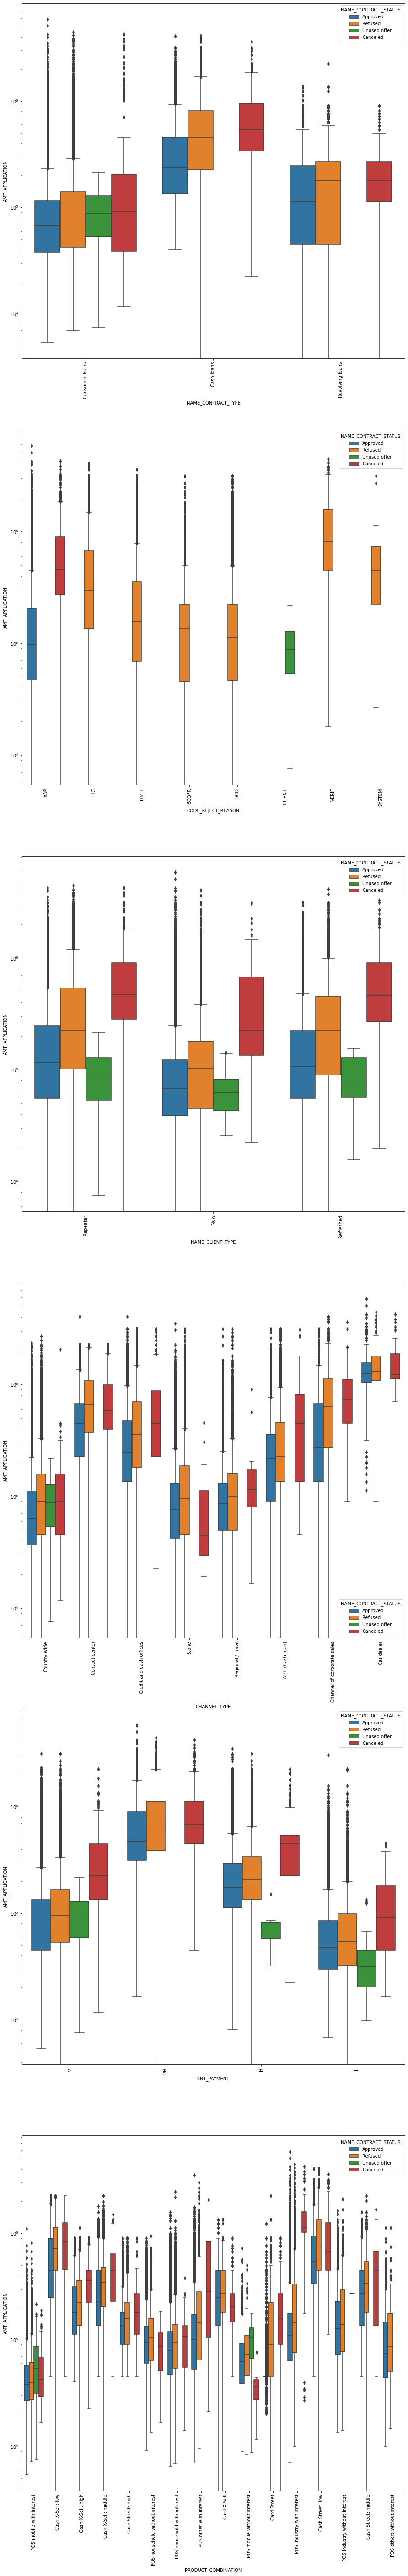

In [82]:
# Generating box plots for all the combination with AMT_APPLICATION.

generate_box_plots_for_combination([x for x in num_cat_com_prev if x[0]=="AMT_APPLICATION"], 
                                   log_scale=True, data=cl_prev_data, hue="NAME_CONTRACT_STATUS")

- There are outliers which can be treated using binning.
- Since code reject reason is a rejection metric, hence it shows most of the data for rejected application although there are some entries with approvals as well.
- Other than that all the 4 groups shows similar characterstics.

('AMT_CREDIT', 'NAME_CONTRACT_TYPE')
('AMT_CREDIT', 'CODE_REJECT_REASON')
('AMT_CREDIT', 'NAME_CLIENT_TYPE')
('AMT_CREDIT', 'CHANNEL_TYPE')
('AMT_CREDIT', 'CNT_PAYMENT')
('AMT_CREDIT', 'PRODUCT_COMBINATION')


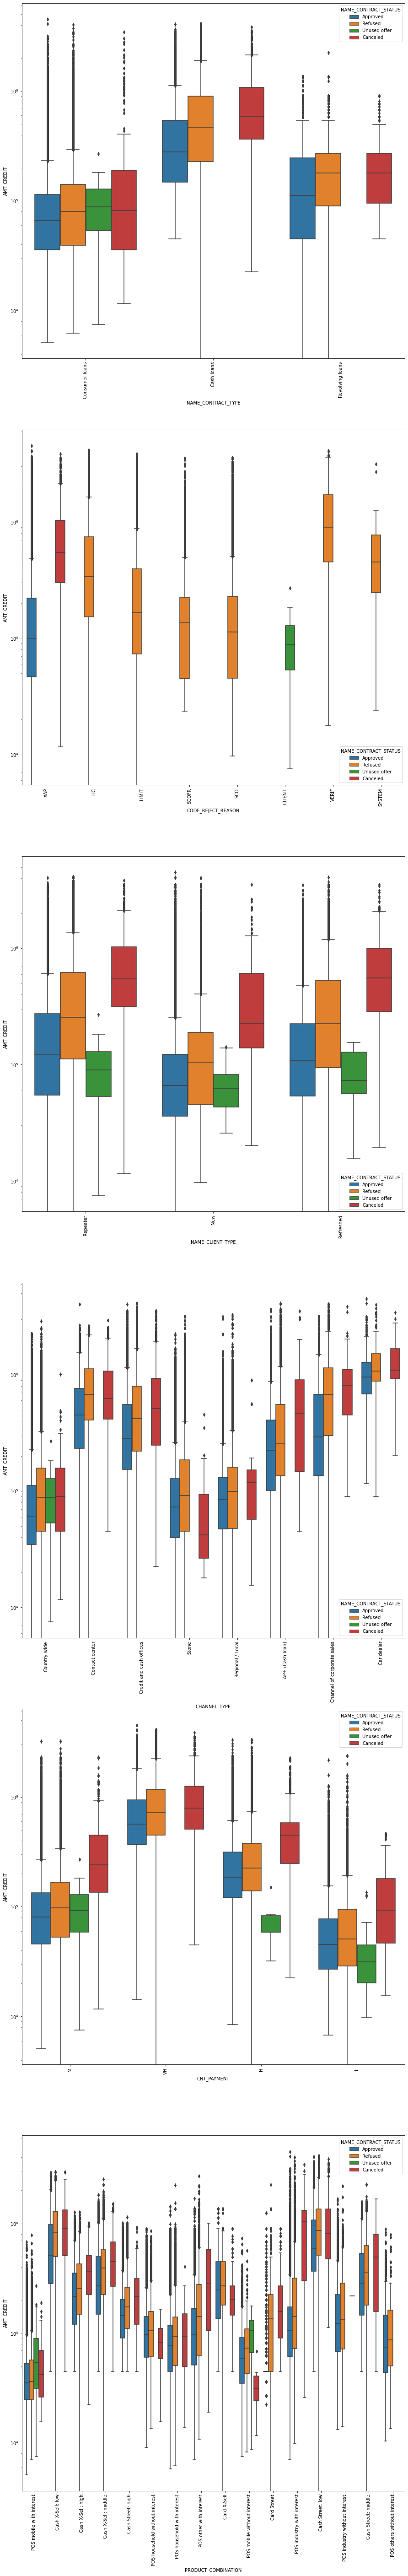

In [83]:
# Generating box plots for all the combination with AMT_CREDIT.

generate_box_plots_for_combination([x for x in num_cat_com_prev if x[0]=="AMT_CREDIT"], 
                                   log_scale=True, data=cl_prev_data, hue="NAME_CONTRACT_STATUS")

- There are outliers which can be treated using binning.
- Since code reject reason is a rejection metric, hence it shows most of the data for rejected application although there are some entries with approvals as well.
- Other than that all the 4 groups shows similar characterstics.

('AMT_GOODS_PRICE', 'NAME_CONTRACT_TYPE')
('AMT_GOODS_PRICE', 'CODE_REJECT_REASON')
('AMT_GOODS_PRICE', 'NAME_CLIENT_TYPE')
('AMT_GOODS_PRICE', 'CHANNEL_TYPE')
('AMT_GOODS_PRICE', 'CNT_PAYMENT')
('AMT_GOODS_PRICE', 'PRODUCT_COMBINATION')


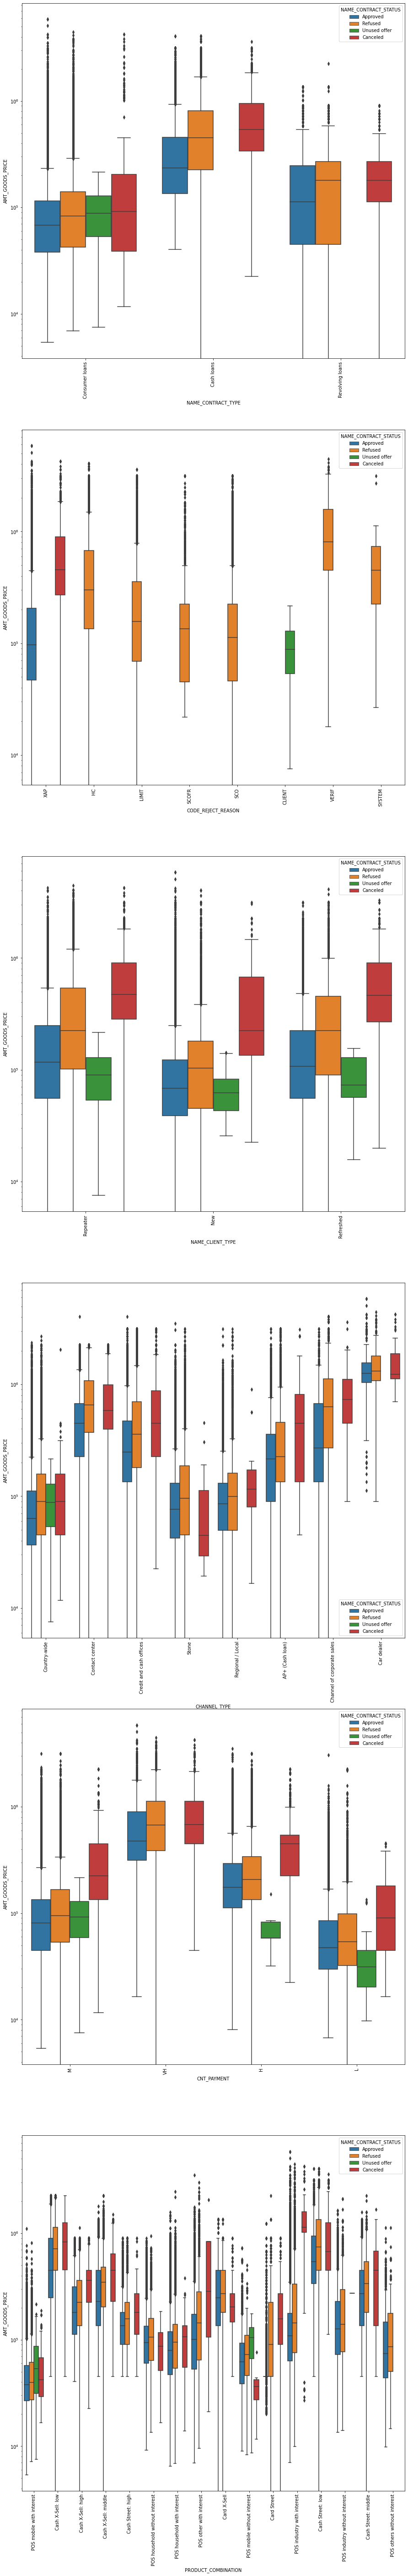

In [84]:
# Generating box plots for all the combination with AMT_GOODS_PRICE.

generate_box_plots_for_combination([x for x in num_cat_com_prev if x[0]=="AMT_GOODS_PRICE"], 
                                   log_scale=True, data=cl_prev_data, hue="NAME_CONTRACT_STATUS")

- There are outliers which can be treated using binning.
- Since code reject reason is a rejection metric, hence it shows most of the data for rejected application although there are some entries with approvals as well.
- Other than that all the 4 groups shows similar characterstics.

## CONCLUSION

* Banks should be very careful when dealing with clients who are young below the age of 35 or so, just started working around 1-2 years of total working tenure, unmarried or couples with no child, as there might be a chance that they will default in near future.
* Banks should not ignore those clients who are well settled, doing a high profile job with good pay salary or businessmen as they might be the prime customers. Also clients who are studying can also be a good customer as the loan might be taken up for the education purpose and in future education will return.
* Banks should also approve loans for those clients who are taking up loan for household or electronic essential as they are cheaper and the loan amount might be payable by customer.